# **Machine Learning-Based Analysis of Crypto currency Market Financial Risk Management**

# **Importing necessary libraries and loading the data**

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing the required libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [199]:
df=pd.read_csv(r'coinmarketcap_06122017.csv')
df.head()

Unnamed: 0  24h_volume_usd  available_supply            id  last_updated  \
0           0    9.007640e+09      1.672352e+07       bitcoin    1512549554   
1           1    1.551330e+09      9.616537e+07      ethereum    1512549553   
2           2    1.111350e+09      1.684044e+07  bitcoin-cash    1512549578   
3           3    2.936090e+09      2.779530e+09          iota    1512549571   
4           4    2.315050e+08      3.873915e+10        ripple    1512549541   

   market_cap_usd    max_supply          name  percent_change_1h  \
0    2.130493e+11  2.100000e+07       Bitcoin               0.12   
1    4.352945e+10           NaN      Ethereum              -0.18   
2    2.529585e+10  2.100000e+07  Bitcoin Cash               1.65   
3    1.475225e+10  2.779530e+09          IOTA              -2.38   
4    9.365343e+09  1.000000e+11        Ripple               0.56   

   percent_change_24h  percent_change_7d  price_btc     price_usd  rank  \
0                7.33              17.45   1.000000  12739.500000     1   
1               -3.93              -7.33   0.036177    452.652000     2   
2               -5.51              -4.75   0.120050   1502.090000     3   
3               83.35             255.82   0.000424      5.307460     4   
4               -3.70             -14.79   0.000019      0.241754     5   

  symbol  total_supply  
0    BTC  1.672352e+07  
1    ETH  9.616537e+07  
2    BCH  1.684044e+07  
3  MIOTA  2.779530e+09  
4    XRP  9.999309e+10

c

In [200]:
#Let's print the first 5 records of the data set
df.head()

Unnamed: 0  24h_volume_usd  available_supply            id  last_updated  \
0           0    9.007640e+09      1.672352e+07       bitcoin    1512549554   
1           1    1.551330e+09      9.616537e+07      ethereum    1512549553   
2           2    1.111350e+09      1.684044e+07  bitcoin-cash    1512549578   
3           3    2.936090e+09      2.779530e+09          iota    1512549571   
4           4    2.315050e+08      3.873915e+10        ripple    1512549541   

   market_cap_usd    max_supply          name  percent_change_1h  \
0    2.130493e+11  2.100000e+07       Bitcoin               0.12   
1    4.352945e+10           NaN      Ethereum              -0.18   
2    2.529585e+10  2.100000e+07  Bitcoin Cash               1.65   
3    1.475225e+10  2.779530e+09          IOTA              -2.38   
4    9.365343e+09  1.000000e+11        Ripple               0.56   

   percent_change_24h  percent_change_7d  price_btc     price_usd  rank  \
0                7.33              17.45   1.000000  12739.500000     1   
1               -3.93              -7.33   0.036177    452.652000     2   
2               -5.51              -4.75   0.120050   1502.090000     3   
3               83.35             255.82   0.000424      5.307460     4   
4               -3.70             -14.79   0.000019      0.241754     5   

  symbol  total_supply  
0    BTC  1.672352e+07  
1    ETH  9.616537e+07  
2    BCH  1.684044e+07  
3  MIOTA  2.779530e+09  
4    XRP  9.999309e+10

In [201]:
#Let's print the last 5 records of the dataset
df.tail()

Unnamed: 0  24h_volume_usd  available_supply                 id  \
1321        1321             NaN               NaN          turbocoin   
1322        1322             NaN               NaN              birds   
1323        1323             NaN               NaN  bitcoincashscrypt   
1324        1324             NaN               NaN          swisscoin   
1325        1325             NaN               NaN          faceblock   

      last_updated  market_cap_usd  max_supply               name  \
1321    1512368664             NaN         NaN          TurboCoin   
1322    1512535772             NaN         NaN              Birds   
1323    1512548078             NaN         NaN  BitcoinCashScrypt   
1324    1512540278             NaN         NaN          Swisscoin   
1325    1512435283             NaN         NaN          Faceblock   

      percent_change_1h  percent_change_24h  percent_change_7d     price_btc  \
1321                NaN                 NaN               8.12  1.000000e-08   
1322                NaN               10.62             -42.10  1.000000e-08   
1323              -0.37              -37.39             -27.69  5.000000e-07   
1324                NaN                4.39             -22.84  1.000000e-08   
1325                NaN                 NaN              -6.83  1.400000e-07   

      price_usd  rank symbol  total_supply  
1321   0.000114  1322  TURBO           NaN  
1322   0.000122  1323  BIRDS           NaN  
1323   0.006202  1324   BCCS  2.502380e+06  
1324   0.000123  1325    SIC  1.020000e+10  
1325   0.001654  1326    FBL  1.000000e+07

In [202]:
#Let's print the column name
df.columns

Index(['Unnamed: 0', '24h_volume_usd', 'available_supply', 'id',
       'last_updated', 'market_cap_usd', 'max_supply', 'name',
       'percent_change_1h', 'percent_change_24h', 'percent_change_7d',
       'price_btc', 'price_usd', 'rank', 'symbol', 'total_supply'],
      dtype='object')

In [203]:
# shape of the dataset
df.shape

(1326, 16)

In [204]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1321    False
1322    False
1323    False
1324    False
1325    False
Length: 1326, dtype: bool

In [205]:
#Let's print the total number of duplicated value
df.duplicated().sum()

0

In [206]:
#Let's print the unique values in our dataset
df.nunique()

Unnamed: 0            1326
24h_volume_usd        1262
available_supply      1002
id                    1326
last_updated           105
market_cap_usd        1031
max_supply             125
name                  1324
percent_change_1h      588
percent_change_24h    1114
percent_change_7d     1190
price_btc              895
price_usd             1220
rank                  1326
symbol                1301
total_supply          1024
dtype: int64

In [207]:
#Let's print the data types in our data
df.dtypes

Unnamed: 0              int64
24h_volume_usd        float64
available_supply      float64
id                     object
last_updated            int64
market_cap_usd        float64
max_supply            float64
name                   object
percent_change_1h     float64
percent_change_24h    float64
percent_change_7d     float64
price_btc             float64
price_usd             float64
rank                    int64
symbol                 object
total_supply          float64
dtype: object

In [208]:
#descriptive statistics summary
df.describe

<bound method NDFrame.describe of       Unnamed: 0  24h_volume_usd  available_supply                 id  \
0              0    9.007640e+09      1.672352e+07            bitcoin   
1              1    1.551330e+09      9.616537e+07           ethereum   
2              2    1.111350e+09      1.684044e+07       bitcoin-cash   
3              3    2.936090e+09      2.779530e+09               iota   
4              4    2.315050e+08      3.873915e+10             ripple   
...          ...             ...               ...                ...   
1321        1321             NaN               NaN          turbocoin   
1322        1322             NaN               NaN              birds   
1323        1323             NaN               NaN  bitcoincashscrypt   
1324        1324             NaN               NaN          swisscoin   
1325        1325             NaN               NaN          faceblock   

      last_updated  market_cap_usd    max_supply               name  \
0       1512549554

In [209]:
#Let's get the overall information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1326 non-null   int64  
 1   24h_volume_usd      1270 non-null   float64
 2   available_supply    1031 non-null   float64
 3   id                  1326 non-null   object 
 4   last_updated        1326 non-null   int64  
 5   market_cap_usd      1031 non-null   float64
 6   max_supply          215 non-null    float64
 7   name                1326 non-null   object 
 8   percent_change_1h   1273 non-null   float64
 9   percent_change_24h  1270 non-null   float64
 10  percent_change_7d   1283 non-null   float64
 11  price_btc           1326 non-null   float64
 12  price_usd           1326 non-null   float64
 13  rank                1326 non-null   int64  
 14  symbol              1326 non-null   object 
 15  total_supply        1211 non-null   float64
dtypes: flo

In [210]:
#Let's check the total number of null values present in our dataset
df.isnull().sum()

Unnamed: 0               0
24h_volume_usd          56
available_supply       295
id                       0
last_updated             0
market_cap_usd         295
max_supply            1111
name                     0
percent_change_1h       53
percent_change_24h      56
percent_change_7d       43
price_btc                0
price_usd                0
rank                     0
symbol                   0
total_supply           115
dtype: int64

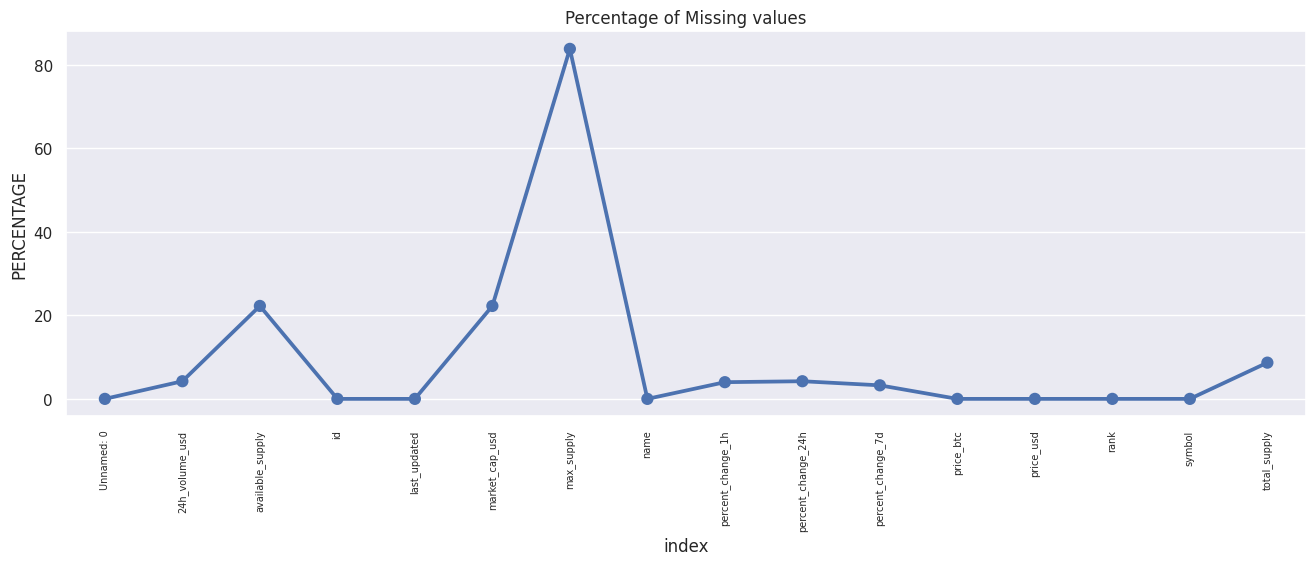

In [211]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

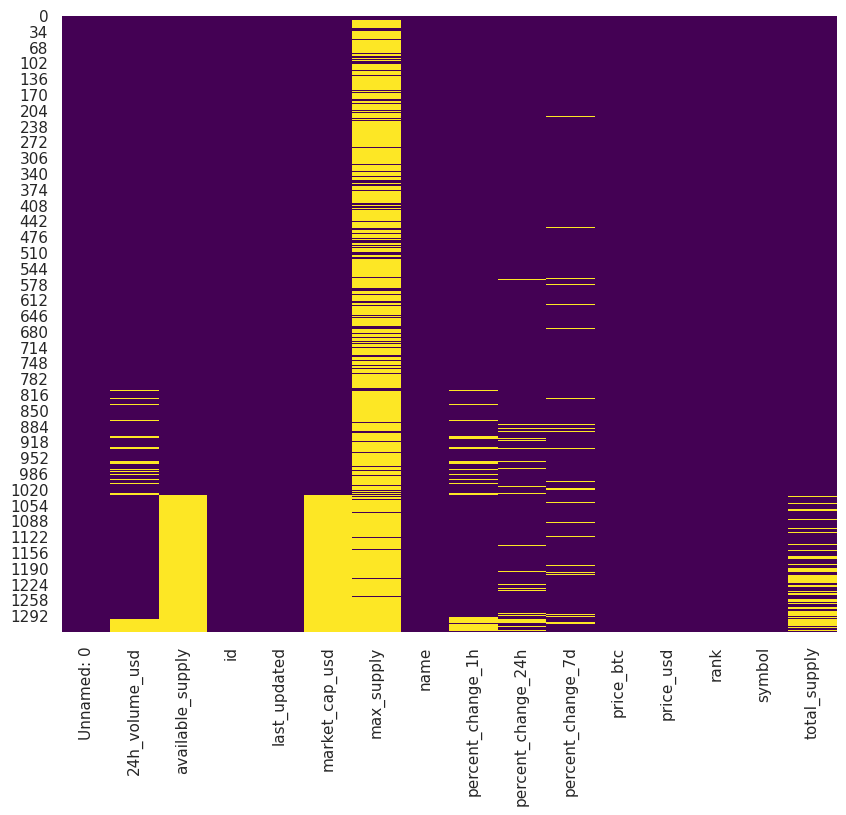

In [212]:
# Create heatmap with missing values in DataFrame highlighted
sns.heatmap(df.isnull(), cbar=False,cmap='viridis')
sns.set(rc={'figure.figsize':(10,5)})

CORRELATION:
A correlation heatmap is a graphical representation that showcases the correlation between variables in a dataset. It uses colors to indicate the strength and direction of the relationships between pairs of variables. The heatmap is constructed by calculating the correlation coefficient between each variable pair and assigning a color gradient to represent the magnitude of correlation. Darker shades indicate stronger positive correlations, while lighter shades represent weaker or negative correlations. This visualization technique allows for a quick and intuitive understanding of the interdependencies and patterns within the dataset, aiding in identifying important relationships and potential insights.

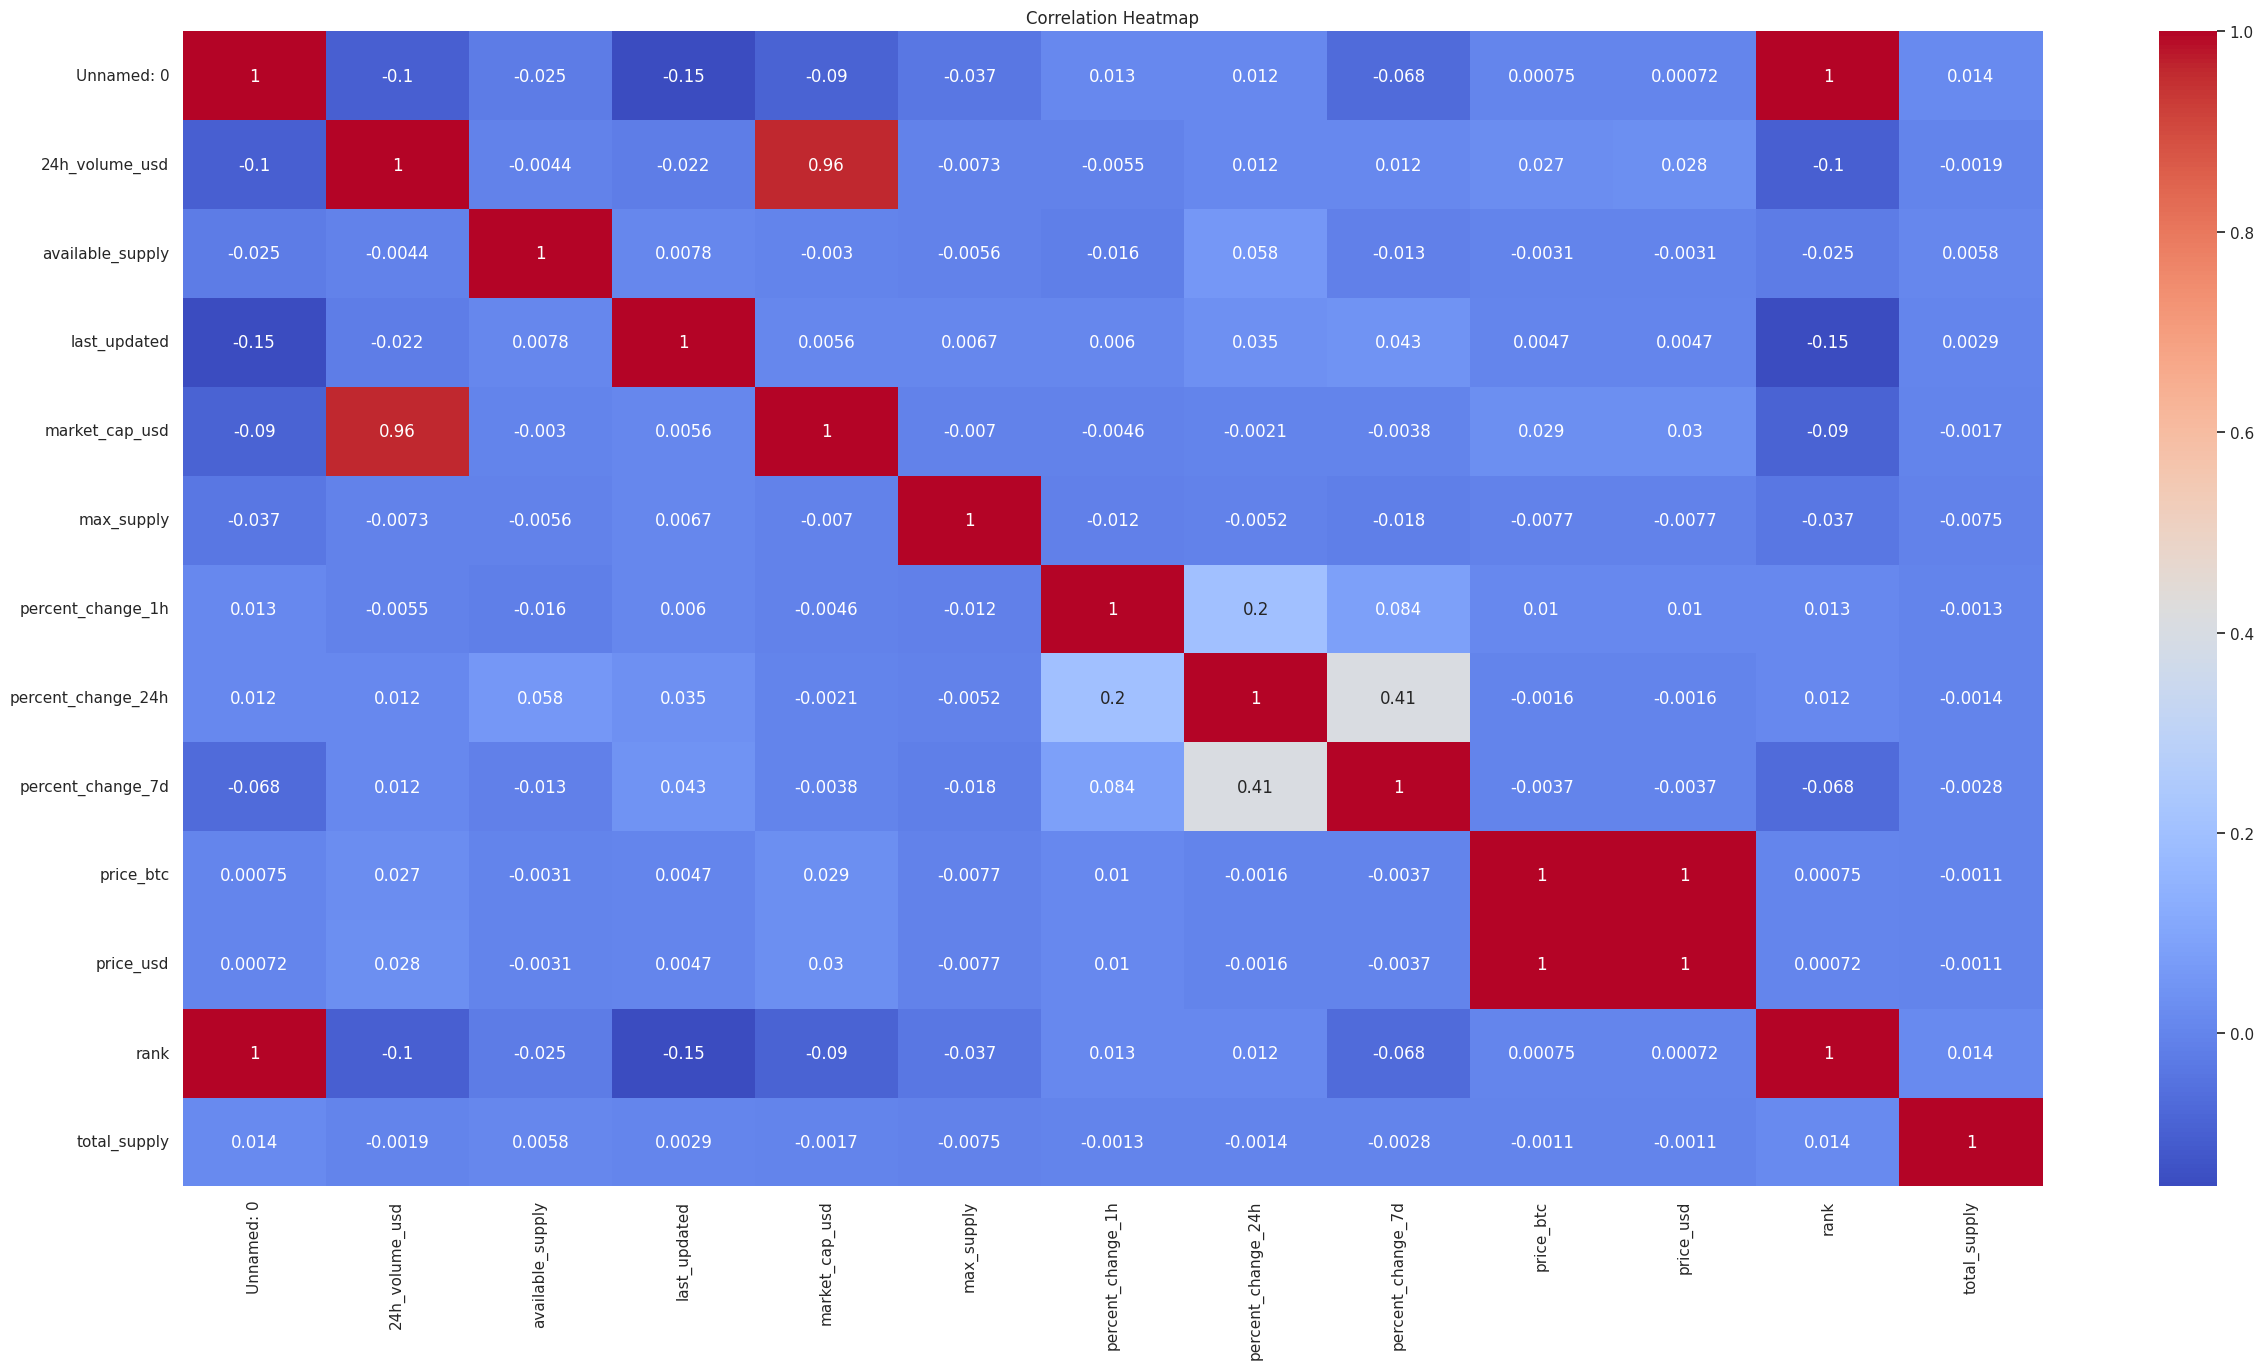

In [213]:
# Assuming 'df' is your DataFrame
# Remove non-numeric columns if present
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Set the style and figure size
sns.set(rc={'figure.figsize':(30, 15)})

# Create the heatmap with annotations and color map
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()
# By using select_dtypes, this code snippet filters out only the numeric columns from your DataFrame, allowing you to calculate the correlation matrix without encountering the 'string to float' conversion error.

In [214]:
df.rename(columns={'24h_volume_usd': 'volume'}, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [215]:
df.value_counts('name')

name
HempCoin     2
Enigma       2
0x           1
Piggycoin    1
PizzaCoin    1
            ..
Ethereum     1
EtherDoge    1
Ethbits      1
EthLend      1
vTorrent     1
Length: 1324, dtype: int64

# **BOXPLOT**

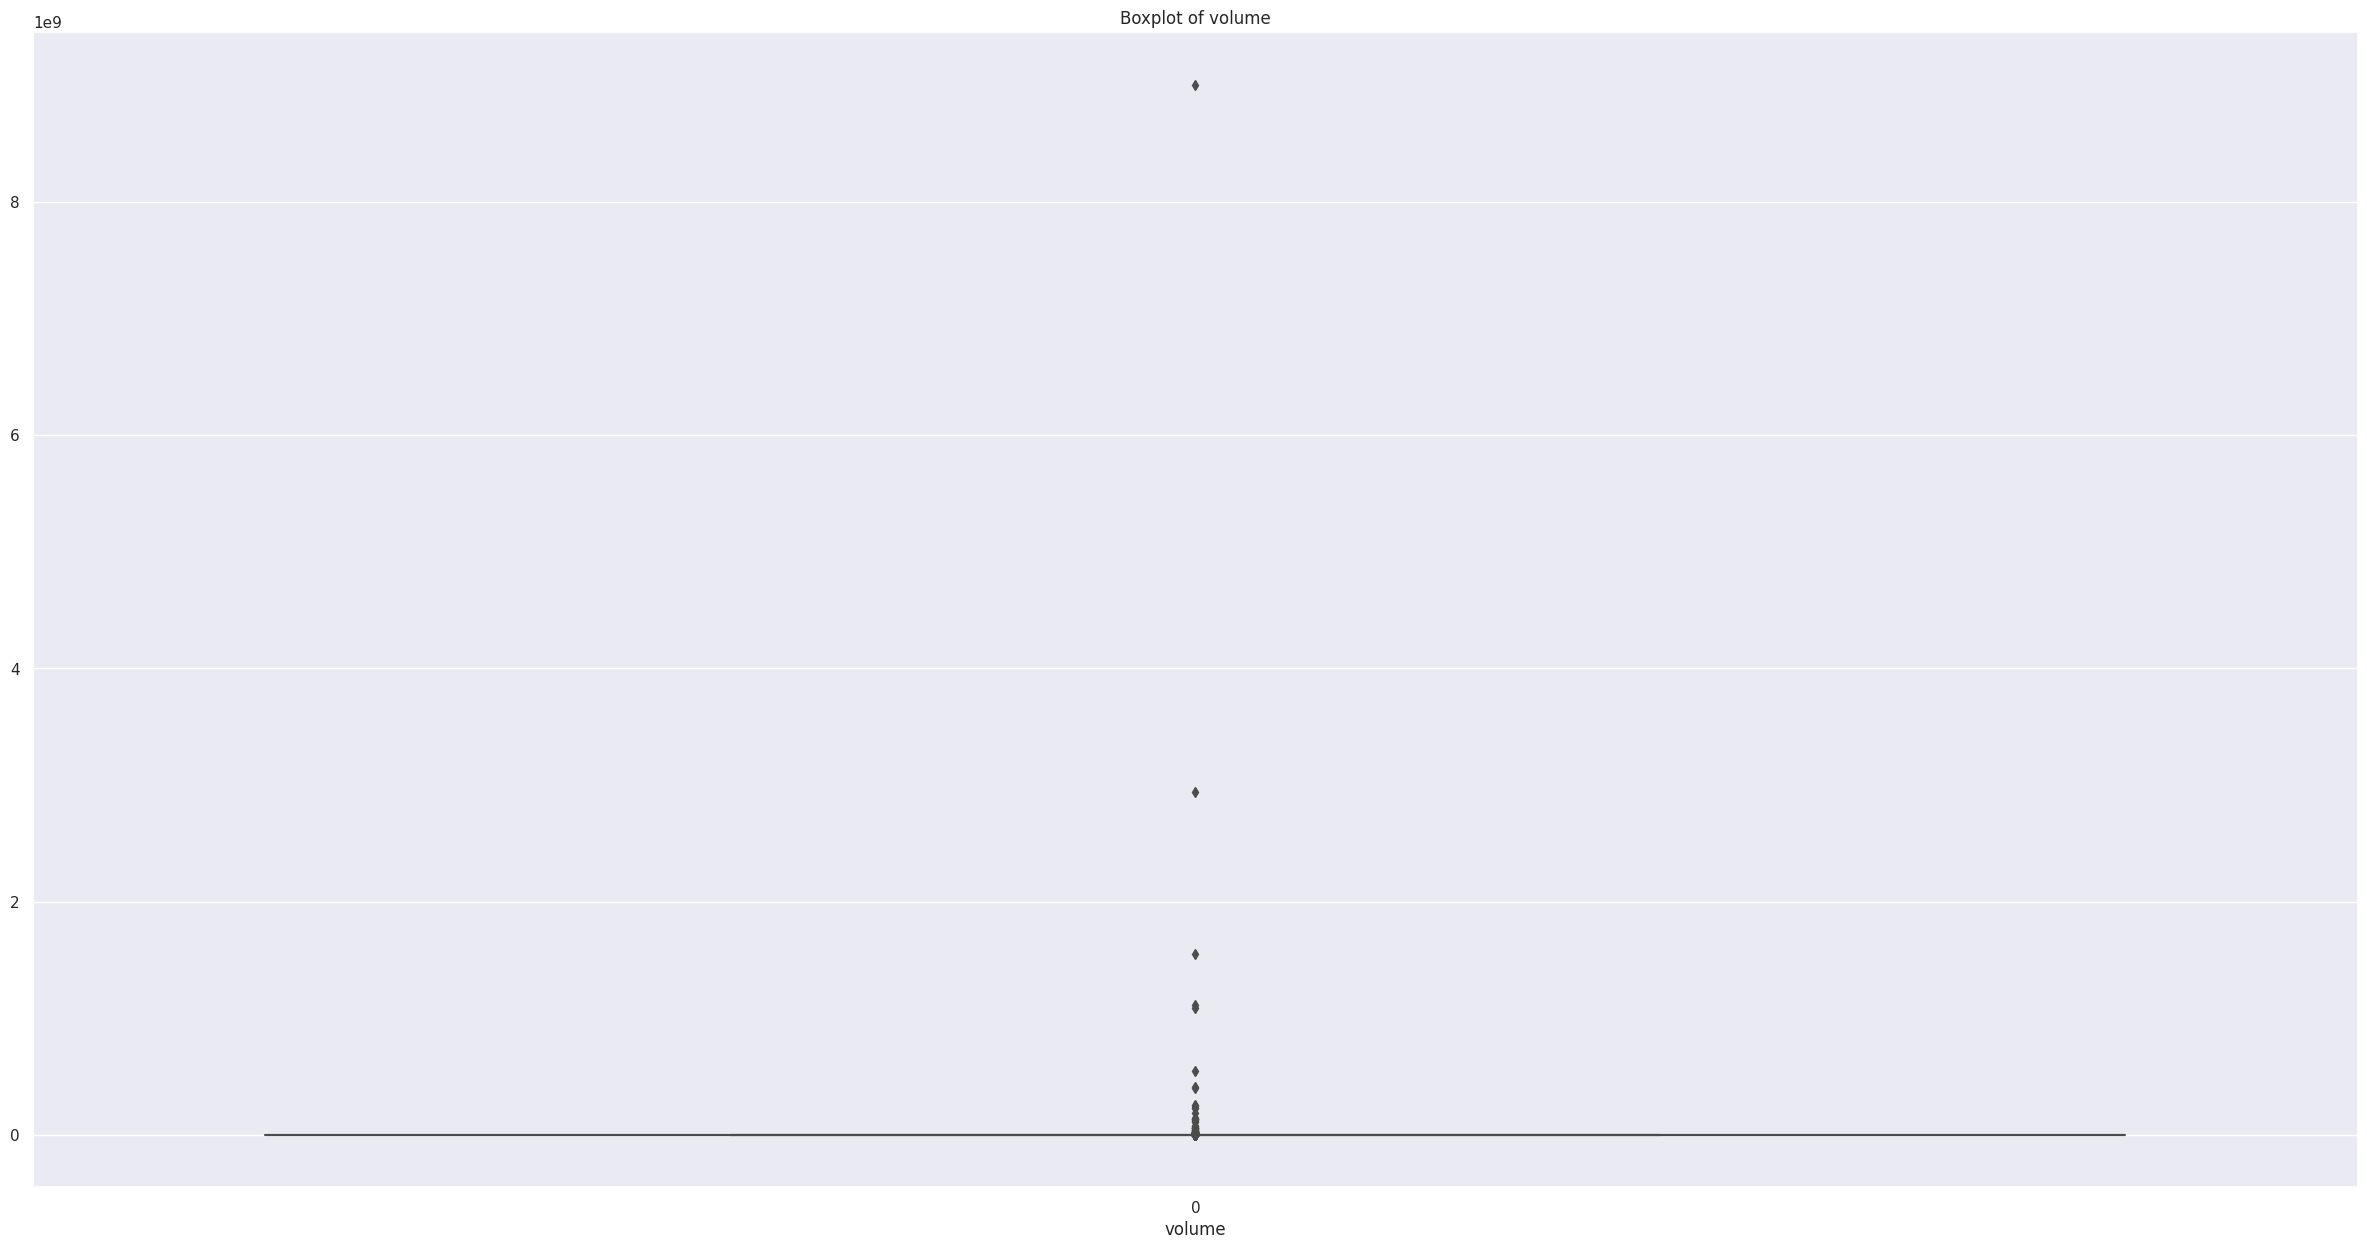

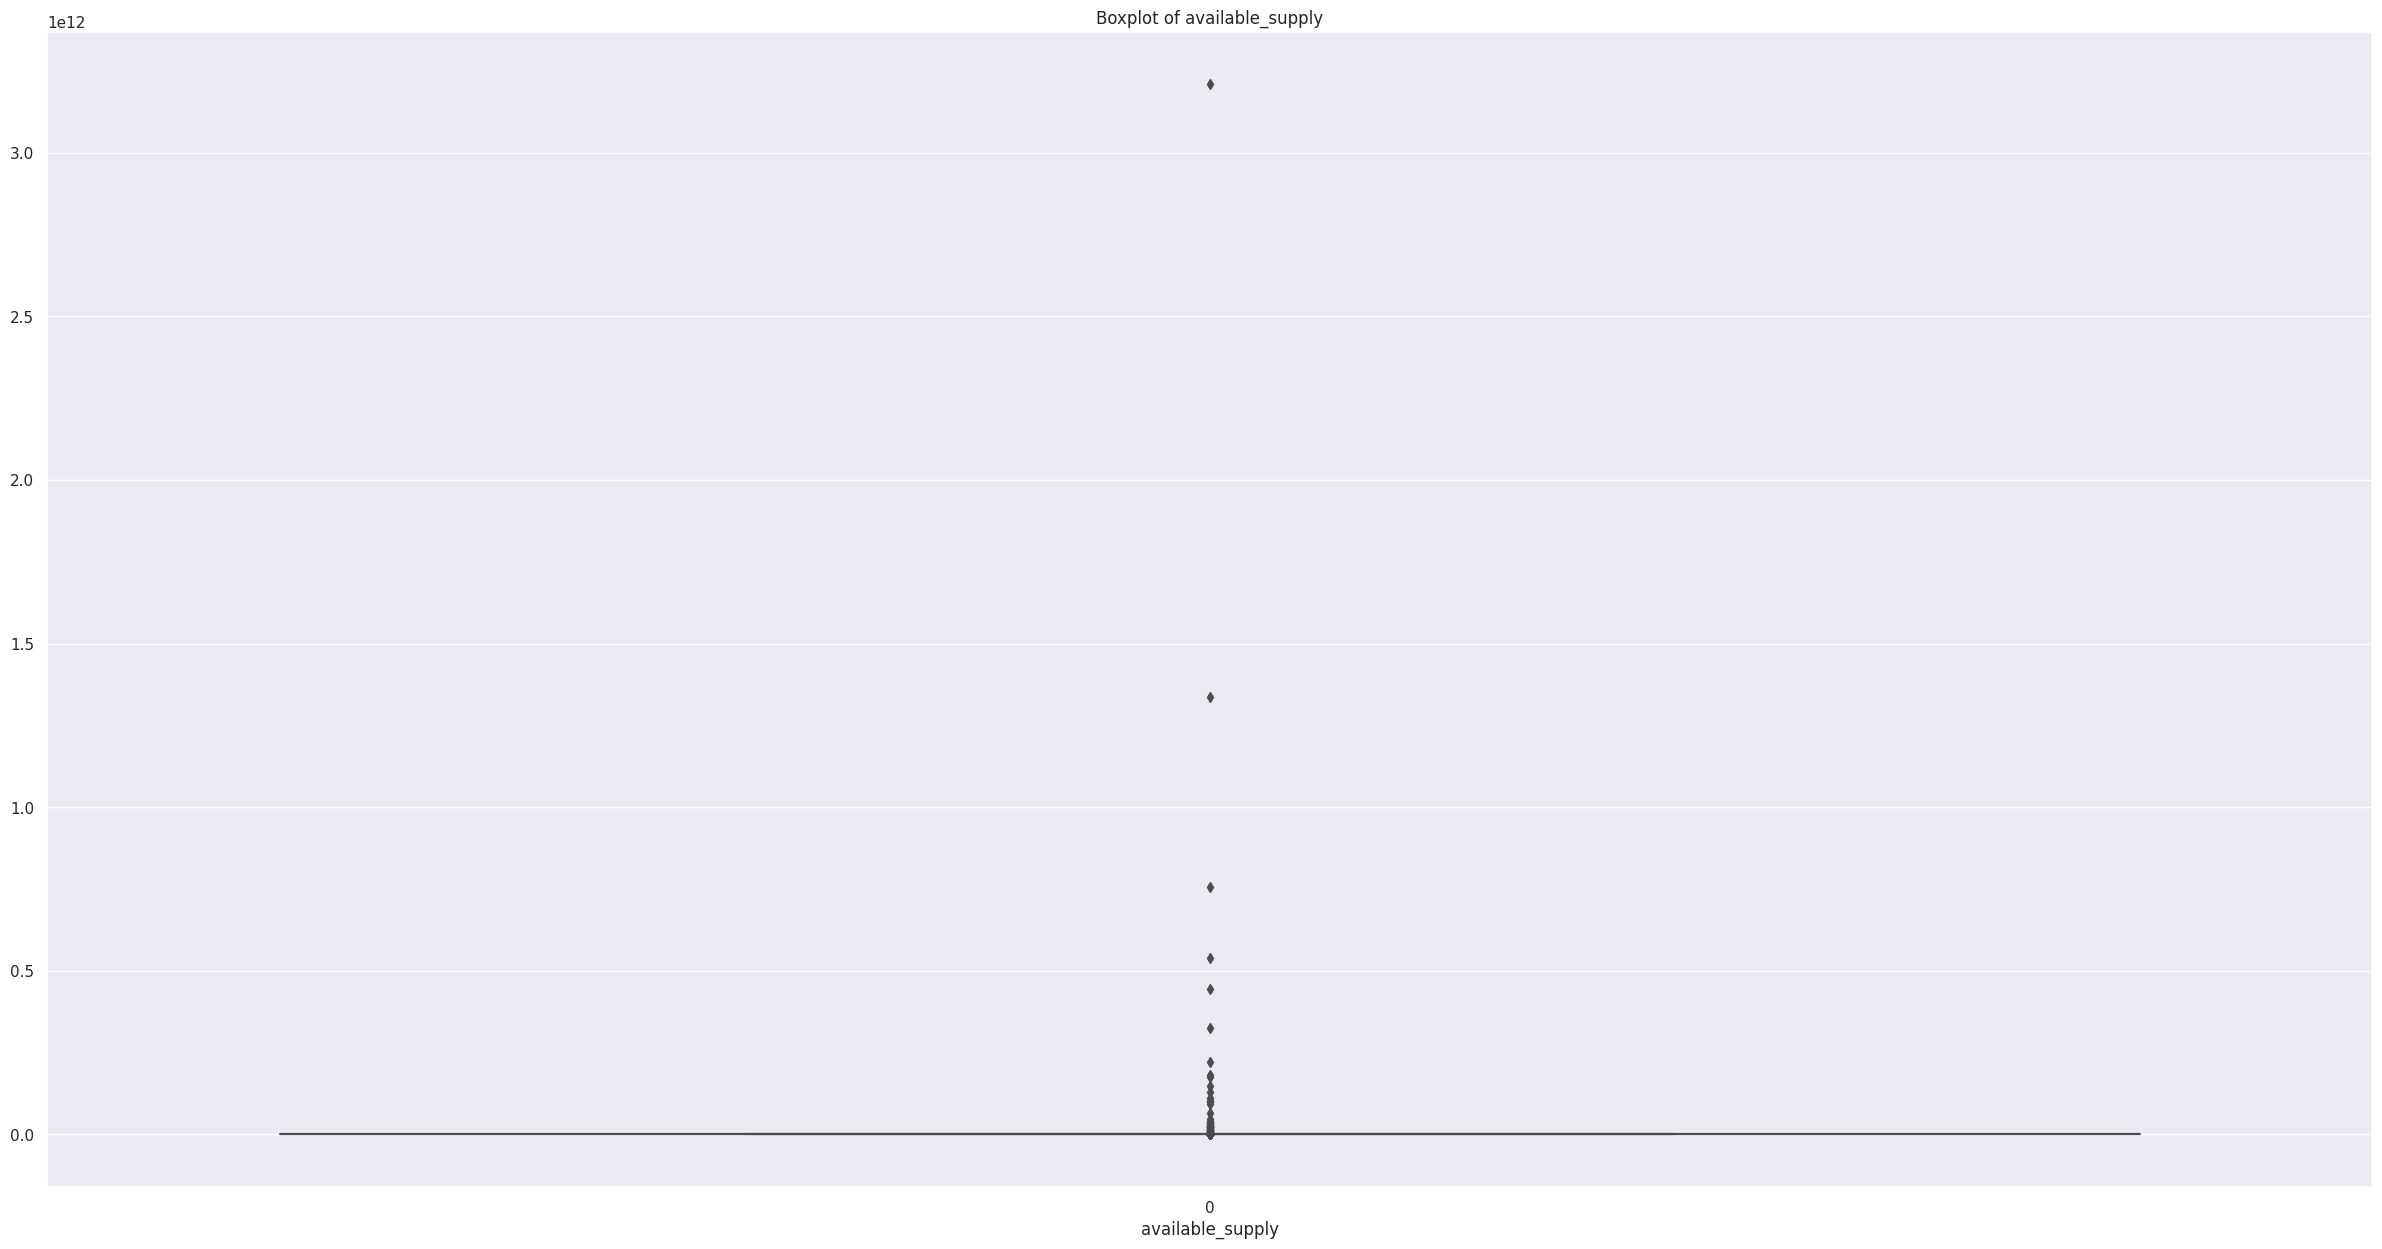

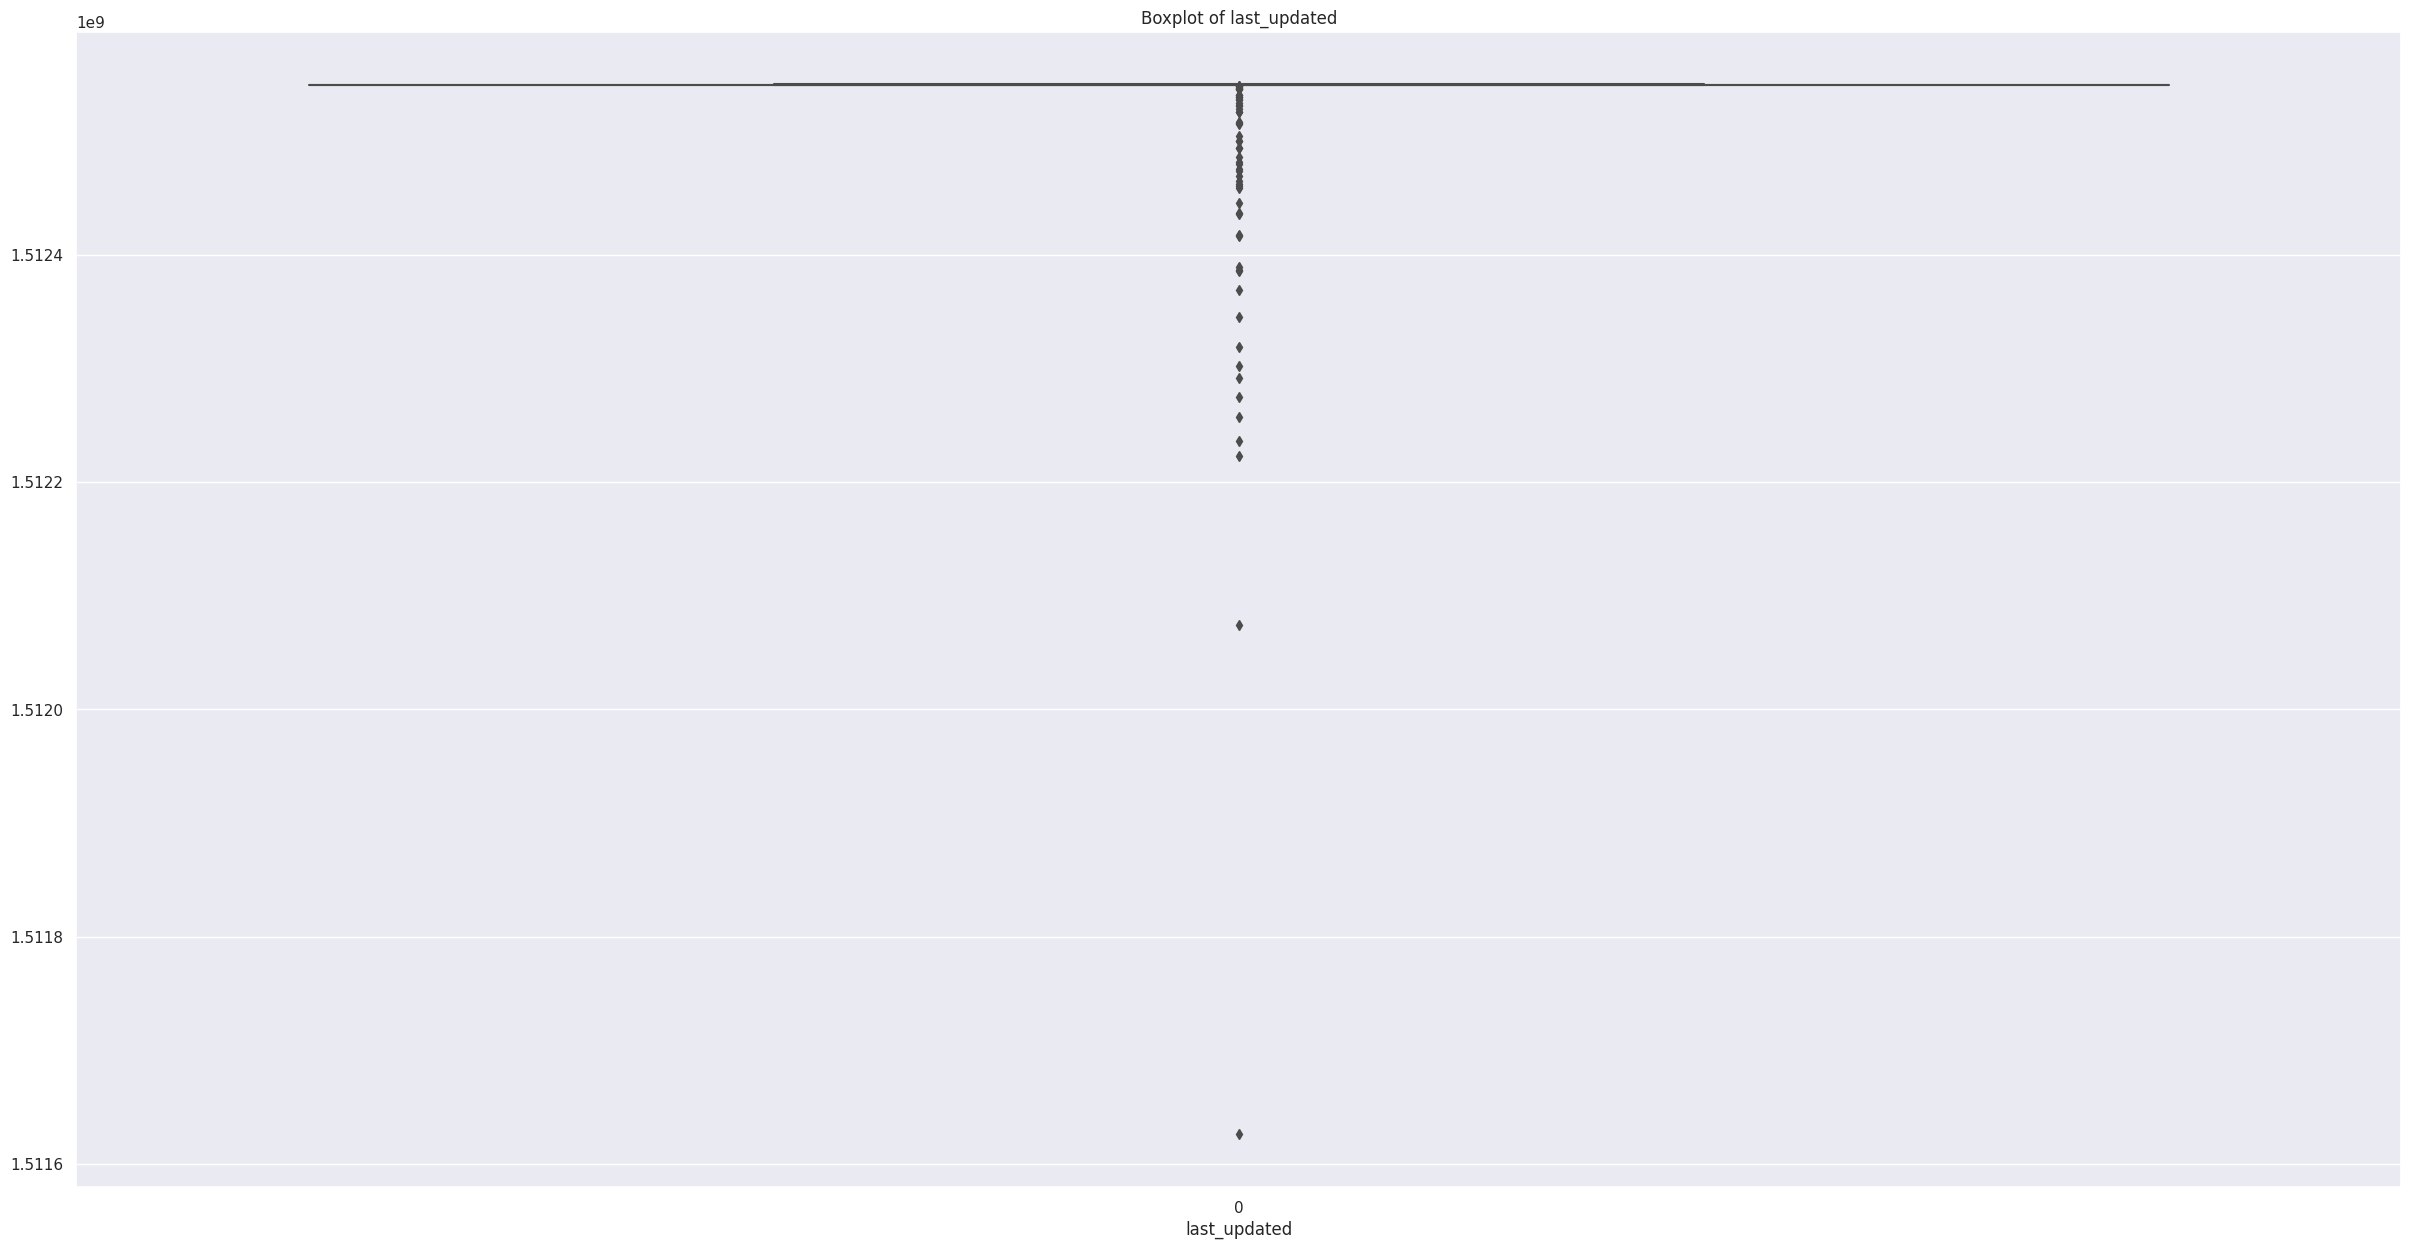

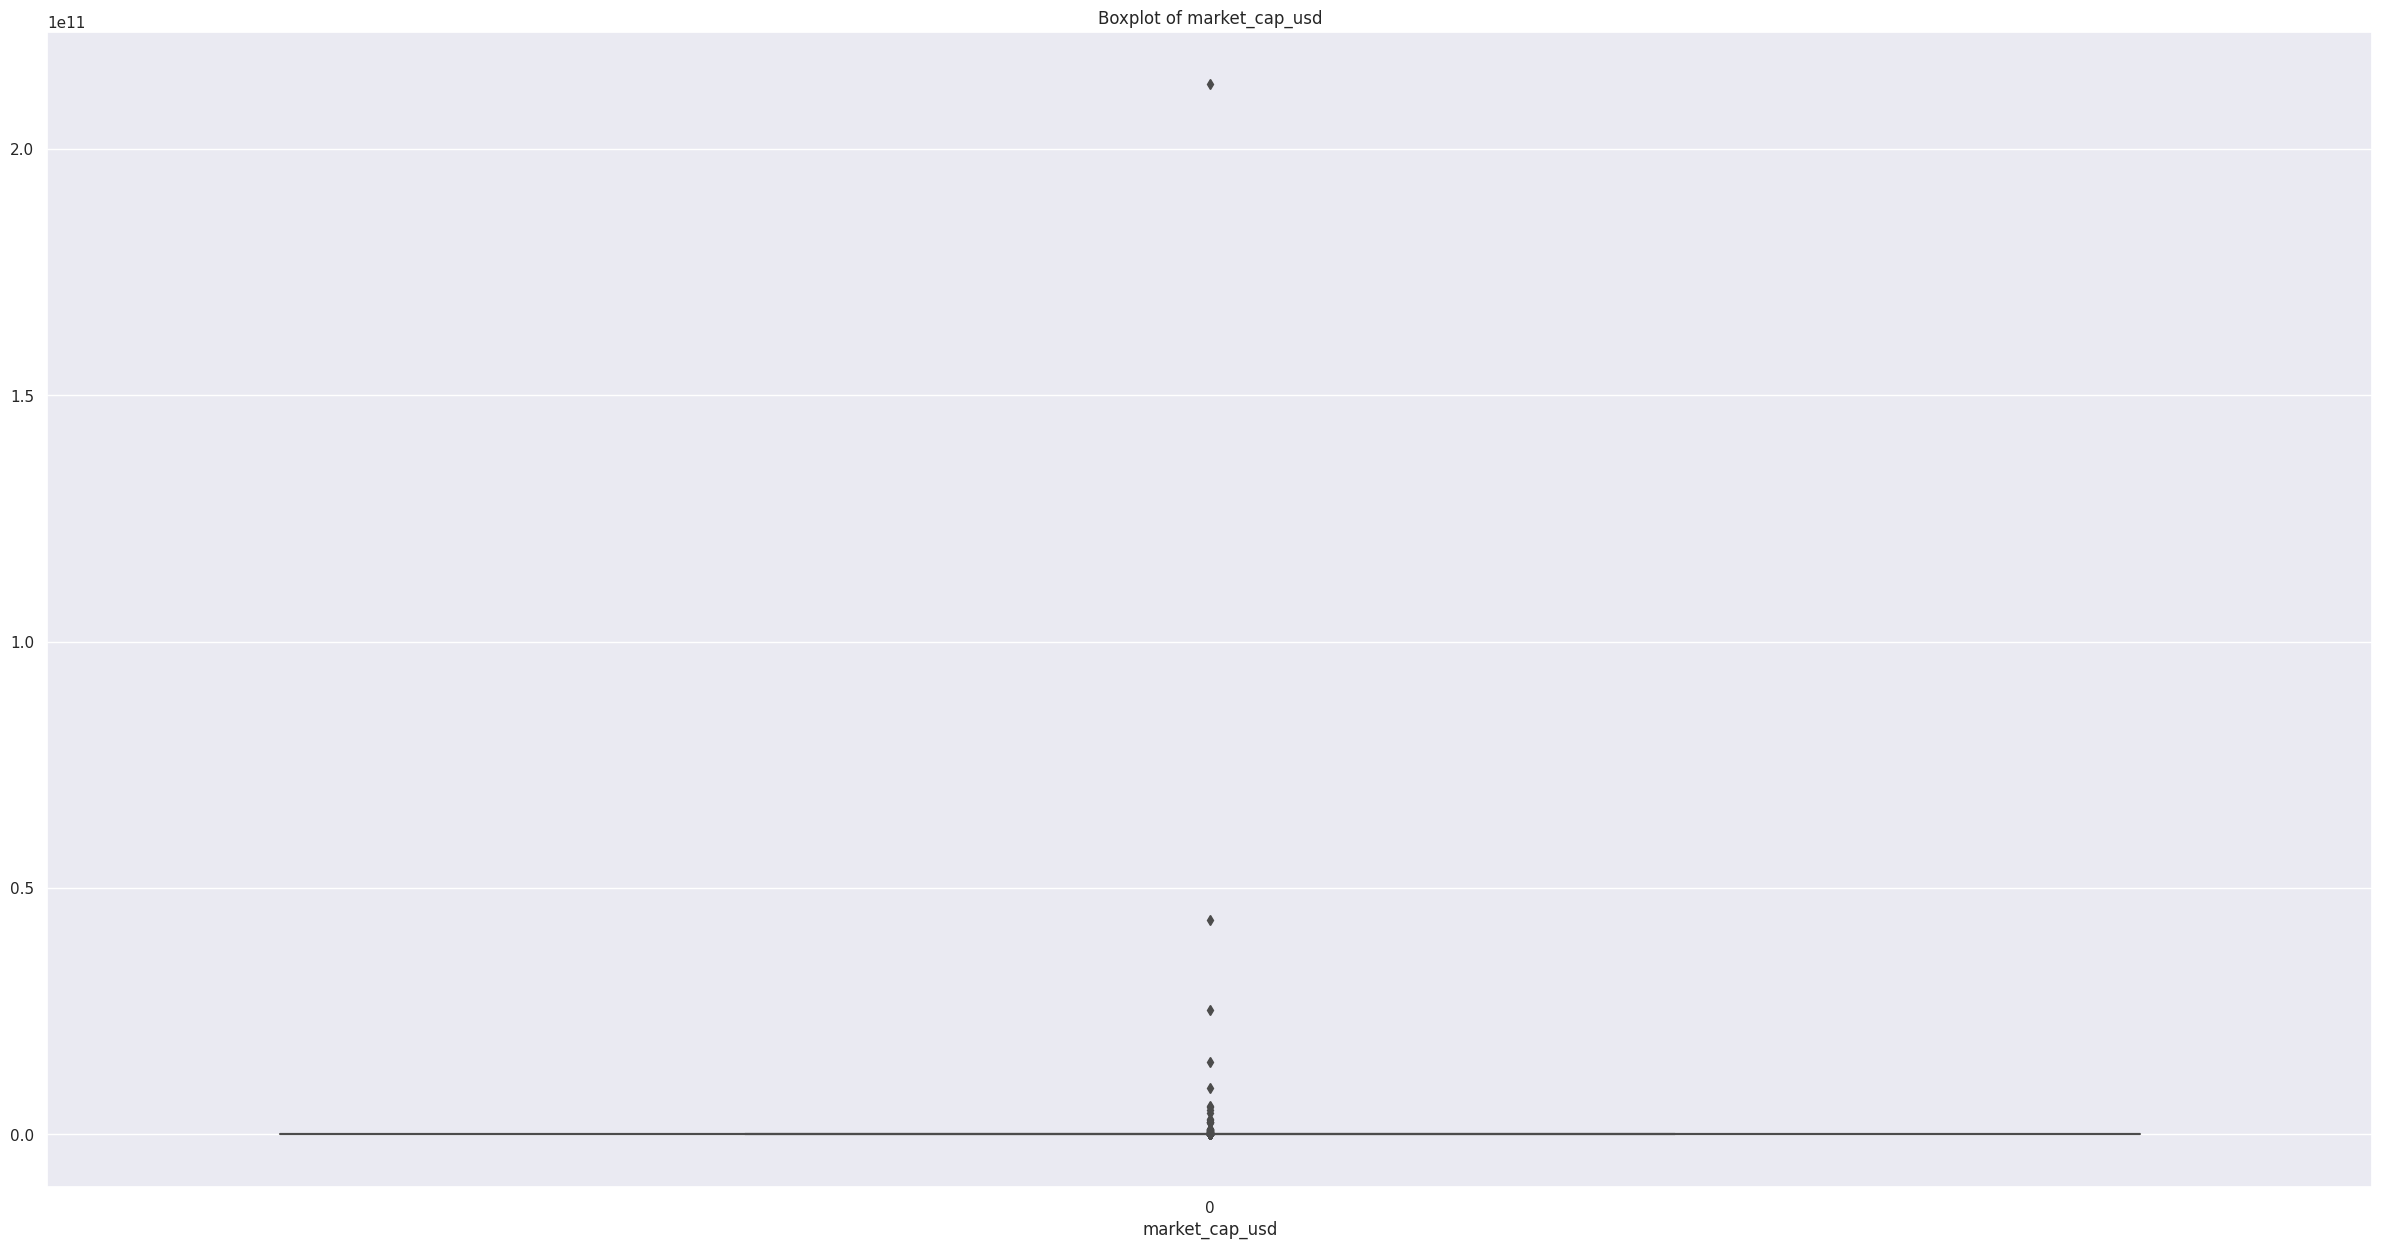

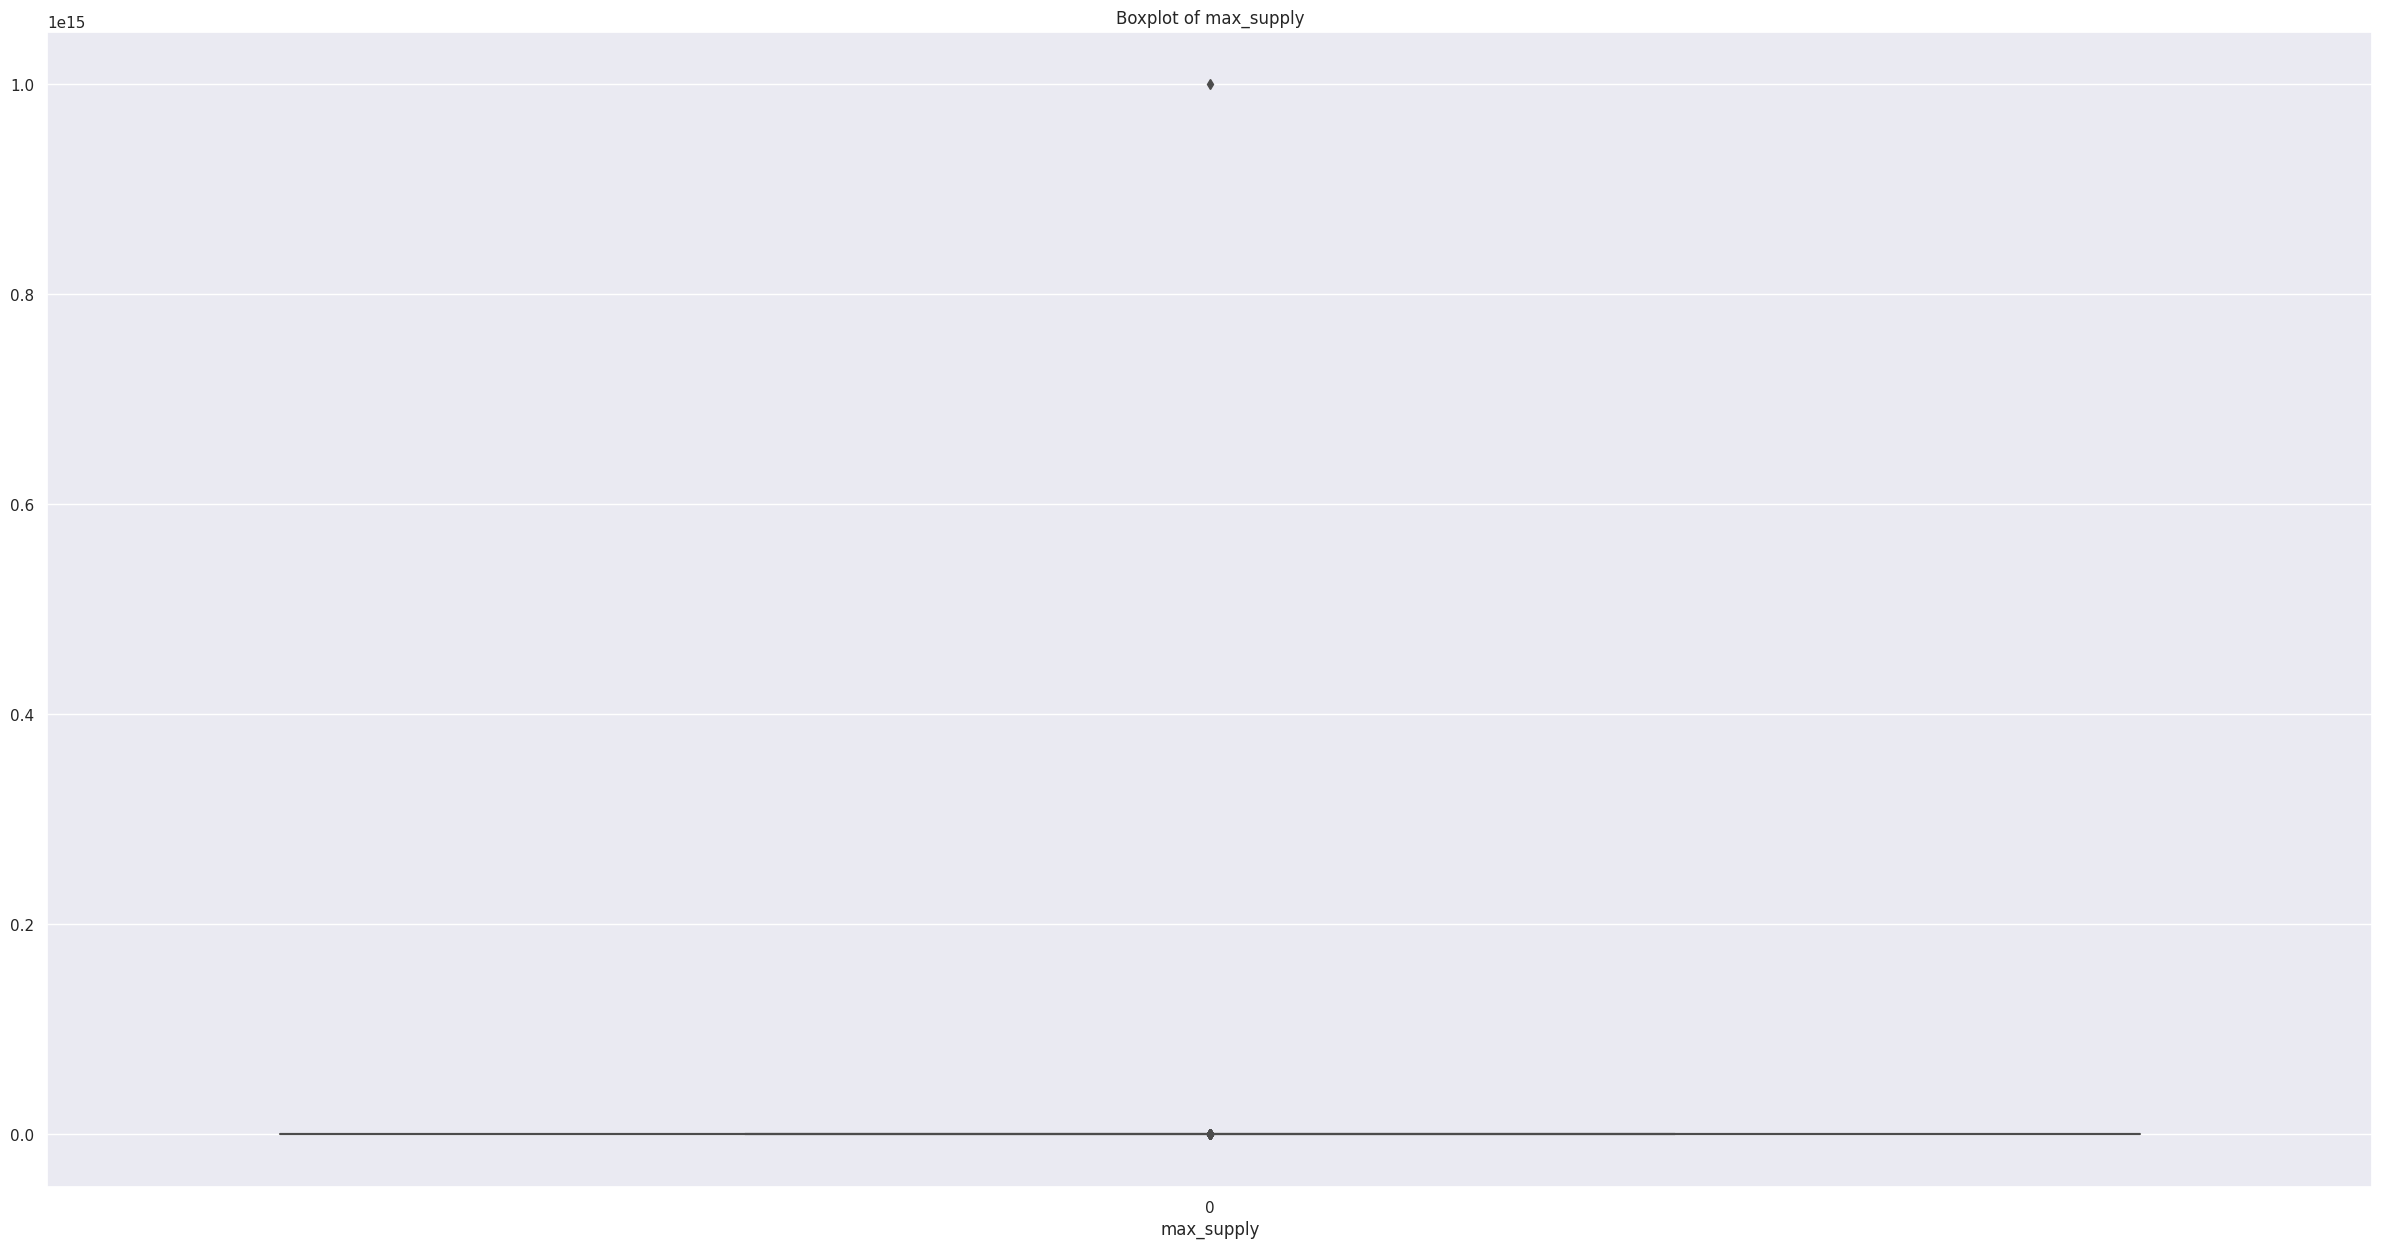

In [216]:
# Get the numerical columns of the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for each numerical column
for column in numerical_columns[:5]:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(data=df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

# Display the boxplots
plt.show()

# **REMOVING OUTLIERS**

In [217]:
# Get the numerical columns of the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Define the function to remove outliers using the IQR method
def remove_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Iterate over each numerical column and remove outliers
for column in numerical_columns:
    remove_outliers_iqr(column)

# **BOXPLOT**

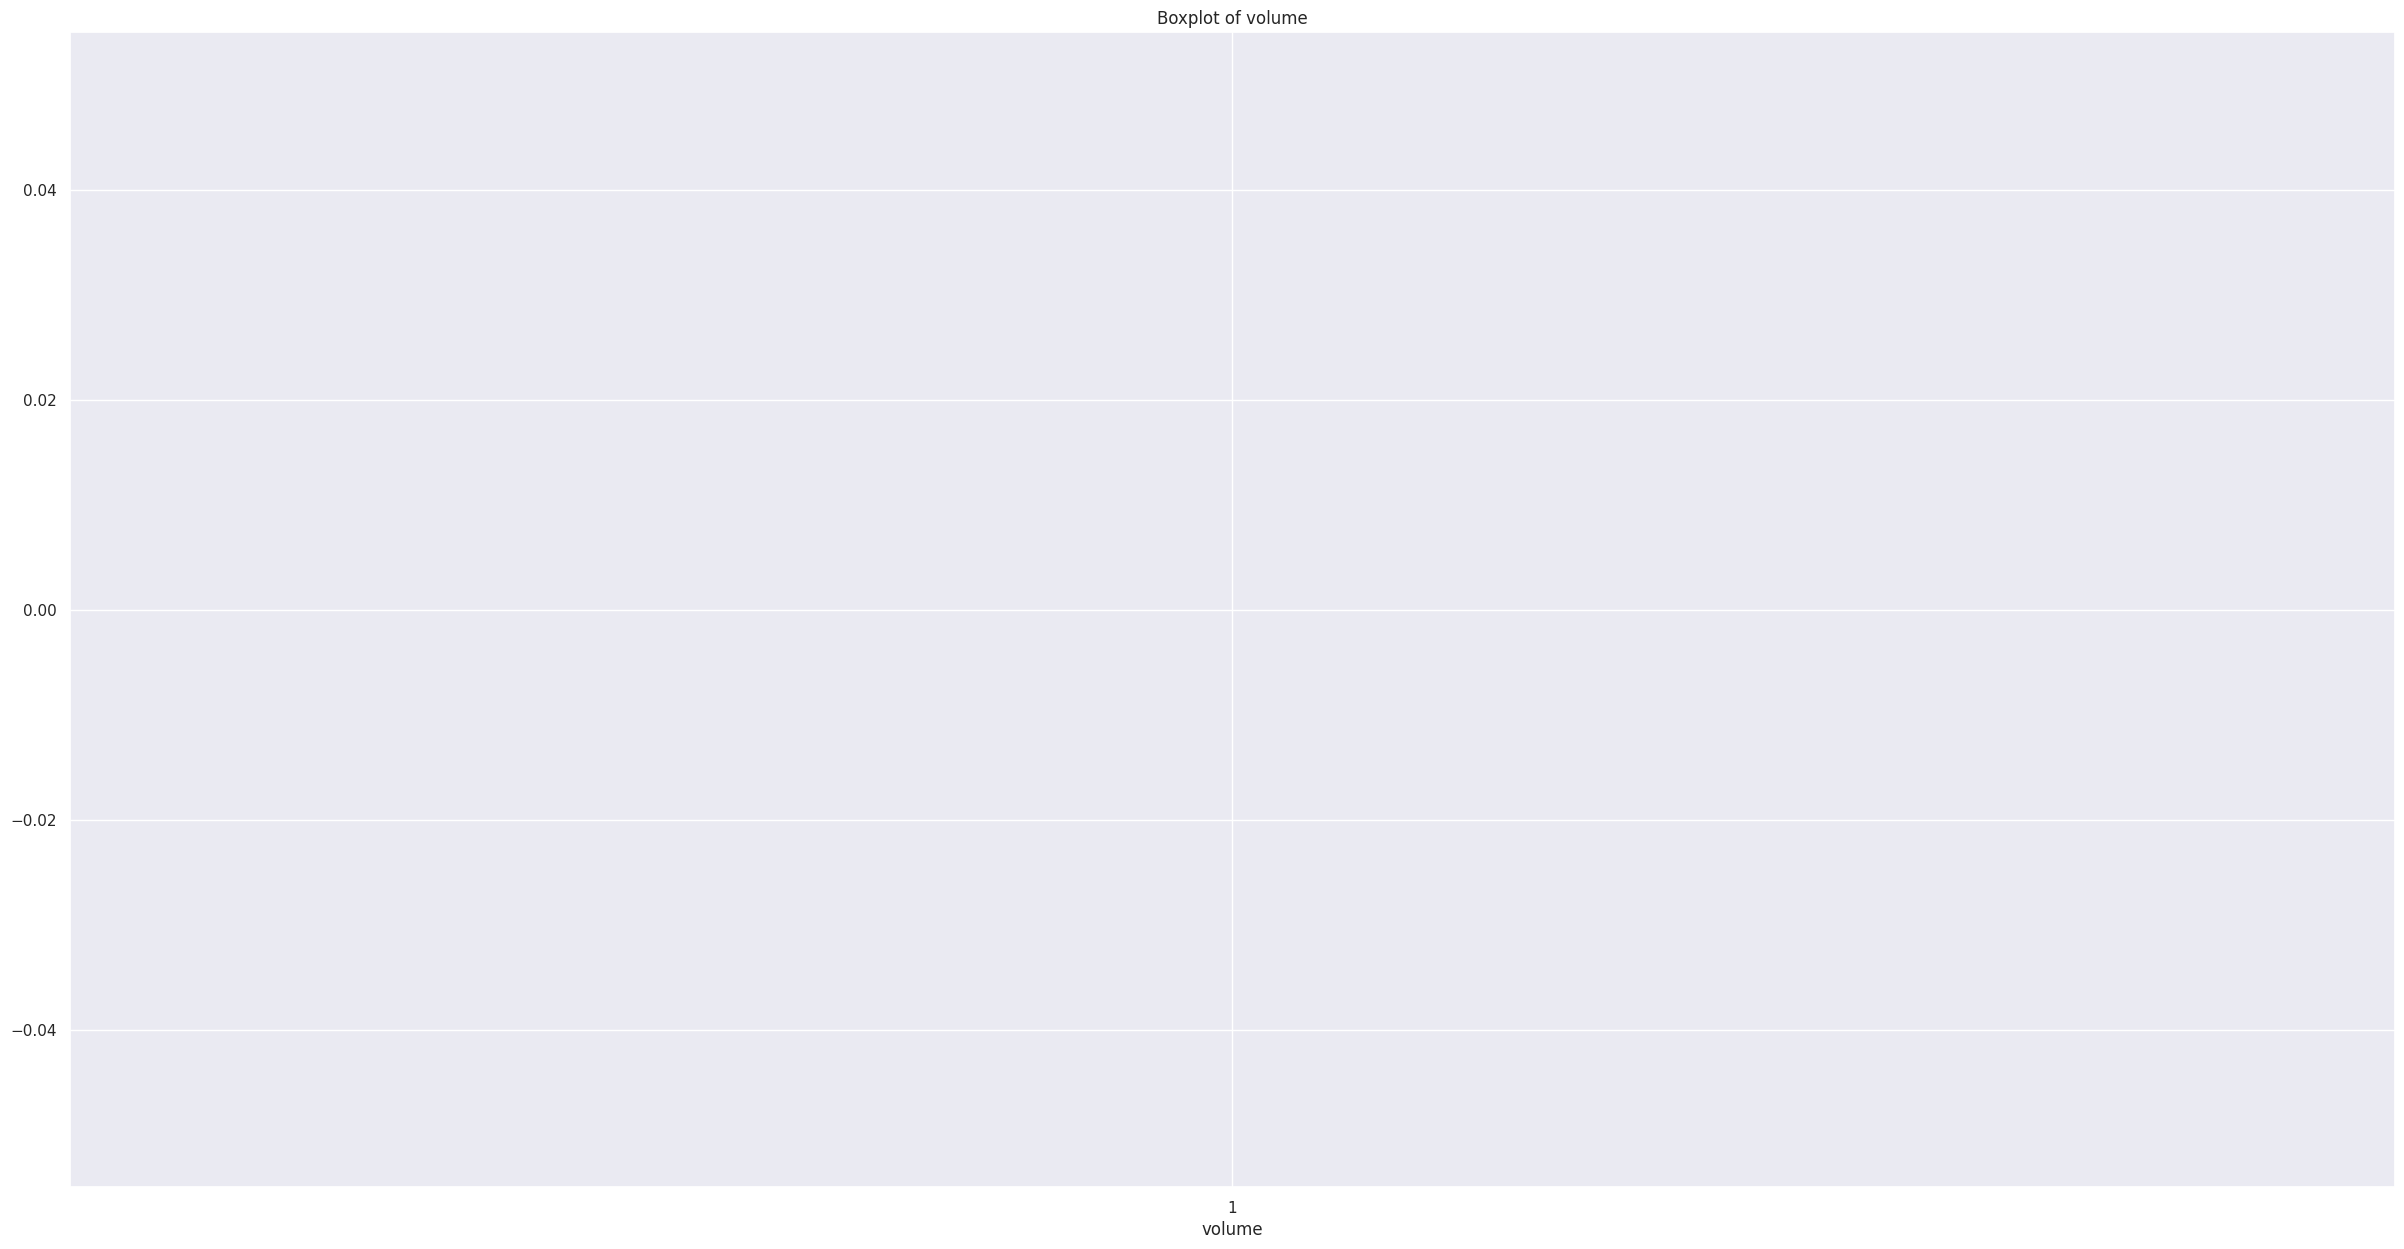

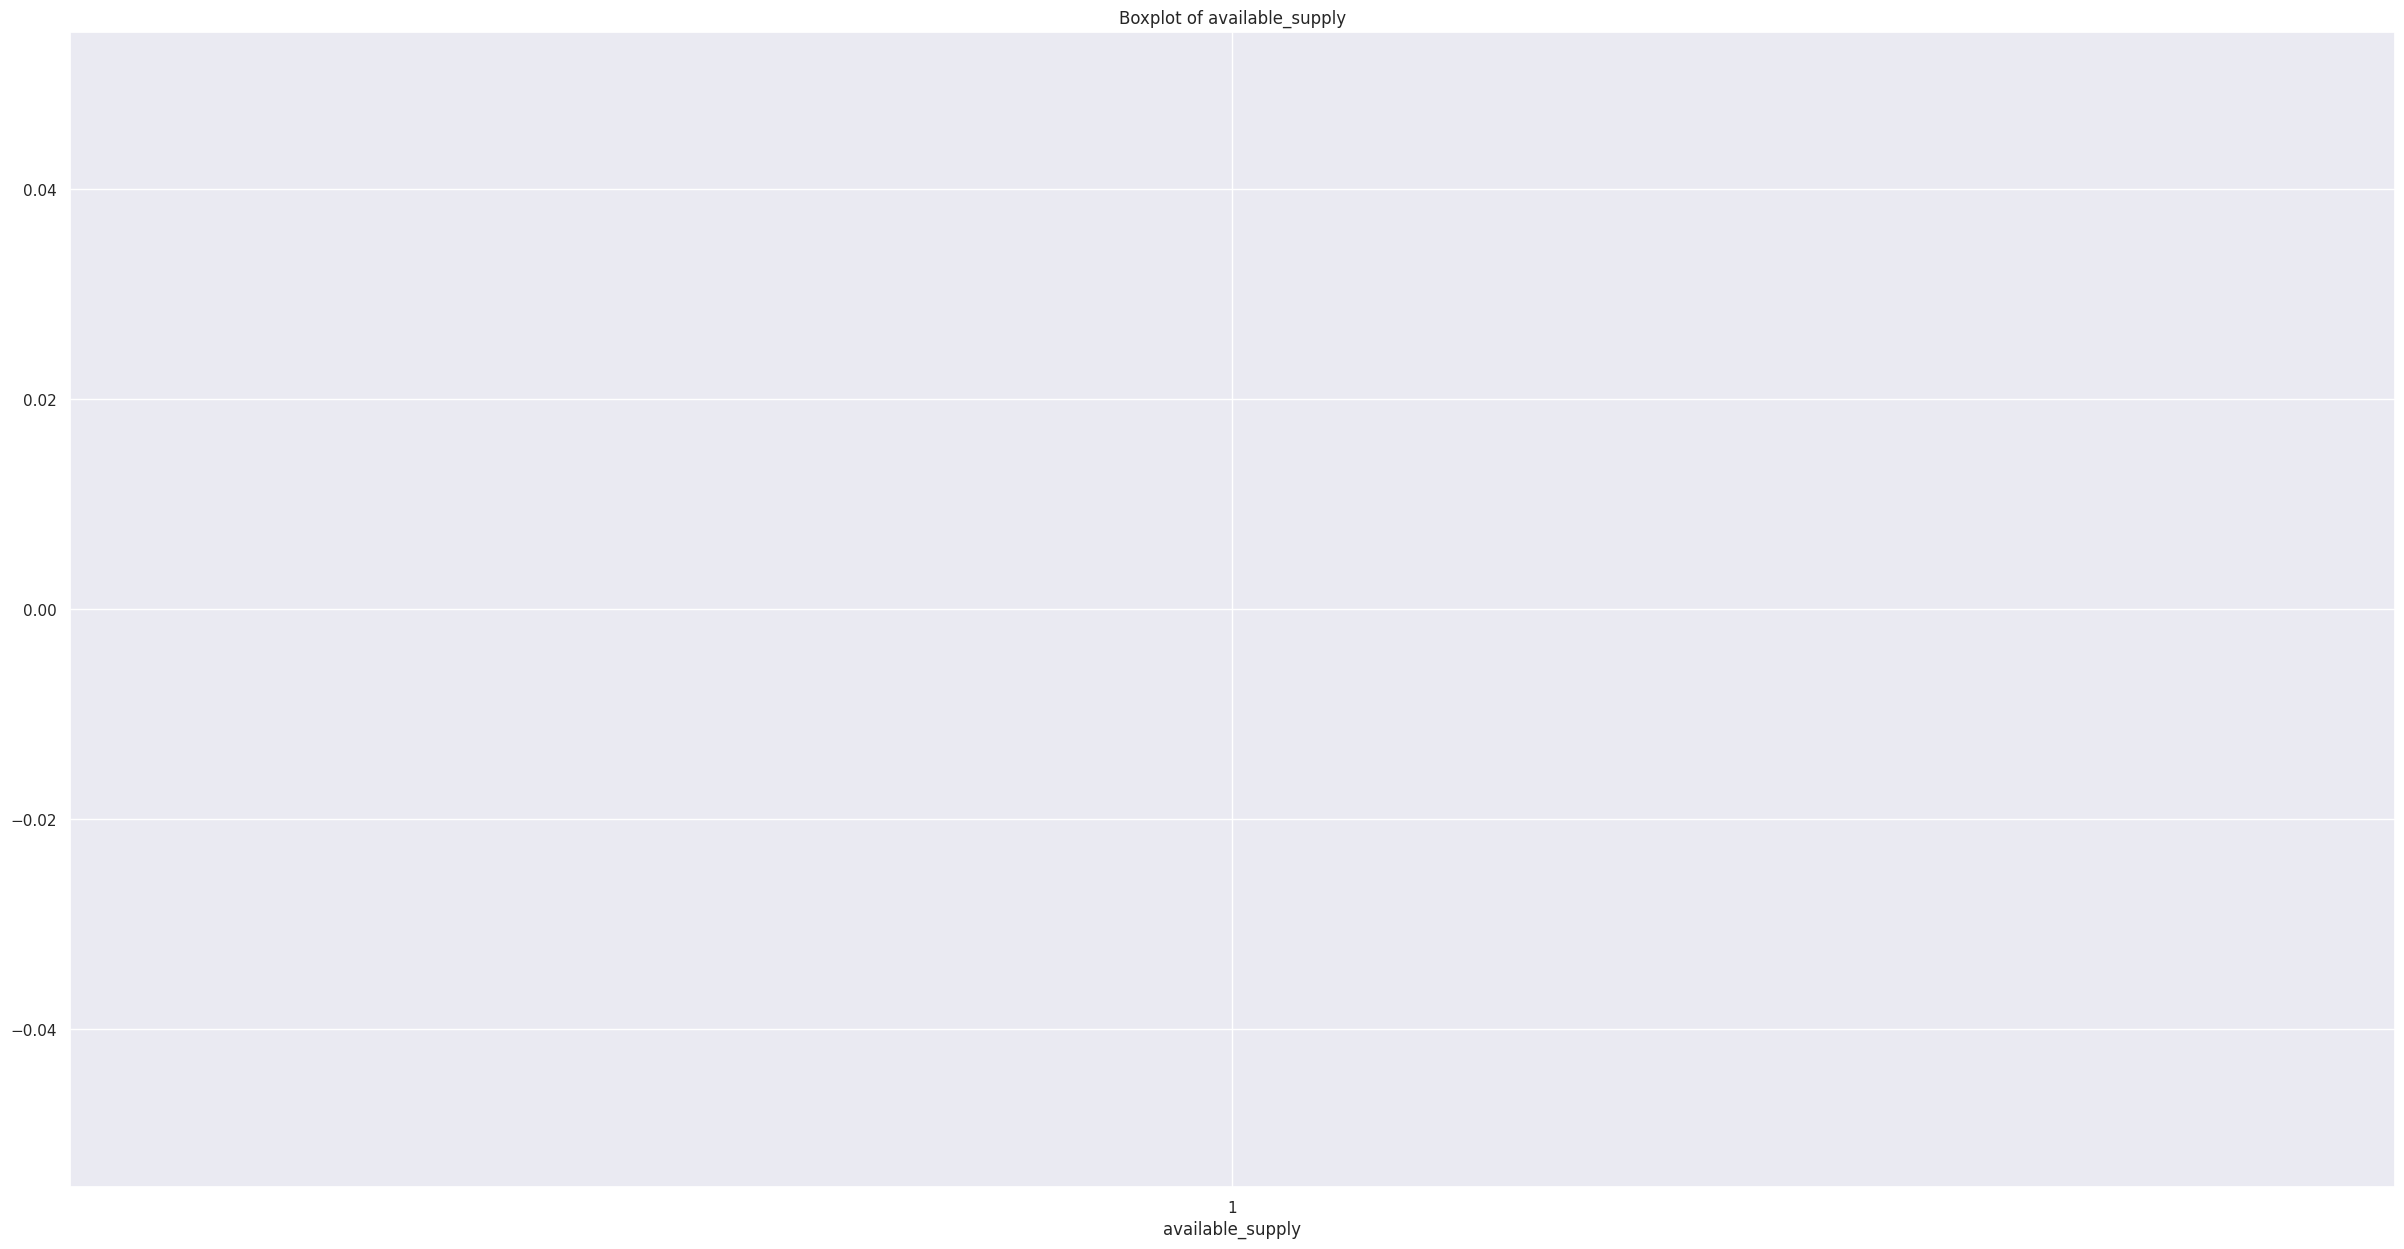

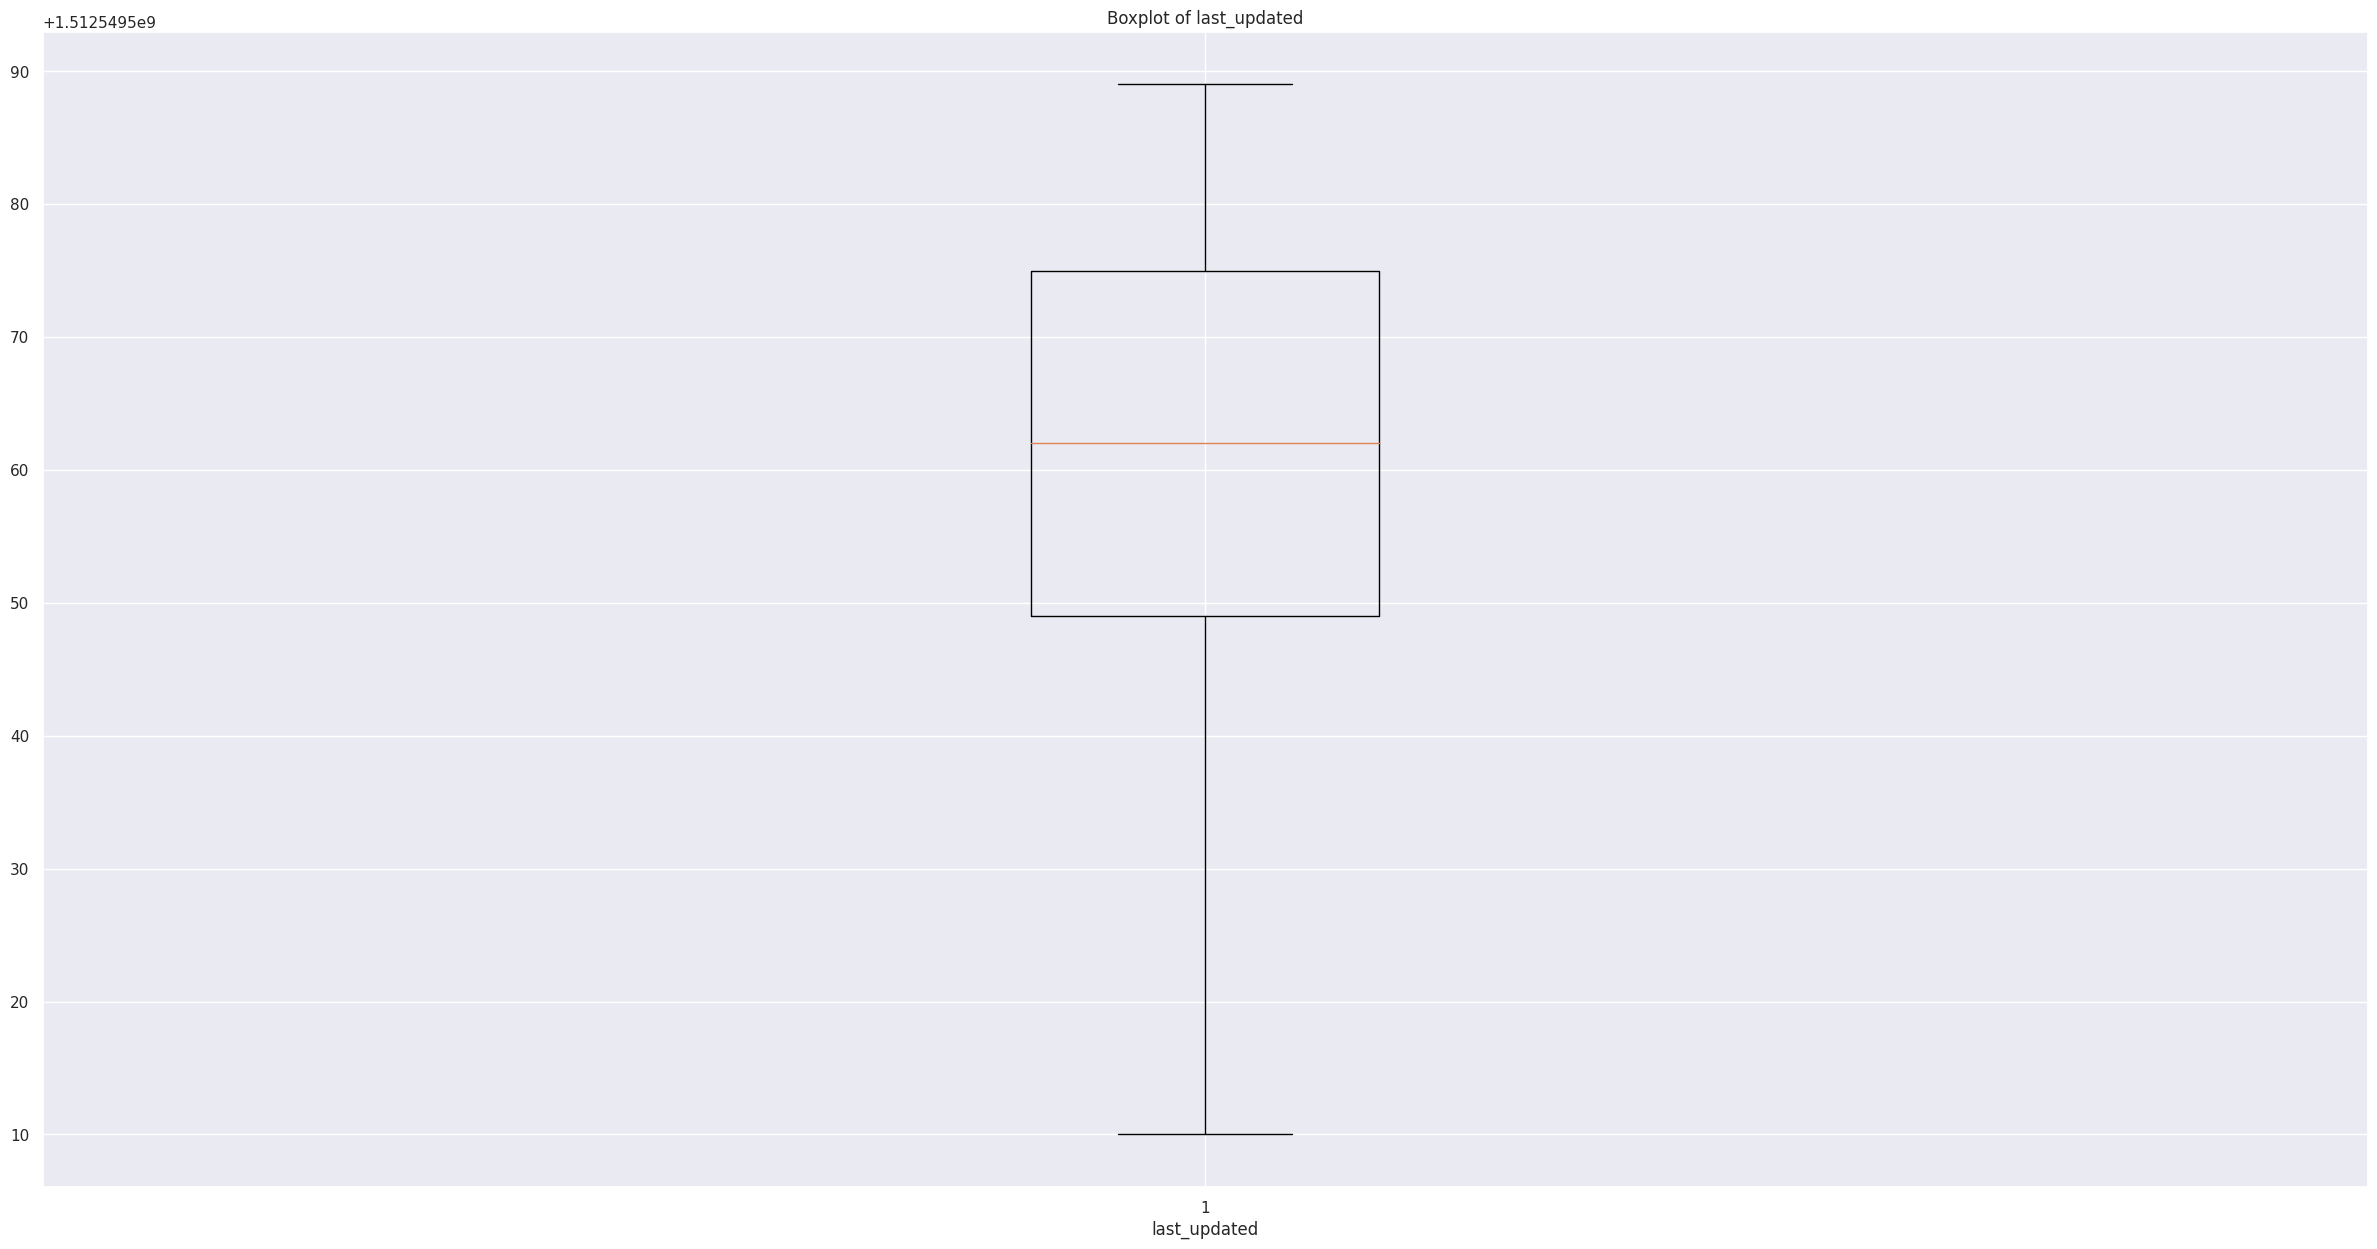

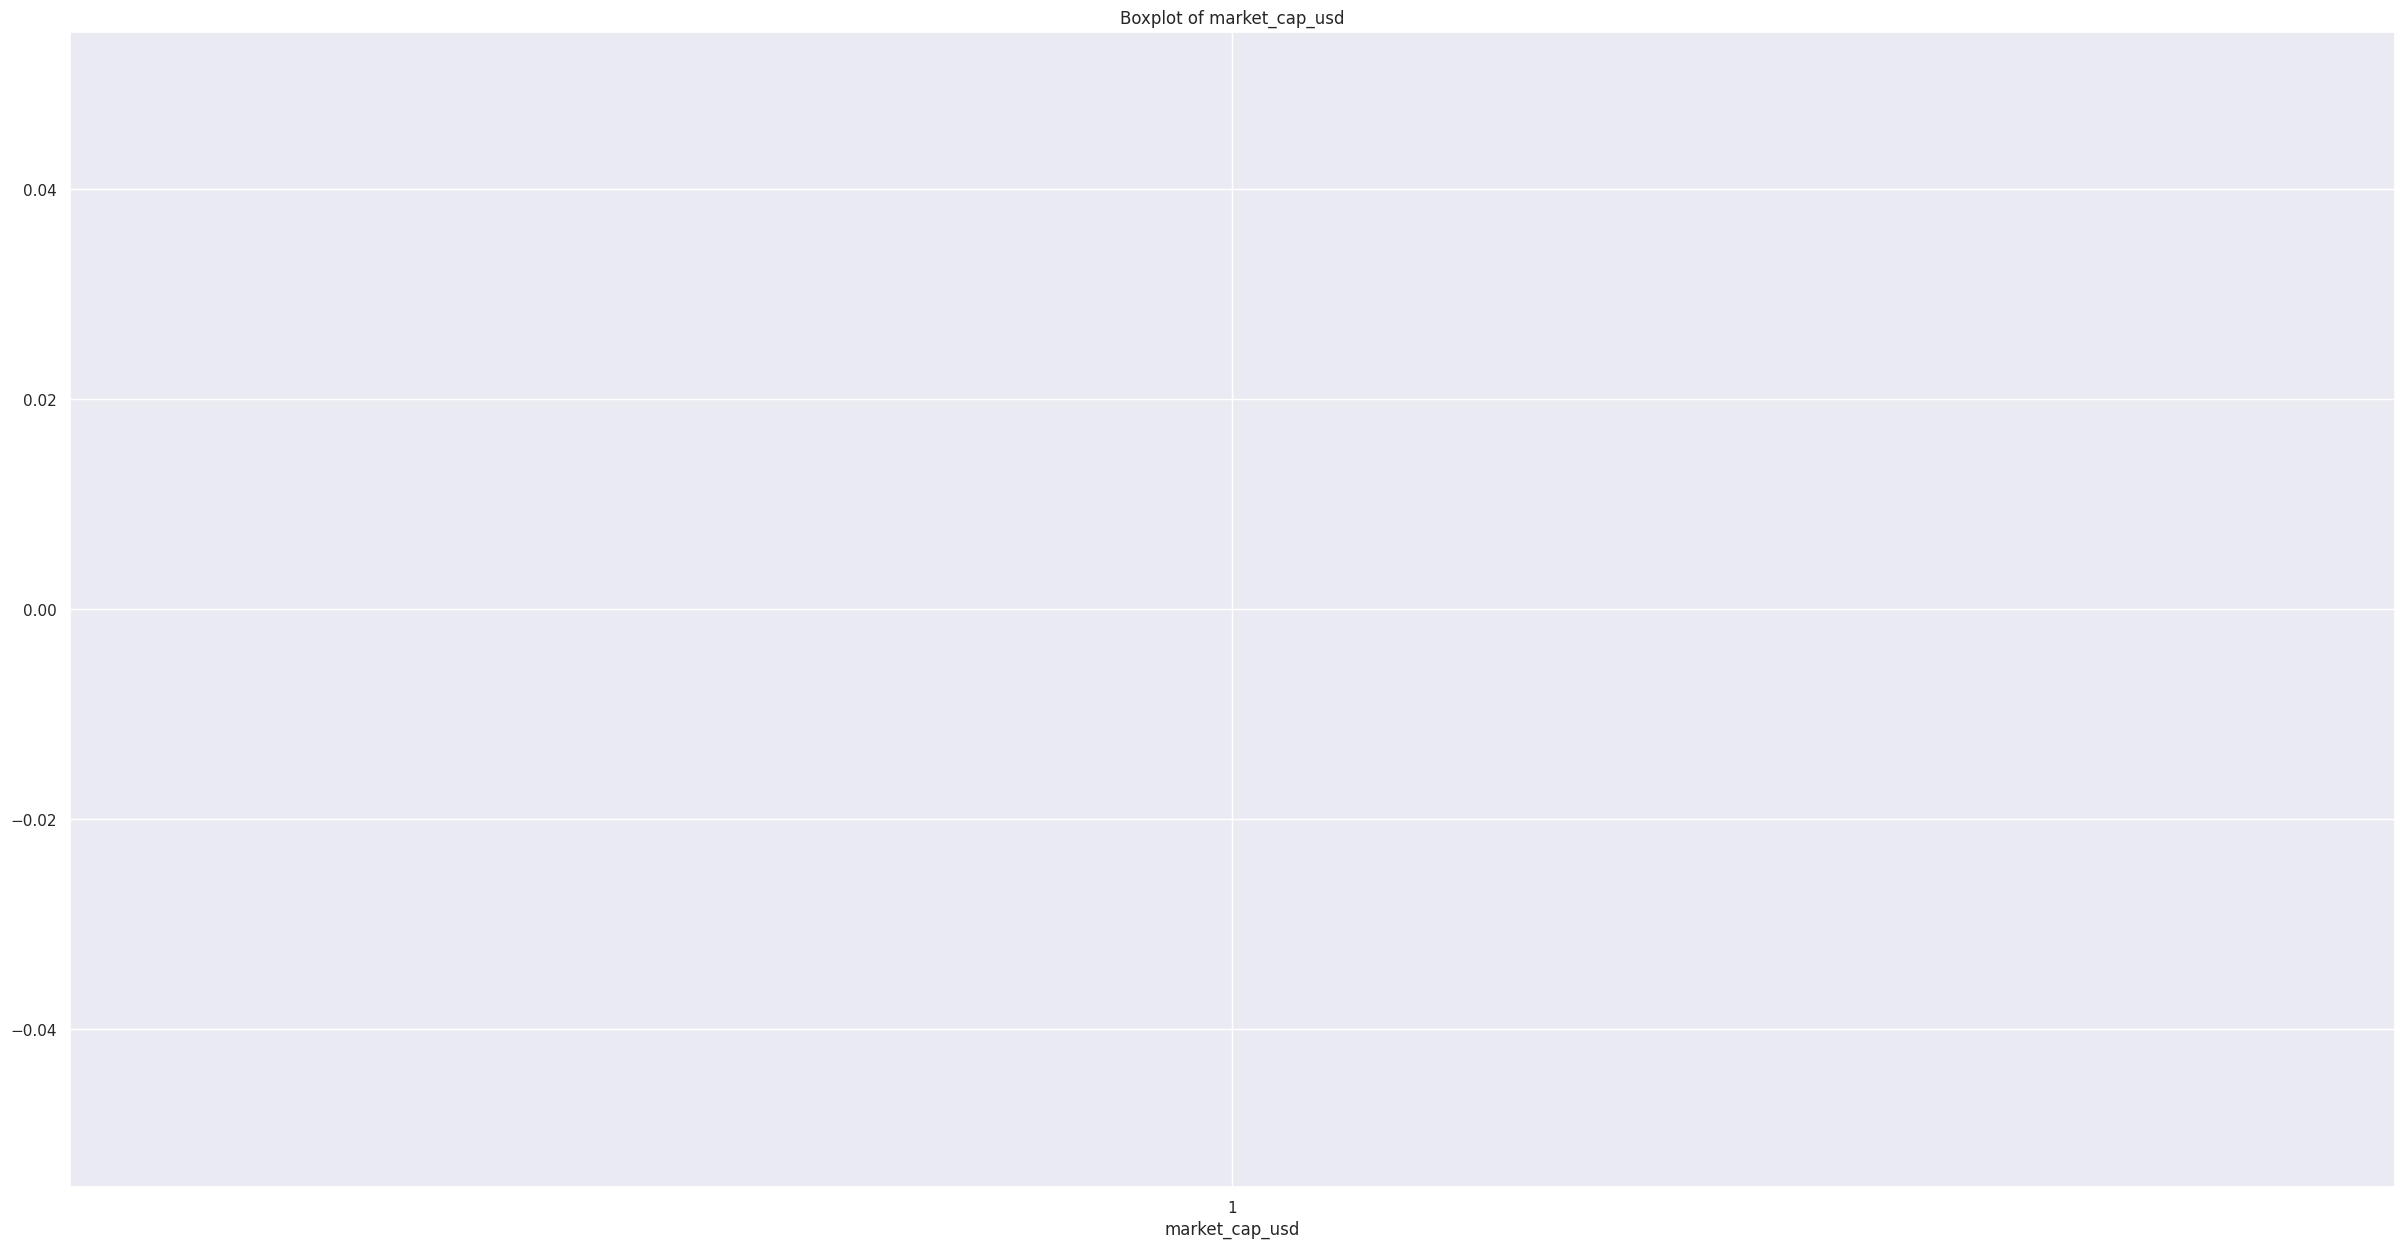

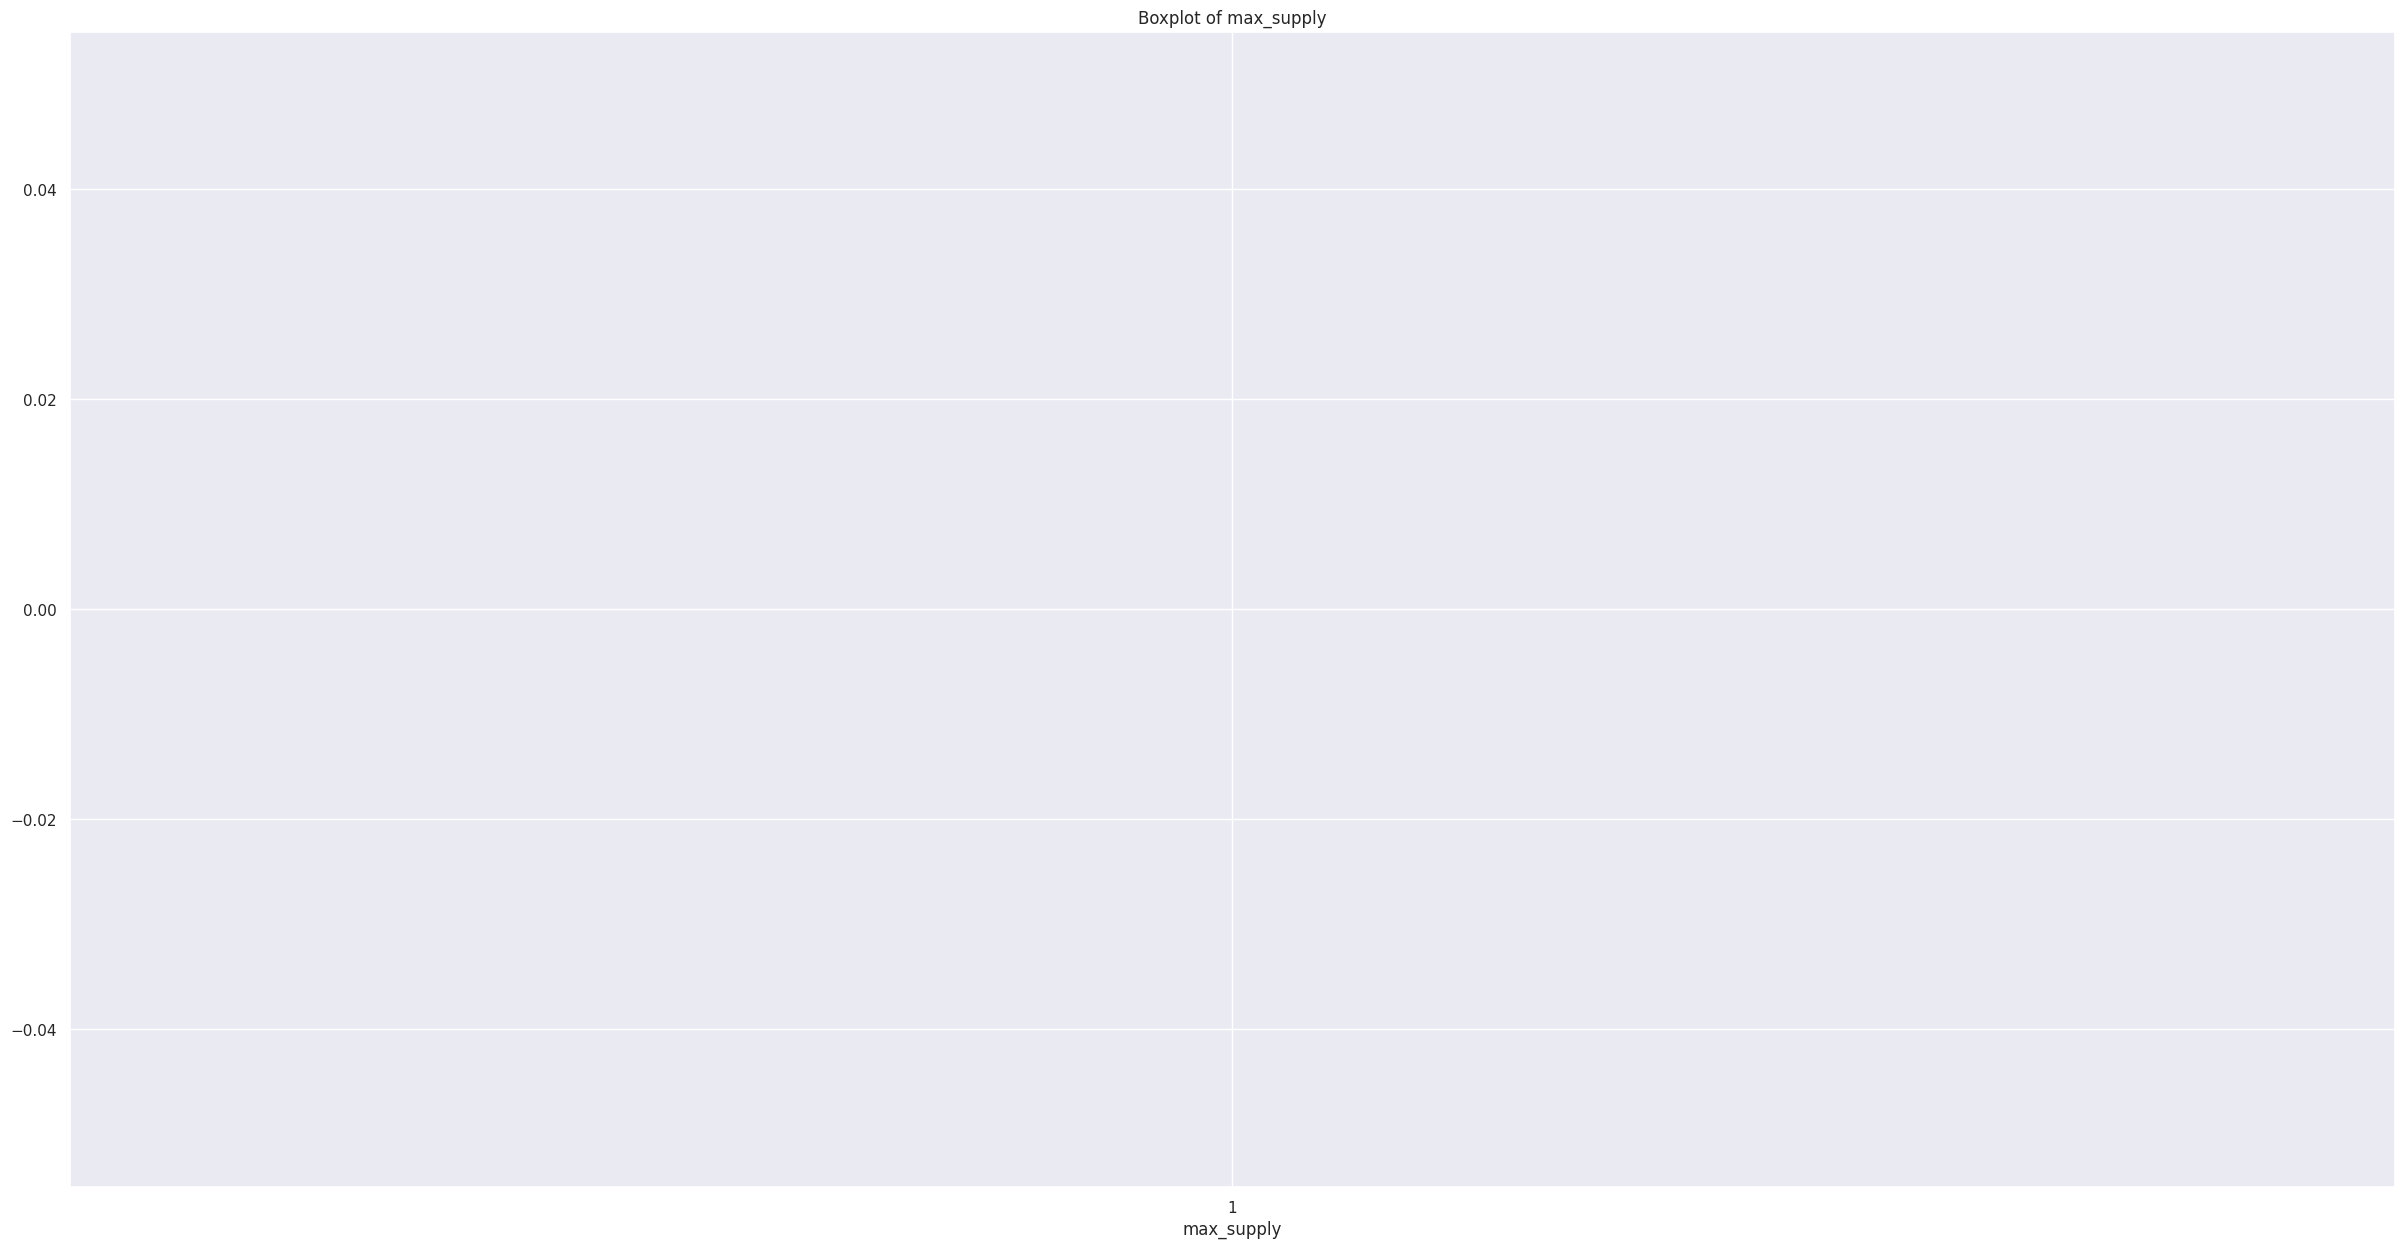

In [218]:
# Assuming you have a DataFrame named 'df' containing your data

# Get the numerical columns of the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for each numerical column
for column in numerical_columns[:5]:
    plt.figure()  # Create a new figure for each boxplot
    plt.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

# Display the boxplots
plt.show()

# **JOINTPLOT**

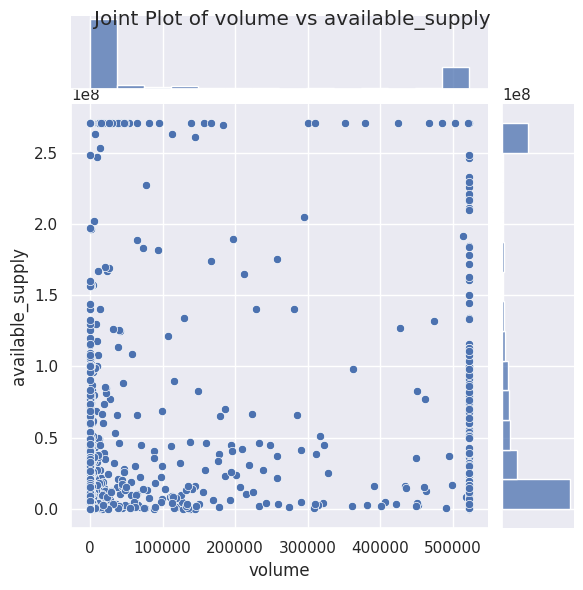

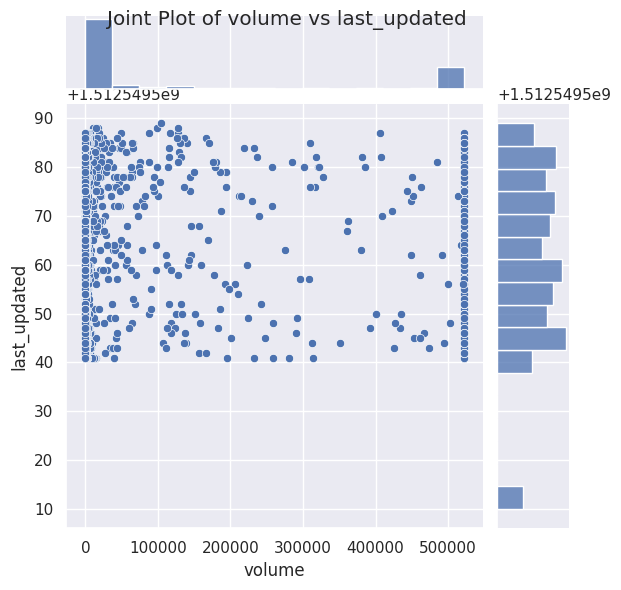

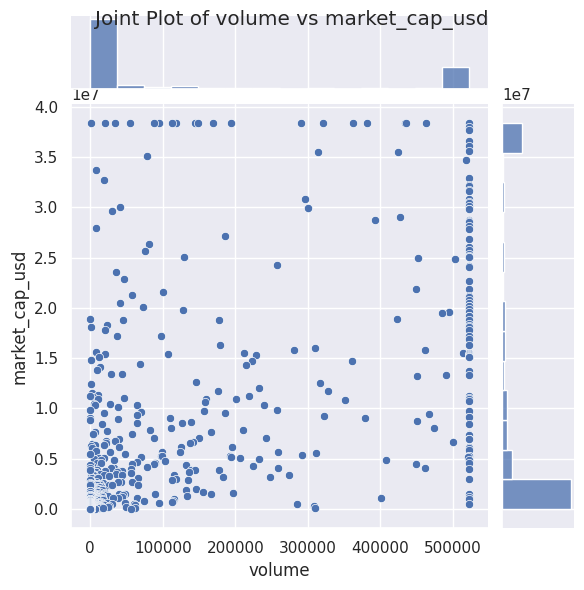

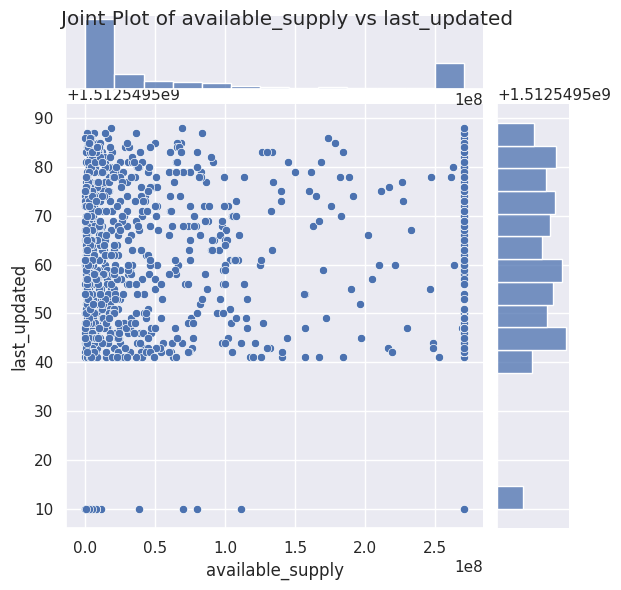

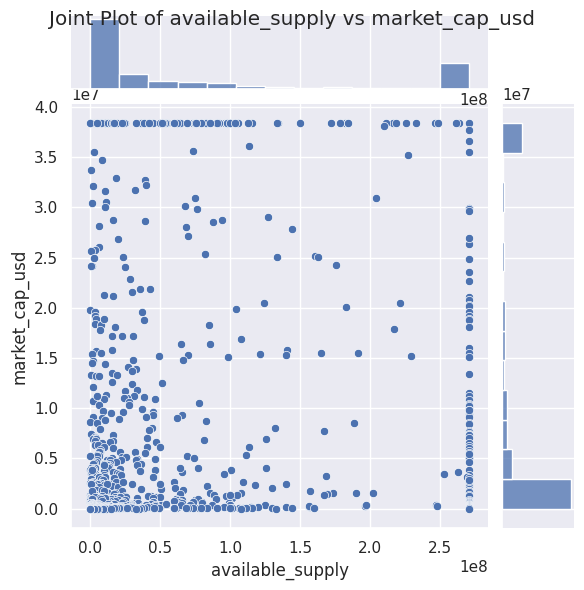

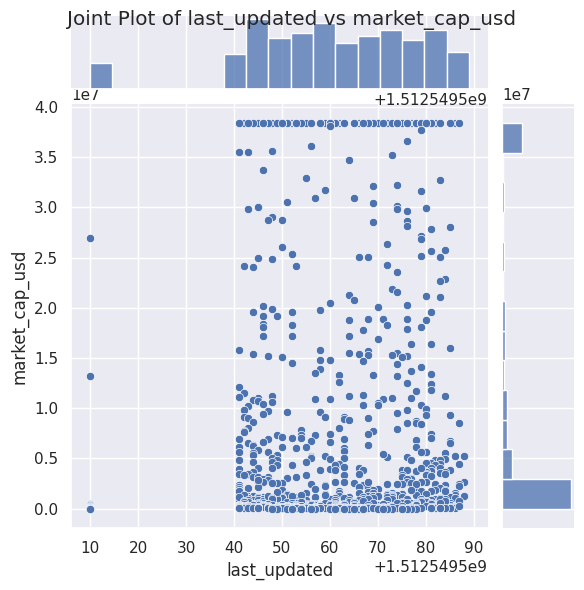

In [219]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create joint plots for each pair of numerical columns
for i in range(min(len(numerical_columns), 4)):  # Considering only the first five columns
    for j in range(i + 1, min(len(numerical_columns), 4)):  # Considering only the first five columns
        volume = numerical_columns[i]
        available_supply = numerical_columns[j]
        sns.jointplot(data=df, x=volume, y=available_supply, kind='scatter')
        plt.suptitle(f"Joint Plot of {volume} vs {available_supply}")
        plt.show()

In [220]:
df.head()

volume  available_supply            id  last_updated  \
0  521875.532375        16723525.0       bitcoin    1512549554   
1  521875.532375        96165368.0      ethereum    1512549553   
2  521875.532375        16840438.0  bitcoin-cash    1512549578   
3  521875.532375       270685004.0          iota    1512549571   
4  521875.532375       270685004.0        ripple    1512549541   

   market_cap_usd    max_supply          name  percent_change_1h  \
0     38386806.25  2.100000e+07       Bitcoin               0.12   
1     38386806.25           NaN      Ethereum              -0.18   
2     38386806.25  2.100000e+07  Bitcoin Cash               1.65   
3     38386806.25  1.614194e+09          IOTA              -1.88   
4     38386806.25  1.614194e+09        Ripple               0.56   

   percent_change_24h  percent_change_7d  price_btc  price_usd  rank symbol  \
0               7.330             17.450   0.000092   1.146848     1    BTC   
1              -3.930             -7.330   0.000092   1.146848     2    ETH   
2              -5.510             -4.750   0.000092   1.146848     3    BCH   
3              39.105            100.775   0.000092   1.146848     4  MIOTA   
4              -3.700            -14.790   0.000019   0.241754     5    XRP   

   total_supply  
0    16723525.0  
1    96165368.0  
2    16840438.0  
3   623071797.5  
4   623071797.5

In [221]:
le=LabelEncoder()
print(le)

LabelEncoder()


In [222]:
df = df.astype(str)

In [223]:
df = df.apply(LabelEncoder().fit_transform)

In [224]:
df.head()

volume  available_supply    id  last_updated  market_cap_usd  max_supply  \
0     763               205   128            14             554          34   
1     763               802   455            13             554         104   
2     763               210   130            38             554          34   
3     763               381   664            31             554          20   
4     763               381  1005             1             554          20   

   name  percent_change_1h  percent_change_24h  percent_change_7d  price_btc  \
0   145                116                 903                538        644   
1   441                 16                 293                349        644   
2   147                222                 358                273        644   
3   609                105                 820                439        644   
4   976                157                 282                 79        175   

   price_usd  rank  symbol  total_supply  
0        949     0     181           196  
1        949   438     423           821  
2        949   549     107           200  
3        949   660     714           666  
4        741   771    1257           666

In [225]:
from sklearn.cluster import KMeans
dist_df = []
sse = []
for num_clust in range(1, 10):
  km  = KMeans(n_clusters=num_clust)
  km.fit(df)
  dist_df.append([num_clust, km.inertia_])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [226]:
!pip install kneed

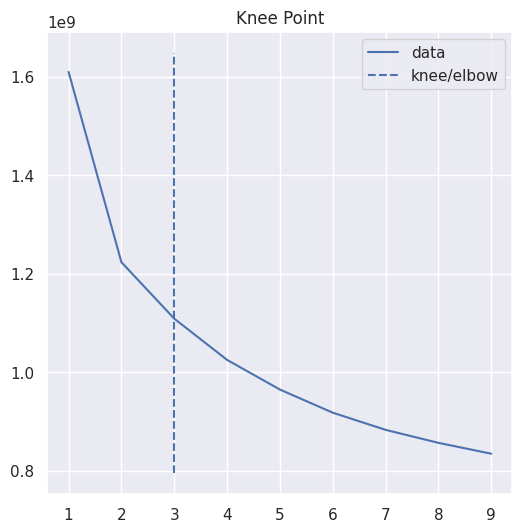

In [227]:
dist_df = pd.DataFrame(dist_df, columns=['num_of_cluster', 'distance'])
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), dist_df['distance'], curve="convex", direction="decreasing")
kl.elbow

kl.plot_knee()

In [228]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
y_pred = kmeans.predict(df)
df['Pred'] = y_pred
df['Pred'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



1    674
0    652
Name: Pred, dtype: int64

<Axes: >

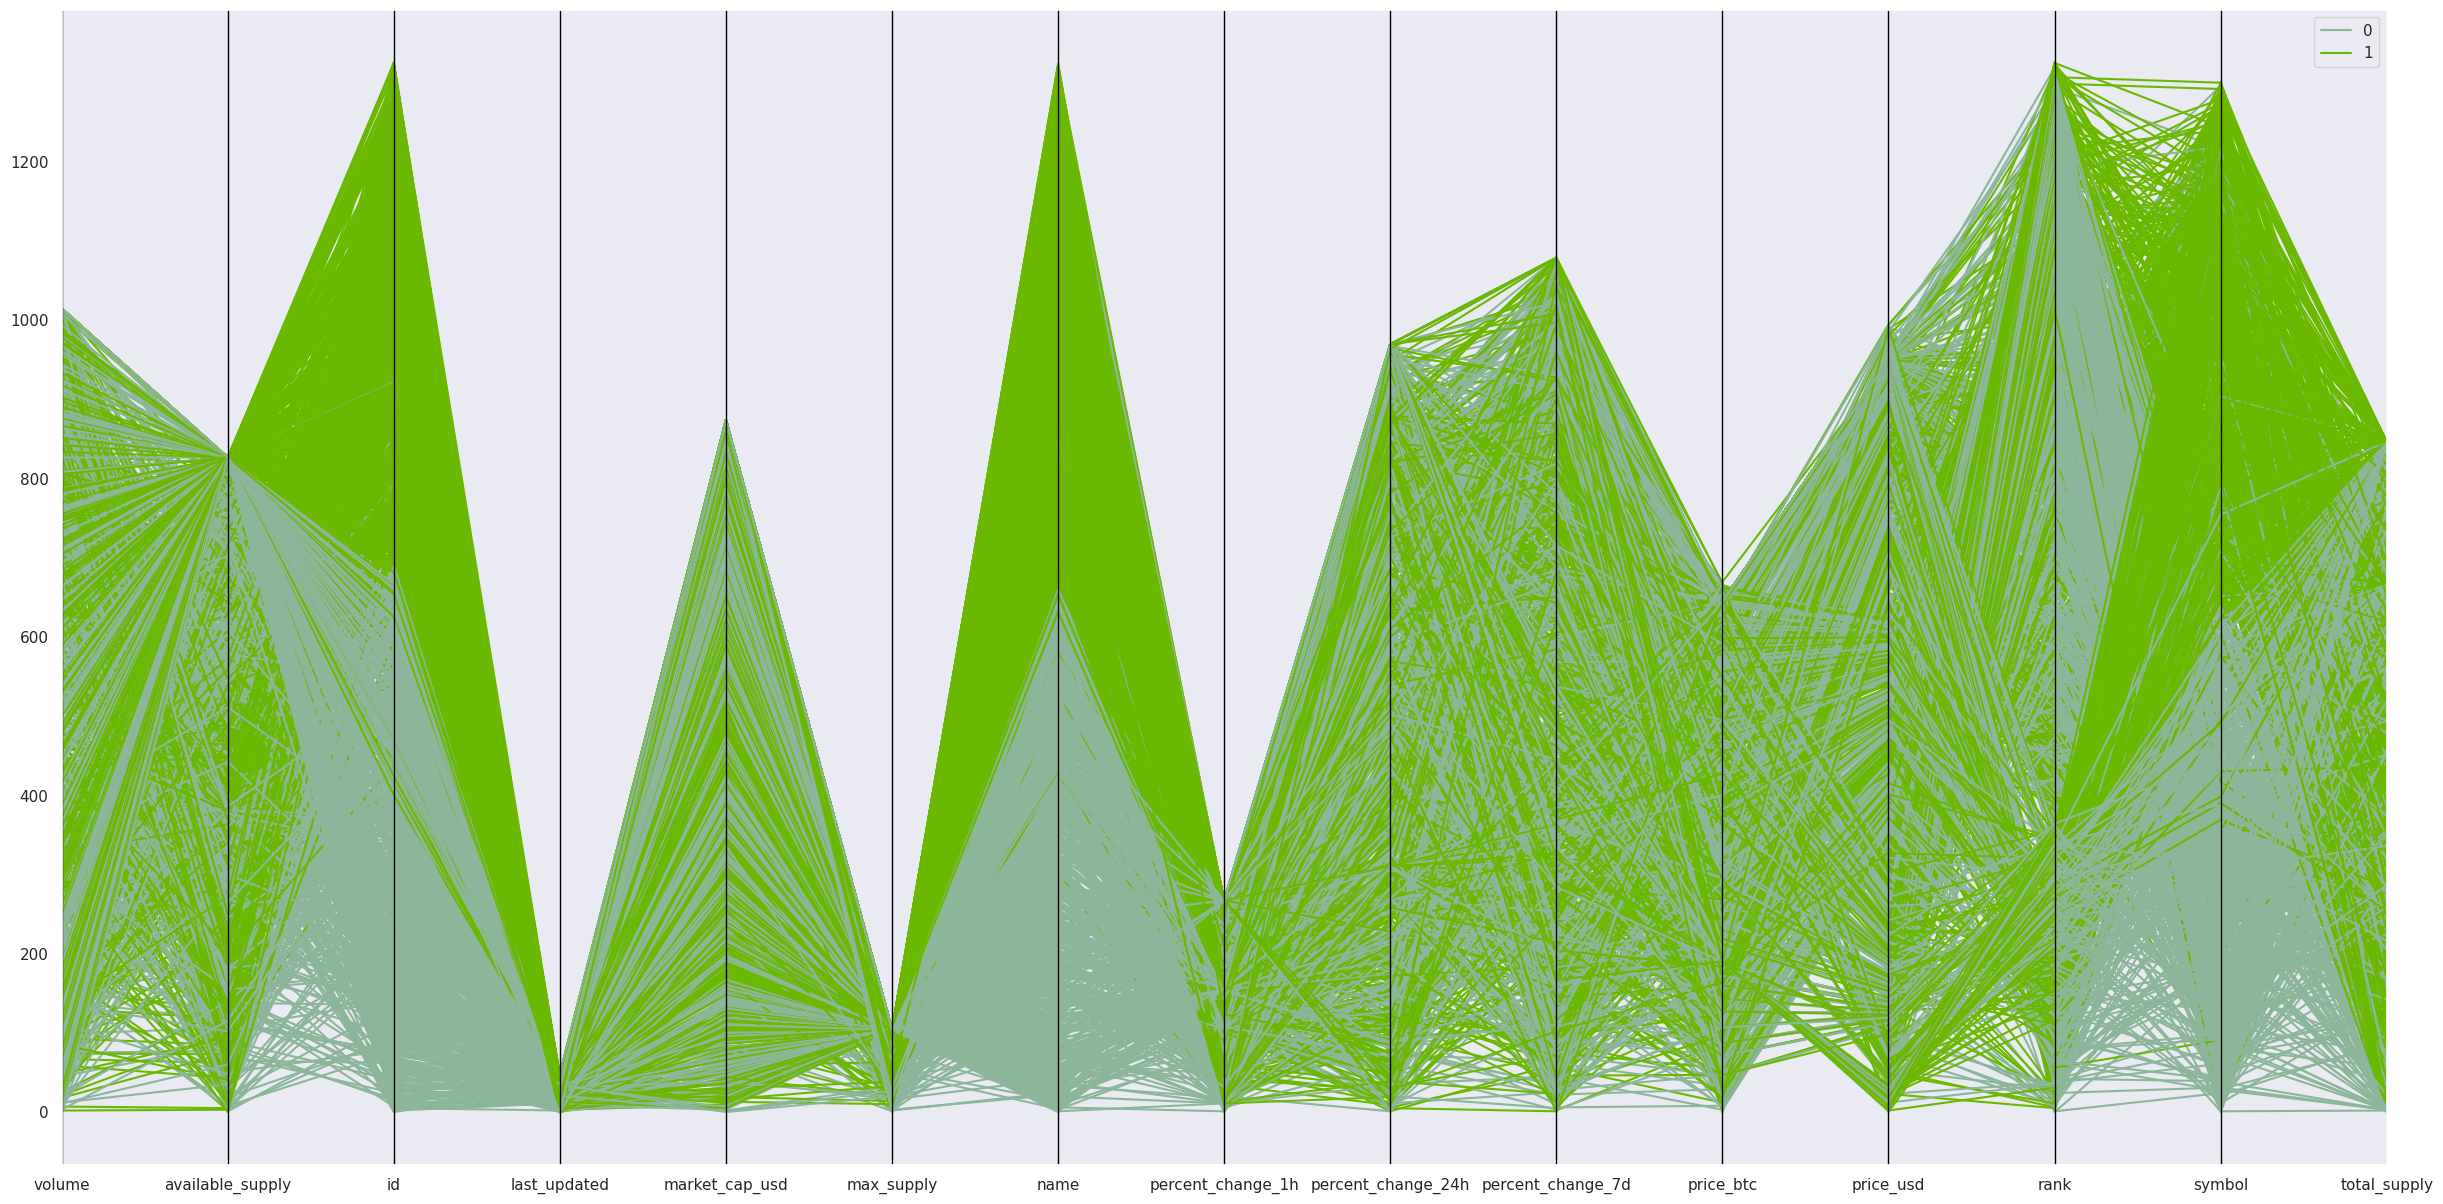

In [229]:
pd.plotting.parallel_coordinates(df, 'Pred')

In [230]:
df.head()

volume  available_supply    id  last_updated  market_cap_usd  max_supply  \
0     763               205   128            14             554          34   
1     763               802   455            13             554         104   
2     763               210   130            38             554          34   
3     763               381   664            31             554          20   
4     763               381  1005             1             554          20   

   name  percent_change_1h  percent_change_24h  percent_change_7d  price_btc  \
0   145                116                 903                538        644   
1   441                 16                 293                349        644   
2   147                222                 358                273        644   
3   609                105                 820                439        644   
4   976                157                 282                 79        175   

   price_usd  rank  symbol  total_supply  Pred  
0        949     0     181           196     0  
1        949   438     423           821     0  
2        949   549     107           200     0  
3        949   660     714           666     1  
4        741   771    1257           666     1

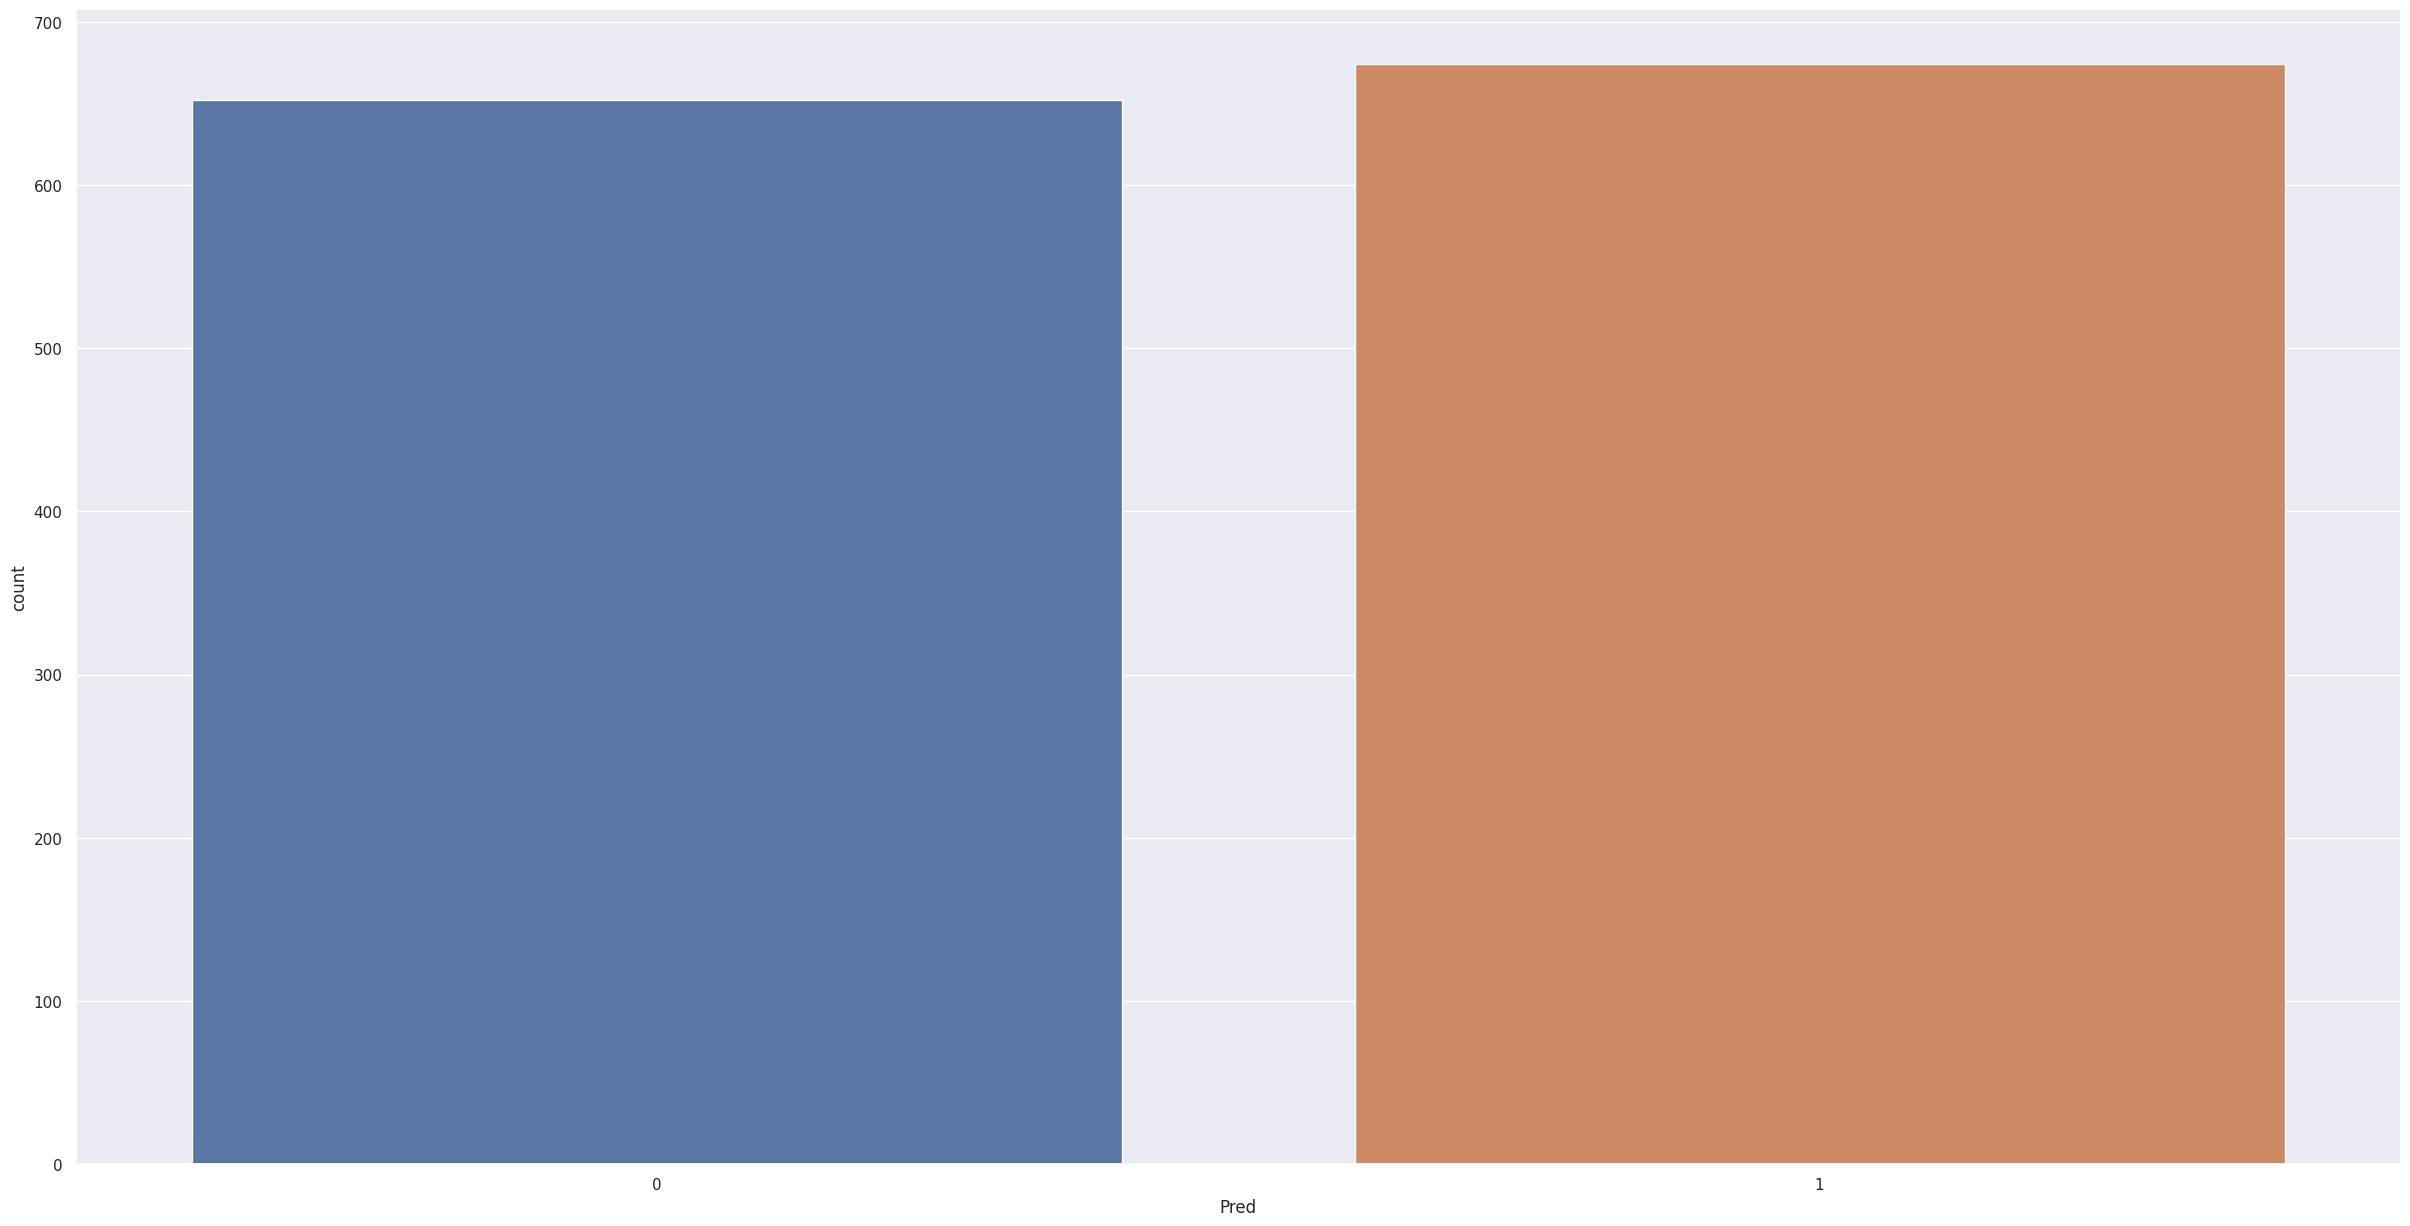

In [231]:
sns.countplot(x='Pred', data=df)
# Set the figure size
sns.set(rc={'figure.figsize':(10, 8)})

In [232]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
y_pred = kmeans.predict(df)
df['Clust'] = y_pred
df['Clust'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0    568
1    503
2    255
Name: Clust, dtype: int64

In [233]:
df.head()

volume  available_supply    id  last_updated  market_cap_usd  max_supply  \
0     763               205   128            14             554          34   
1     763               802   455            13             554         104   
2     763               210   130            38             554          34   
3     763               381   664            31             554          20   
4     763               381  1005             1             554          20   

   name  percent_change_1h  percent_change_24h  percent_change_7d  price_btc  \
0   145                116                 903                538        644   
1   441                 16                 293                349        644   
2   147                222                 358                273        644   
3   609                105                 820                439        644   
4   976                157                 282                 79        175   

   price_usd  rank  symbol  total_supply  Pred  Clust  
0        949     0     181           196     0      0  
1        949   438     423           821     0      0  
2        949   549     107           200     0      0  
3        949   660     714           666     1      1  
4        741   771    1257           666     1      1

<Axes: >

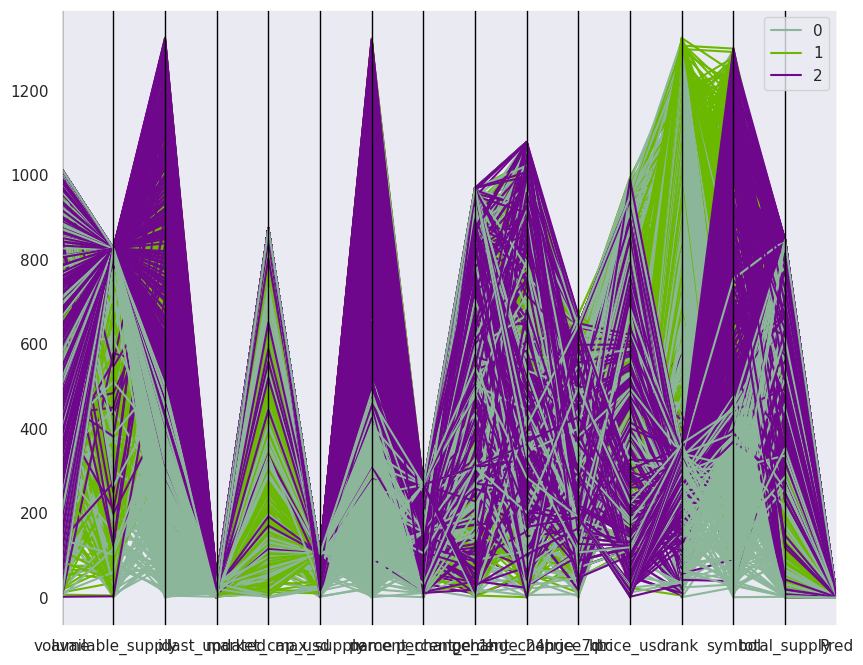

In [234]:
pd.plotting.parallel_coordinates(df, 'Clust')

In [235]:
df.head()

volume  available_supply    id  last_updated  market_cap_usd  max_supply  \
0     763               205   128            14             554          34   
1     763               802   455            13             554         104   
2     763               210   130            38             554          34   
3     763               381   664            31             554          20   
4     763               381  1005             1             554          20   

   name  percent_change_1h  percent_change_24h  percent_change_7d  price_btc  \
0   145                116                 903                538        644   
1   441                 16                 293                349        644   
2   147                222                 358                273        644   
3   609                105                 820                439        644   
4   976                157                 282                 79        175   

   price_usd  rank  symbol  total_supply  Pred  Clust  
0        949     0     181           196     0      0  
1        949   438     423           821     0      0  
2        949   549     107           200     0      0  
3        949   660     714           666     1      1  
4        741   771    1257           666     1      1

In [236]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
y_pred = kmeans.predict(df)
df['Cluster'] = y_pred
df['Cluster'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0    470
2    412
1    244
3    200
Name: Cluster, dtype: int64

In [237]:
df.head()

volume  available_supply    id  last_updated  market_cap_usd  max_supply  \
0     763               205   128            14             554          34   
1     763               802   455            13             554         104   
2     763               210   130            38             554          34   
3     763               381   664            31             554          20   
4     763               381  1005             1             554          20   

   name  percent_change_1h  percent_change_24h  percent_change_7d  price_btc  \
0   145                116                 903                538        644   
1   441                 16                 293                349        644   
2   147                222                 358                273        644   
3   609                105                 820                439        644   
4   976                157                 282                 79        175   

   price_usd  rank  symbol  total_supply  Pred  Clust  Cluster  
0        949     0     181           196     0      0        1  
1        949   438     423           821     0      0        1  
2        949   549     107           200     0      0        2  
3        949   660     714           666     1      1        0  
4        741   771    1257           666     1      1        0

<Axes: >

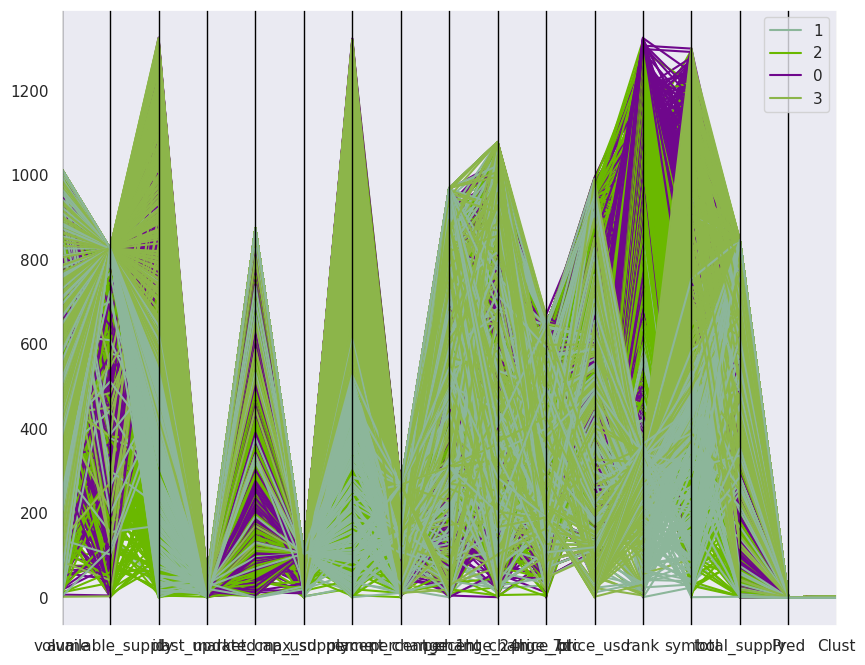

In [238]:
pd.plotting.parallel_coordinates(df, 'Cluster')

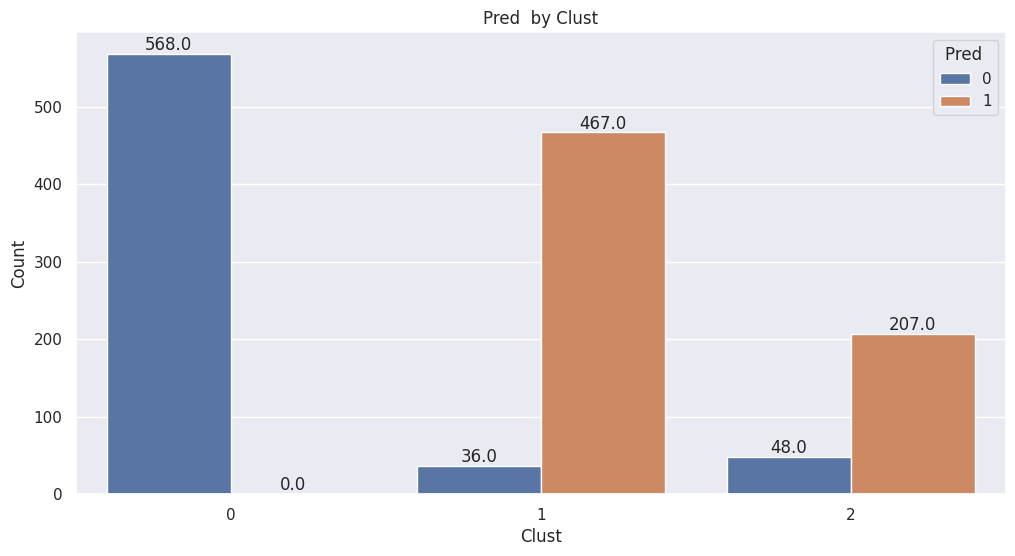

In [239]:
# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='Clust', hue='Pred', data=df)

# Add labels and title
plt.xlabel('Clust')
plt.ylabel('Count')
plt.title('Pred  by Clust')

# Annotate bars with the actual counts
ax = plt.gca()
for p in ax.patches:
    count = p.get_height()
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = count
    ax.text(x_pos, y_pos, f'{count}', ha='center', va='bottom')

plt.legend(title='Pred ')
plt.show()

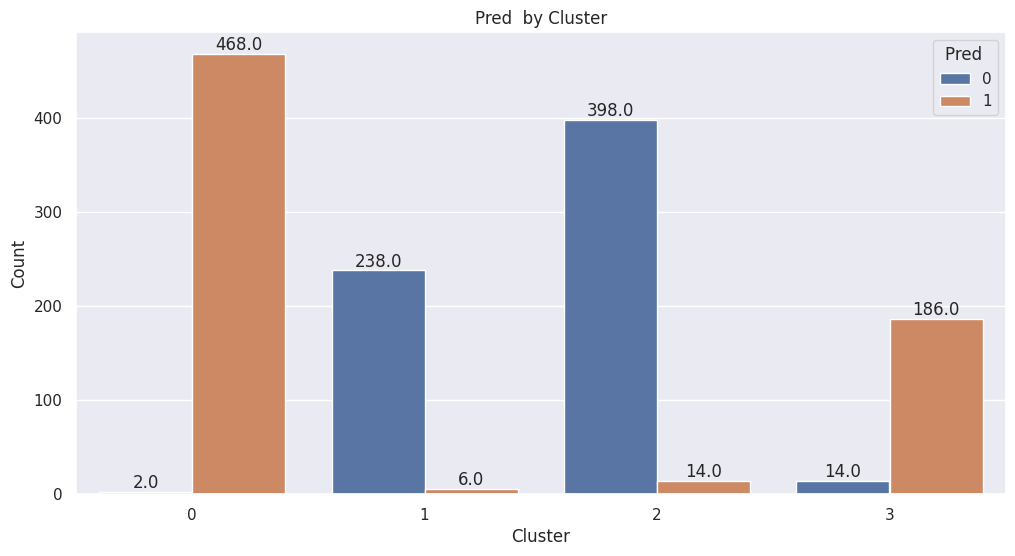

In [240]:
# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='Cluster', hue='Pred', data=df)

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Pred  by Cluster')

# Annotate bars with the actual counts
ax = plt.gca()
for p in ax.patches:
    count = p.get_height()
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = count
    ax.text(x_pos, y_pos, f'{count}', ha='center', va='bottom')

plt.legend(title='Pred ')
plt.show()

In [241]:
df = df.drop(['Clust', 'Cluster'], axis=1)
df.head()

volume  available_supply    id  last_updated  market_cap_usd  max_supply  \
0     763               205   128            14             554          34   
1     763               802   455            13             554         104   
2     763               210   130            38             554          34   
3     763               381   664            31             554          20   
4     763               381  1005             1             554          20   

   name  percent_change_1h  percent_change_24h  percent_change_7d  price_btc  \
0   145                116                 903                538        644   
1   441                 16                 293                349        644   
2   147                222                 358                273        644   
3   609                105                 820                439        644   
4   976                157                 282                 79        175   

   price_usd  rank  symbol  total_supply  Pred  
0        949     0     181           196     0  
1        949   438     423           821     0  
2        949   549     107           200     0  
3        949   660     714           666     1  
4        741   771    1257           666     1

In [242]:
df.Pred.value_counts()

1    674
0    652
Name: Pred, dtype: int64

In [243]:
x=df.drop('Pred',axis=1)
x

volume  available_supply    id  last_updated  market_cap_usd  \
0        763               205   128            14             554   
1        763               802   455            13             554   
2        763               210   130            38             554   
3        763               381   664            31             554   
4        763               381  1005             1             554   
...      ...               ...   ...           ...             ...   
1321    1014               826  1196             0             873   
1322    1014               826   112             0             873   
1323    1014               826   140             0             873   
1324    1014               826  1132             0             873   
1325    1014               826   483             0             873   

      max_supply  name  percent_change_1h  percent_change_24h  \
0             34   145                116                 903   
1            104   441                 16                 293   
2             34   147                222                 358   
3             20   609                105                 820   
4             20   976                157                 282   
...          ...   ...                ...                 ...   
1321         104  1162                267                 969   
1322         104   123                267                 544   
1323         104   158                 32                 310   
1324         104  1100                267                 831   
1325         104   469                267                 969   

      percent_change_7d  price_btc  price_usd  rank  symbol  total_supply  
0                   538        644        949     0     181           196  
1                   349        644        949   438     423           821  
2                   273        644        949   549     107           200  
3                   439        644        949   660     714           666  
4                    79        175        741   771    1257           666  
...                 ...        ...        ...   ...     ...           ...  
1321               1007        190          7   360    1109           846  
1322                284        190         15   361     123           846  
1323                201        497        223   362     104           353  
1324                167        190         17   363     985           666  
1325                335        107        119   364     444             2  

[1326 rows x 15 columns]

In [244]:
y=df['Pred']
y

0       0
1       0
2       0
3       1
4       1
       ..
1321    1
1322    0
1323    0
1324    1
1325    0
Name: Pred, Length: 1326, dtype: int32

In [245]:
print(x.shape)
print(y.shape)

(1326, 15)
(1326,)


In [246]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
a,b = sm.fit_resample(x,y)

In [247]:
print(a.shape)
print(b.shape)

(1348, 15)
(1348,)


In [248]:
x_train,x_test,y_train,y_test = train_test_split(a[:100],b[:100],random_state = 101, test_size = 0.3)

In [249]:
x_train

volume  available_supply    id  last_updated  market_cap_usd  max_supply  \
86     763               492   589            31             554           2   
14     763               381  1108             9             554         104   
23     763               817  1115            19             554         104   
26     763               381    60            18             554         101   
22     763                 5  1265            16             554         104   
..     ...               ...   ...           ...             ...         ...   
63     763               760   542            31             554           2   
70     763               655   537             7             554         104   
81     763               705   468            32             554         104   
11     763               381   816            19             554         104   
95     763               480  1200             6             554         104   

    name  percent_change_1h  percent_change_24h  percent_change_7d  price_btc  \
86   522                  8                 427                132        644   
14  1078                105                 820                886         10   
23  1084                212                 388                529        644   
26    63                199                 385                891        420   
22  1231                180                 323                628        644   
..   ...                ...                 ...                ...        ...   
63   530                 56                 444                334        644   
70   525                 52                 374                  5        644   
81   451                105                 340                229        644   
11   784                 53                  12                496        217   
95  1172                188                 334                548        644   

    price_usd  rank  symbol  total_supply  
86        949  1182     541             3  
14        639   383    1235           666  
23        949   483    1037           835  
26        862   516      66           666  
22        949   472    1180             3  
..        ...   ...     ...           ...  
63        949   927     496            78  
70        949  1005     493           679  
81        949  1127     425           303  
11        760   223    1225           666  
95        949  1282    1115           482  

[70 rows x 15 columns]

In [250]:
y_train

86    0
14    1
23    1
26    0
22    1
     ..
63    0
70    0
81    0
11    1
95    1
Name: Pred, Length: 70, dtype: int32

In [251]:
x_test

volume  available_supply    id  last_updated  market_cap_usd  max_supply  \
16     763               421   144            22             554          48   
1      763               802   455            13             554         104   
43     763               381   746             4             554         104   
67     763               381   356             2             554         104   
89     763               308   930             2             554          69   
21     763               381  1158             9             554         104   
97     763               381    13            35             554           3   
51     763               273   367            14             554         104   
6      763               593   723             2             554          94   
41     763               381  1057            11             554         104   
82     763               495    90            30             554         104   
25     763               513   613            34             554          94   
45     763                28  1152            30             554         104   
68     763                51   560            27             554         104   
37     763               305   415             3             554         104   
31     763               503  1239             3             554          94   
50     763               770   485            11             554         104   
32     763                50    79            12             554         104   
3      763               381   664            31             554          20   
48     763               381   931            42             554         104   
61     763               381   222            33             554         104   
47     763               381  1104            30             554         104   
54     763               629  1035            34             554         104   
57     763               120   699            37             554         104   
2      763               210   130            38             554          34   
13     763               659   817            18             554         104   
78     763               381     0            34             554         104   
58     763               657   219            21             554         104   
84     763               381   250            37             554         104   
91     250               622  1066            25             554           2   

    name  percent_change_1h  percent_change_24h  percent_change_7d  price_btc  \
16   134                150                 766                506        644   
1    441                 16                 293                349        644   
43   721                266                 773                512        452   
67   354                220                 341                478         70   
89   903                208                 900                844        354   
21  1128                121                   5                  1        596   
97    22                197                 622                735        210   
51   365                  6                  95                278        644   
6    699                 15                 505                714        644   
41  1032                256                 314                780        559   
82   103                171                 412                  8        644   
25   593                127                 461                121        644   
45  1122                201                 424                143        644   
68   544                158                 438                483        644   
37   409                221                 820                439        644   
31  1209                 40                 458                943        644   
50   471                140                 205                400        644   
32    78                 24                 416                47

In [252]:
y_test

16    0
1     0
43    1
67    0
89    1
21    1
97    0
51    0
6     1
41    1
82    0
25    0
45    1
68    0
37    0
31    1
50    0
32    0
3     1
48    1
61    0
47    1
54    1
57    1
2     0
13    1
78    0
58    0
84    0
91    1
Name: Pred, dtype: int32

# $Linear Discriminant Analysis$

In [253]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from tabulate import tabulate
import time

# Initialize the Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
start_time_lda = time.time()
lda.fit(x_train, y_train)
y_pred_lda = lda.predict(x_test)
end_time_lda = time.time()

# Calculate evaluation metrics
acc_lda = accuracy_score(y_test, y_pred_lda) * 100
pre_lda = precision_score(y_test, y_pred_lda) * 100
recall_lda = recall_score(y_test, y_pred_lda) * 100
f1_lda = f1_score(y_test, y_pred_lda) * 100
roc_auc_lda = roc_auc_score(y_test, lda.predict_proba(x_test)[:, 1]) * 100
report_lda = classification_report(y_test, y_pred_lda)

# Calculate time taken for training and prediction
execution_time_lda = end_time_lda - start_time_lda

# Store results in a dictionary
results_lda = {
    'Accuracy': acc_lda,
    'Precision': pre_lda,
    'Recall': recall_lda,
    'F1_score': f1_lda,
    'ROC_AUC': roc_auc_lda,
    'Time Taken (seconds)': execution_time_lda
}

# Display results in a table
print("Linear Discriminant Analysis Results:")
print(tabulate(results_lda.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification report:\n', report_lda)


param_grid_lda = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto']
}

# Grid search with LDA
grid_search_lda = GridSearchCV(estimator=LinearDiscriminantAnalysis(), param_grid=param_grid_lda, cv=3, verbose=2, scoring='accuracy')
grid_search_lda.fit(x_train, y_train)

# Get the best parameters and retrain the model
best_params_lda = grid_search_lda.best_params_
lda_best = LinearDiscriminantAnalysis(**best_params_lda)
lda_best.fit(x_train, y_train)

# Perform prediction and evaluation using the best model
y_pred_lda_best = lda_best.predict(x_test)
acc_lda_best = accuracy_score(y_test, y_pred_lda_best) * 100
pre_lda_best = precision_score(y_test, y_pred_lda_best) * 100
recall_lda_best = recall_score(y_test, y_pred_lda_best) * 100
f1_lda_best = f1_score(y_test, y_pred_lda_best) * 100

# Note: LDA does not have a predict_proba method when solver is 'svd'
# Only compute ROC AUC score if solver is not 'svd'
if best_params_lda['solver'] != 'svd':
    roc_auc_lda_best = roc_auc_score(y_test, lda_best.predict_proba(x_test)[:, 1]) * 100
else:
    roc_auc_lda_best = "Not applicable for svd solver"

report_lda_best = classification_report(y_test, y_pred_lda_best)

# Store results in a dictionary
results_lda_best = {
    'Accuracy': acc_lda_best,
    'Precision': pre_lda_best,
    'Recall': recall_lda_best,
    'F1_score': f1_lda_best,
    'ROC_AUC': roc_auc_lda_best
}

# Display results for the tuned model
print("\nk-NN Classifier Results (After Hyperparameter Tuning):")
print(tabulate(results_lda_best.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification report for the tuned model:\n', results_lda_best)

Linear Discriminant Analysis Results:
+----------------------+-------------+
| Metrics              |       Value |
+======================+=============+
| Accuracy             | 93.3333     |
+----------------------+-------------+
| Precision            | 92.8571     |
+----------------------+-------------+
| Recall               | 92.8571     |
+----------------------+-------------+
| F1_score             | 92.8571     |
+----------------------+-------------+
| ROC_AUC              | 98.6607     |
+----------------------+-------------+
| Time Taken (seconds) |  0.00886345 |
+----------------------+-------------+

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Fitting 3 folds for each 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


6 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 631, in fit
    self._solve_eigen(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 463, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "/usr/local/lib/python3.10/dist-package

Here is the Confusion Matrix for LDA: 

[[15  1]
 [ 1 13]]
_________________________________________________________


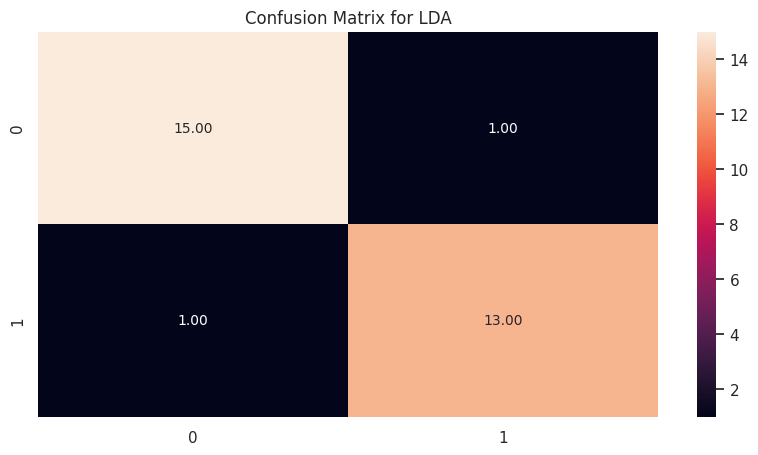

_________________________________________________________
Here is the Confusion Matrix for Best LDA: 

[[15  1]
 [ 2 12]]
_________________________________________________________


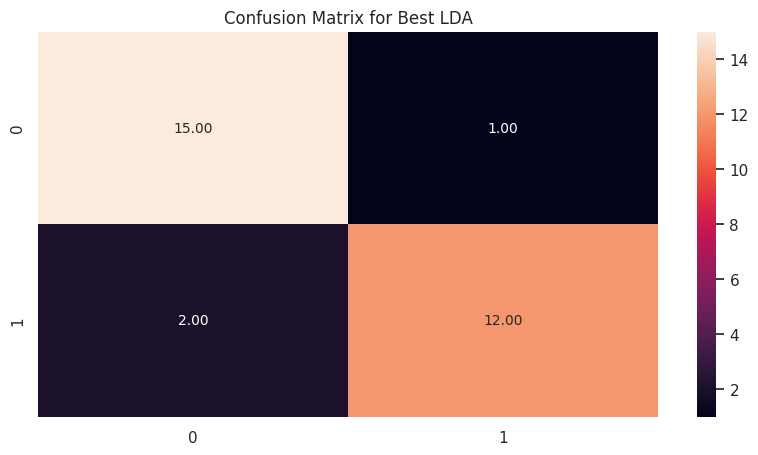

_________________________________________________________


In [254]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    """
    Print and plot confusion matrix.

    Parameters:
    - y_true: true labels
    - y_pred: predicted labels
    - title: title for the plot
    """
    matrix = confusion_matrix(y_true, y_pred)
    print(f'Here is the {title}: \n\n{matrix}')
    print('_________________________________________________________')

    plt.figure(figsize=(10,5))
    sns.heatmap(matrix, annot=True, fmt='0.2f', annot_kws={'size':10})
    plt.title(title)
    plt.show()
    print('_________________________________________________________')

# For the regular LDA model
plot_confusion_matrix(y_test, y_pred_lda, 'Confusion Matrix for LDA')

# For the best LDA model from grid search
plot_confusion_matrix(y_test, y_pred_lda_best, 'Confusion Matrix for Best LDA')


_________________________________________________________


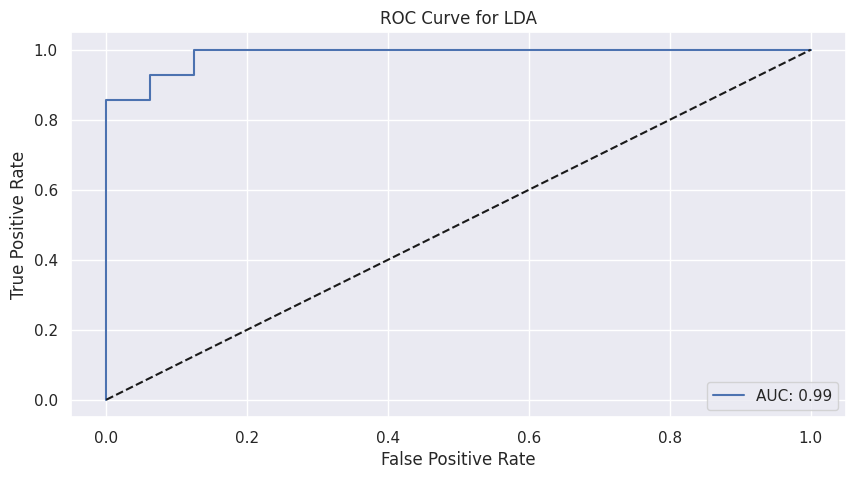

_________________________________________________________


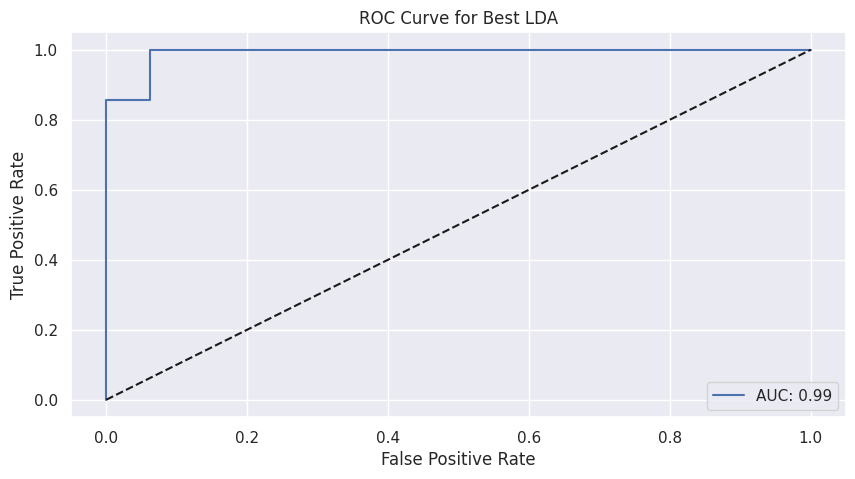

In [255]:
from sklearn.metrics import roc_curve

def plot_roc_curve(model, x, y, title):
    """
    Plot ROC curve for the given model and data.

    Parameters:
    - model: trained model
    - x: features
    - y: true labels
    - title: title for the plot
    """
    fpr, tpr, _ = roc_curve(y, model.predict_proba(x)[:, 1])
    auc_score = roc_auc_score(y, model.predict_proba(x)[:, 1])

    plt.figure(figsize=(10,5))
    plt.plot(fpr, tpr, label=f'AUC: {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

print('_________________________________________________________')
plot_roc_curve(lda, x_test, y_test, 'ROC Curve for LDA')

print('_________________________________________________________')
plot_roc_curve(lda_best, x_test, y_test, 'ROC Curve for Best LDA')

# *MLP Classifier*

In [256]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the MLP Classifier
mlp = MLPClassifier()
start_time_mlp = time.time()
mlp.fit(x_train, y_train)
y_pred_mlp = mlp.predict(x_test)
end_time_mlp = time.time()

# Calculate evaluation metrics
acc_mlp = accuracy_score(y_test, y_pred_mlp) * 100
pre_mlp = precision_score(y_test, y_pred_mlp) * 100
recall_mlp = recall_score(y_test, y_pred_mlp) * 100
f1_mlp = f1_score(y_test, y_pred_mlp) * 100
roc_auc_mlp = roc_auc_score(y_test, mlp.predict_proba(x_test)[:, 1]) * 100
report_mlp = classification_report(y_test, y_pred_mlp)

# Calculate time taken for training and prediction
execution_time_mlp = end_time_mlp - start_time_mlp

# Store results in a dictionary
results_mlp = {
    'Accuracy': acc_mlp,
    'Precision': pre_mlp,
    'Recall': recall_mlp,
    'F1_score': f1_mlp,
    'ROC_AUC': roc_auc_mlp,
    'Time Taken (seconds)': execution_time_mlp
}

# Display results in a table
print("MLP Classifier Results:")
print(tabulate(results_mlp.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification report:\n', report_mlp)

# Parameters for grid search with MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Grid search with MLP
grid_search_mlp = GridSearchCV(estimator=MLPClassifier(), param_grid=param_grid_mlp, cv=3, verbose=2, scoring='accuracy')
grid_search_mlp.fit(x_train, y_train)

# Get the best parameters and retrain the model
best_params_mlp = grid_search_mlp.best_params_
mlp_best = MLPClassifier(**best_params_mlp)
mlp_best.fit(x_train, y_train)

# Perform prediction and evaluation using the best model
y_pred_mlp_best = mlp_best.predict(x_test)
acc_mlp_best = accuracy_score(y_test, y_pred_mlp_best) * 100
pre_mlp_best = precision_score(y_test, y_pred_mlp_best) * 100
recall_mlp_best = recall_score(y_test, y_pred_mlp_best) * 100
f1_mlp_best = f1_score(y_test, y_pred_mlp_best) * 100
roc_auc_mlp_best = roc_auc_score(y_test, mlp_best.predict_proba(x_test)[:, 1]) * 100
report_mlp_best = classification_report(y_test, y_pred_mlp_best)

# Store results in a dictionary for the tuned model
results_mlp_best = {
    'Accuracy': acc_mlp_best,
    'Precision': pre_mlp_best,
    'Recall': recall_mlp_best,
    'F1_score': f1_mlp_best,
    'ROC_AUC': roc_auc_mlp_best
}

# Display results for the tuned model
print("\nMLP Classifier Results (After Hyperparameter Tuning):")
print(tabulate(results_mlp_best.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification report for the tuned model:\n', report_mlp_best)

MLP Classifier Results:
+----------------------+-----------+
| Metrics              |     Value |
+======================+===========+
| Accuracy             | 86.6667   |
+----------------------+-----------+
| Precision            | 81.25     |
+----------------------+-----------+
| Recall               | 92.8571   |
+----------------------+-----------+
| F1_score             | 86.6667   |
+----------------------+-----------+
| ROC_AUC              | 92.4107   |
+----------------------+-----------+
| Time Taken (seconds) |  0.182035 |
+----------------------+-----------+

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.81      0.93      0.87        14

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), solver=sgd; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), solver=sgd; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), solver=adam; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), solver=adam; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), solver=adam; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), solver=sgd; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), solver=sgd; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), solver=sgd; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), solver=adam; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), solver=adam; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), solver=adam; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), solver=sgd; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), solver=sgd; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), solver=sgd; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), solver=adam; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), solver=adam; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), solver=adam; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), solver=sgd; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), solver=sgd; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), solver=sgd; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), solver=adam; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), solver=adam; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), solver=adam; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), solver=sgd; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), solver=sgd; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), solver=sgd; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), solver=adam; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), solver=adam; total time=   0.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), solver=adam; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), solver=sgd; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), solver=sgd; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), solver=adam; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), solver=adam; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), solver=adam; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), solver=sgd; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), solver=sgd; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), solver=sgd; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), solver=adam; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), solver=adam; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), solver=adam; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), solver=sgd; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), solver=sgd; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), solver=sgd; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), solver=adam; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), solver=adam; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), solver=adam; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), solver=sgd; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), solver=sgd; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), solver=adam; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), solver=adam; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), solver=sgd; total time=   0.1s
[CV] END activation=re

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




MLP Classifier Results (After Hyperparameter Tuning):
+-----------+---------+
| Metrics   |   Value |
+===========+=========+
| Accuracy  | 90      |
+-----------+---------+
| Precision | 86.6667 |
+-----------+---------+
| Recall    | 92.8571 |
+-----------+---------+
| F1_score  | 89.6552 |
+-----------+---------+
| ROC_AUC   | 97.7679 |
+-----------+---------+

Classification report for the tuned model:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.87      0.93      0.90        14

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Here is the Confusion Matrix for MLP: 

[[13  3]
 [ 1 13]]
_________________________________________________________


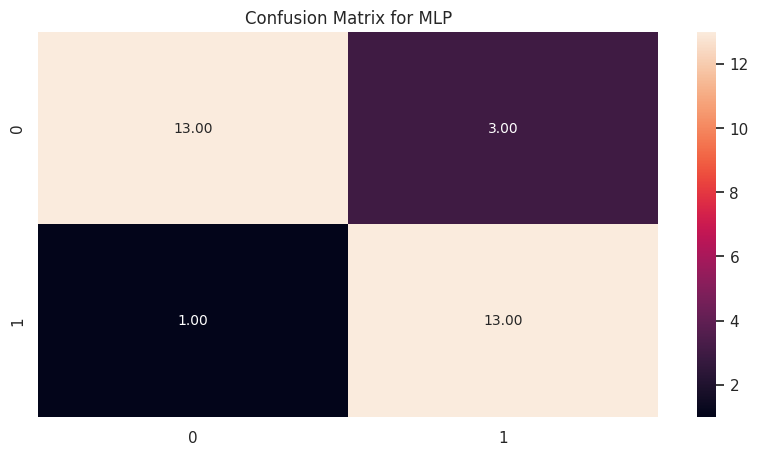

_________________________________________________________
Here is the Confusion Matrix for Best MLP: 

[[14  2]
 [ 1 13]]
_________________________________________________________


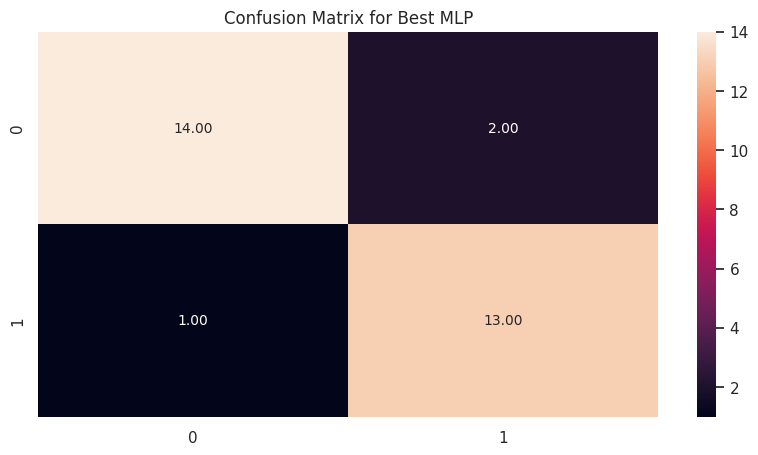

_________________________________________________________


In [257]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    """
    Print and plot confusion matrix.

    Parameters:
    - y_true: true labels
    - y_pred: predicted labels
    - title: title for the plot
    """
    matrix = confusion_matrix(y_true, y_pred)
    print(f'Here is the {title}: \n\n{matrix}')
    print('_________________________________________________________')

    plt.figure(figsize=(10,5))
    sns.heatmap(matrix, annot=True, fmt='0.2f', annot_kws={'size':10})
    plt.title(title)
    plt.show()
    print('_________________________________________________________')

# For the regular LDA model
plot_confusion_matrix(y_test, y_pred_mlp, 'Confusion Matrix for MLP')

# For the best LDA model from grid search
plot_confusion_matrix(y_test, y_pred_mlp_best, 'Confusion Matrix for Best MLP')


_________________________________________________________


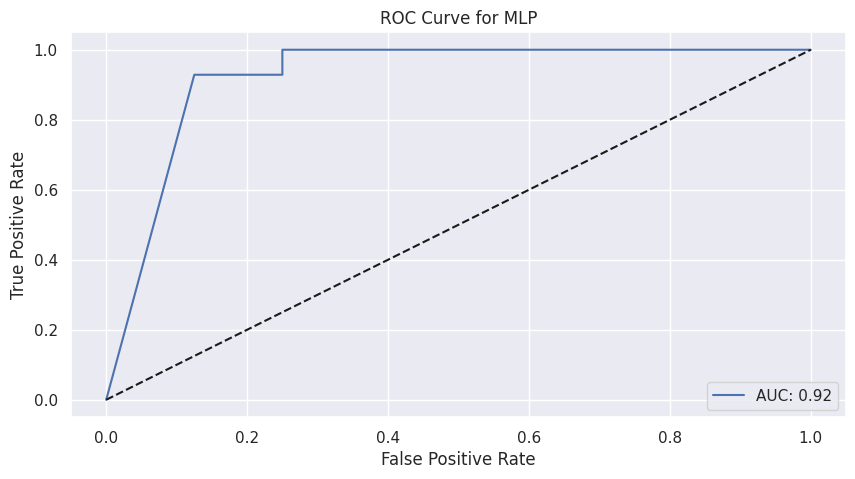

_________________________________________________________


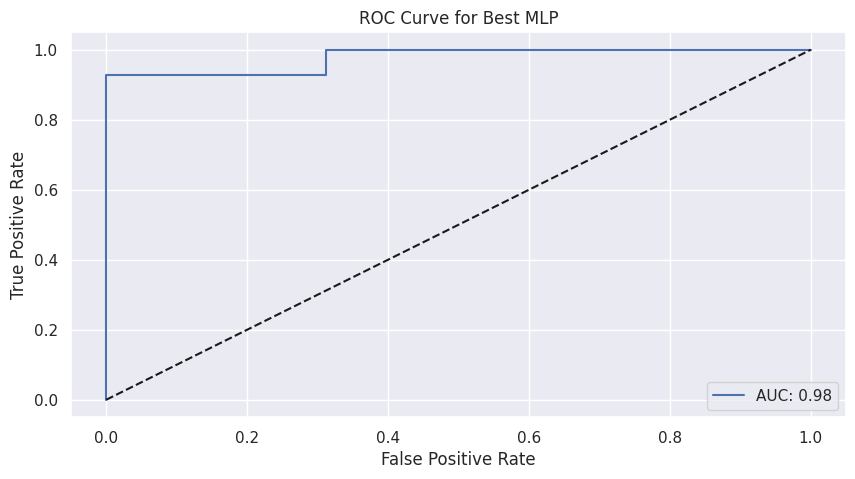

In [258]:
from sklearn.metrics import roc_curve

def plot_roc_curve(model, x, y, title):
    """
    Plot ROC curve for the given model and data.

    Parameters:
    - model: trained model
    - x: features
    - y: true labels
    - title: title for the plot
    """
    fpr, tpr, _ = roc_curve(y, model.predict_proba(x)[:, 1])
    auc_score = roc_auc_score(y, model.predict_proba(x)[:, 1])

    plt.figure(figsize=(10,5))
    plt.plot(fpr, tpr, label=f'AUC: {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

print('_________________________________________________________')
plot_roc_curve(mlp, x_test, y_test, 'ROC Curve for MLP')

print('_________________________________________________________')
plot_roc_curve(mlp_best, x_test, y_test, 'ROC Curve for Best MLP')

# *ExtraTreesClassifier*

In [259]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the ExtraTrees Classifier
etc = ExtraTreesClassifier()
start_time_etc = time.time()
etc.fit(x_train, y_train)
y_pred_etc = etc.predict(x_test)
end_time_etc = time.time()

# Calculate evaluation metrics
acc_etc = accuracy_score(y_test, y_pred_etc) * 100
pre_etc = precision_score(y_test, y_pred_etc) * 100
recall_etc = recall_score(y_test, y_pred_etc) * 100
f1_etc = f1_score(y_test, y_pred_etc) * 100
roc_auc_etc = roc_auc_score(y_test, etc.predict_proba(x_test)[:, 1]) * 100
report_etc = classification_report(y_test, y_pred_etc)

# Calculate time taken for training and prediction
execution_time_etc = end_time_etc - start_time_etc

# Store results in a dictionary
results_etc = {
    'Accuracy': acc_etc,
    'Precision': pre_etc,
    'Recall': recall_etc,
    'F1_score': f1_etc,
    'ROC_AUC': roc_auc_etc,
    'Time Taken (seconds)': execution_time_etc
}

# Display results in a table
print("ExtraTrees Classifier Results:")
print(tabulate(results_etc.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification report:\n', report_etc)

# Parameters for grid search with ExtraTrees
param_grid_etc = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with ExtraTrees
grid_search_etc = GridSearchCV(estimator=ExtraTreesClassifier(), param_grid=param_grid_etc, cv=3, verbose=2, scoring='accuracy')
grid_search_etc.fit(x_train, y_train)

# Get the best parameters and retrain the model
best_params_etc = grid_search_etc.best_params_
etc_best = ExtraTreesClassifier(**best_params_etc)
etc_best.fit(x_train, y_train)

# Perform prediction and evaluation using the best model
y_pred_etc_best = etc_best.predict(x_test)
acc_etc_best = accuracy_score(y_test, y_pred_etc_best) * 100
pre_etc_best = precision_score(y_test, y_pred_etc_best) * 100
recall_etc_best = recall_score(y_test, y_pred_etc_best) * 100
f1_etc_best = f1_score(y_test, y_pred_etc_best) * 100
roc_auc_etc_best = roc_auc_score(y_test, etc_best.predict_proba(x_test)[:, 1]) * 100
report_etc_best = classification_report(y_test, y_pred_etc_best)

# Store results in a dictionary for the tuned model
results_etc_best = {
    'Accuracy': acc_etc_best,
    'Precision': pre_etc_best,
    'Recall': recall_etc_best,
    'F1_score': f1_etc_best,
    'ROC_AUC': roc_auc_etc_best
}

# Display results for the tuned model
print("\nExtraTrees Classifier Results (After Hyperparameter Tuning):")
print(tabulate(results_etc_best.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification report for the tuned model:\n', report_etc_best)

ExtraTrees Classifier Results:
+----------------------+------------+
| Metrics              |      Value |
+======================+============+
| Accuracy             | 100        |
+----------------------+------------+
| Precision            | 100        |
+----------------------+------------+
| Recall               | 100        |
+----------------------+------------+
| F1_score             | 100        |
+----------------------+------------+
| ROC_AUC              | 100        |
+----------------------+------------+
| Time Taken (seconds) |   0.211672 |
+----------------------+------------+

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Fitting 3 folds for each of 108 candidates, tot

Here is the Confusion Matrix for ET: 

[[16  0]
 [ 0 14]]
_________________________________________________________


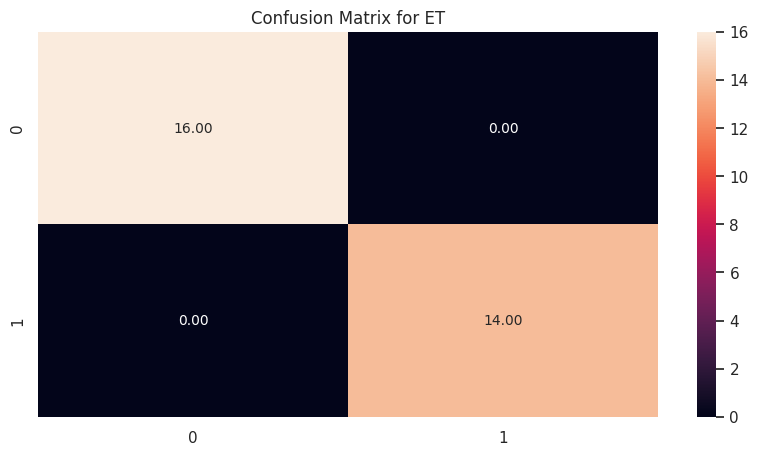

_________________________________________________________
Here is the Confusion Matrix for Best ET: 

[[16  0]
 [ 0 14]]
_________________________________________________________


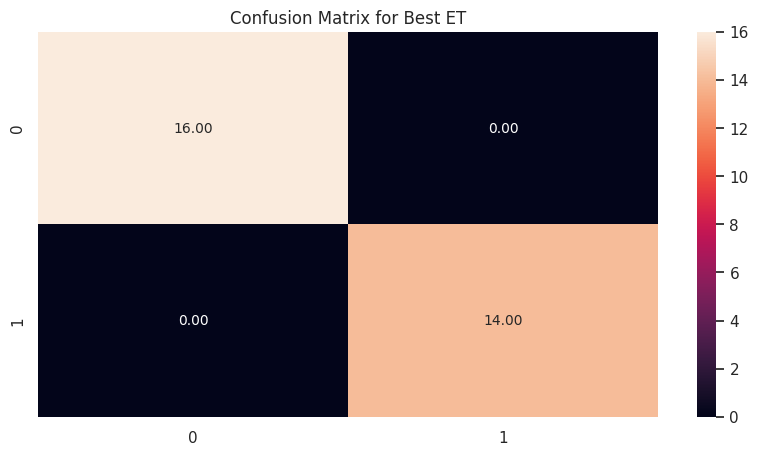

_________________________________________________________


In [260]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    """
    Print and plot confusion matrix.

    Parameters:
    - y_true: true labels
    - y_pred: predicted labels
    - title: title for the plot
    """
    matrix = confusion_matrix(y_true, y_pred)
    print(f'Here is the {title}: \n\n{matrix}')
    print('_________________________________________________________')

    plt.figure(figsize=(10,5))
    sns.heatmap(matrix, annot=True, fmt='0.2f', annot_kws={'size':10})
    plt.title(title)
    plt.show()
    print('_________________________________________________________')

# For the regular LDA model
plot_confusion_matrix(y_test, y_pred_etc, 'Confusion Matrix for ET')

# For the best LDA model from grid search
plot_confusion_matrix(y_test, y_pred_etc_best, 'Confusion Matrix for Best ET')

_________________________________________________________


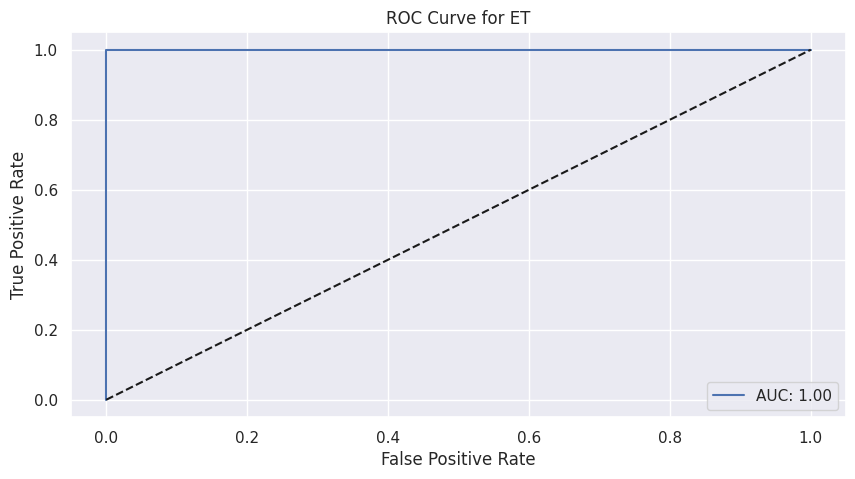

_________________________________________________________


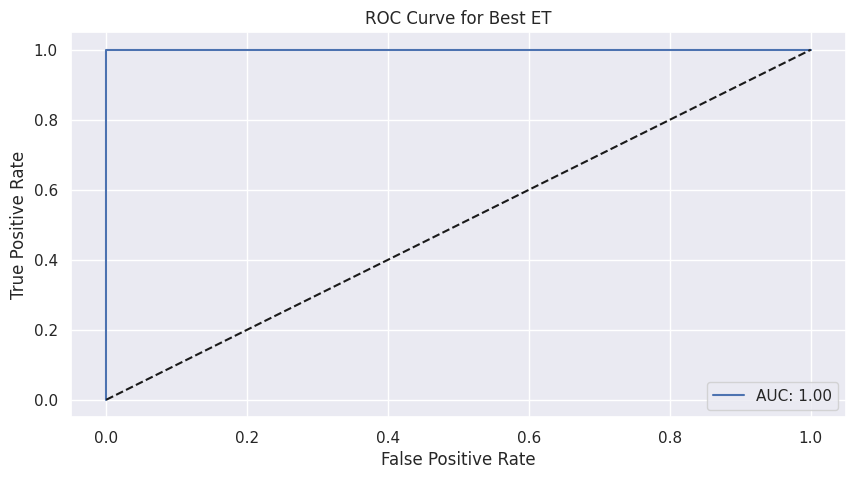

In [261]:
from sklearn.metrics import roc_curve

def plot_roc_curve(model, x, y, title):
    """
    Plot ROC curve for the given model and data.

    Parameters:
    - model: trained model
    - x: features
    - y: true labels
    - title: title for the plot
    """
    fpr, tpr, _ = roc_curve(y, model.predict_proba(x)[:, 1])
    auc_score = roc_auc_score(y, model.predict_proba(x)[:, 1])

    plt.figure(figsize=(10,5))
    plt.plot(fpr, tpr, label=f'AUC: {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

print('_________________________________________________________')
plot_roc_curve(etc, x_test, y_test, 'ROC Curve for ET')

print('_________________________________________________________')
plot_roc_curve(etc_best, x_test, y_test, 'ROC Curve for Best ET')

# $Hybrid Model$

In [262]:
from sklearn.ensemble import VotingClassifier

# Initialize the classifiers
mlp = MLPClassifier()
lda = LinearDiscriminantAnalysis()

# Create the ensemble model
hybrid = VotingClassifier(estimators=[('mlp', mlp), ('lda', lda)], voting='soft')
start_time_hybrid = time.time()
hybrid.fit(x_train, y_train)
y_pred_hybrid = hybrid.predict(x_test)
end_time_hybrid = time.time()

# Calculate evaluation metrics
acc_hybrid = accuracy_score(y_test, y_pred_hybrid) * 100
pre_hybrid = precision_score(y_test, y_pred_hybrid) * 100
recall_hybrid = recall_score(y_test, y_pred_hybrid) * 100
f1_hybrid = f1_score(y_test, y_pred_hybrid) * 100
roc_auc_hybrid = roc_auc_score(y_test, hybrid.predict_proba(x_test)[:, 1]) * 100
report_hybrid = classification_report(y_test, y_pred_hybrid)

# Calculate time taken for training and prediction
execution_time_hybrid = end_time_hybrid - start_time_hybrid

# Store results in a dictionary
results_hybrid = {
    'Accuracy': acc_hybrid,
    'Precision': pre_hybrid,
    'Recall': recall_hybrid,
    'F1_score': f1_hybrid,
    'ROC_AUC': roc_auc_hybrid,
    'Time Taken (seconds)': execution_time_hybrid
}

# Display results in a table
print("Hybrid Model Results:")
print(tabulate(results_hybrid.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification report:\n', report_hybrid)

# Define base models
mlp = MLPClassifier()
lda = LinearDiscriminantAnalysis()
hybrid = VotingClassifier(estimators=[('mlp', mlp), ('lda', lda)], voting='soft')

# Define hyperparameters for the grid search
param_grid_hybrid = {
    'mlp__hidden_layer_sizes': [(50,), (100,)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.0001, 0.001],
    'lda__solver': ['svd', 'lsqr'],
    'lda__shrinkage': [None, 'auto']
}

# Grid search with the hybrid model
grid_search_hybrid = GridSearchCV(estimator=hybrid, param_grid=param_grid_hybrid, cv=3, verbose=2, scoring='accuracy')
grid_search_hybrid.fit(x_train, y_train)

# Extract the best hyperparameters
best_params_hybrid = grid_search_hybrid.best_params_

# Now, you can retrain your hybrid model using these hyperparameters.
# Note: You don't need to reinitialize the VotingClassifier with the best parameters.
# Instead, use the best estimator from the grid search.

hybrid_best = grid_search_hybrid.best_estimator_

# Perform prediction and evaluation using the best model
y_pred_hybrid_best = hybrid_best.predict(x_test)
acc_hybrid_best = accuracy_score(y_test, y_pred_hybrid_best) * 100
pre_hybrid_best = precision_score(y_test, y_pred_hybrid_best) * 100
recall_hybrid_best = recall_score(y_test, y_pred_hybrid_best) * 100
f1_hybrid_best = f1_score(y_test, y_pred_hybrid_best) * 100
roc_auc_hybrid_best = roc_auc_score(y_test, hybrid_best.predict_proba(x_test)[:, 1]) * 100
report_hybrid_best = classification_report(y_test, y_pred_hybrid_best)

# Store results in a dictionary for the tuned model
results_hybrid_best = {
    'Accuracy': acc_hybrid_best,
    'Precision': pre_hybrid_best,
    'Recall': recall_hybrid_best,
    'F1_score': f1_hybrid_best,
    'ROC_AUC': roc_auc_hybrid_best
}

# Display results for the tuned model
print("\nHybrid Model Results (After Hyperparameter Tuning):")
print(tabulate(results_hybrid_best.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification report for the tuned model:\n', report_hybrid_best)

Hybrid Model Results:
+----------------------+-----------+
| Metrics              |     Value |
+======================+===========+
| Accuracy             | 90        |
+----------------------+-----------+
| Precision            | 92.3077   |
+----------------------+-----------+
| Recall               | 85.7143   |
+----------------------+-----------+
| F1_score             | 88.8889   |
+----------------------+-----------+
| ROC_AUC              | 98.2143   |
+----------------------+-----------+
| Time Taken (seconds) |  0.118366 |
+----------------------+-----------+

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.92      0.86      0.89        14

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Fitting 3 folds for each of 64 candidates, totalling 192 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.2s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.2s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.2s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.2s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.2s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.1s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.2s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.2s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.1s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.0s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.0s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.1s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.1s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=relu

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.1s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.2s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.2s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.2s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.2s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.2s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.1s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.1s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.1s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.1s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.2s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.2s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.2s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.0s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.0s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.0s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.0s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.0s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.1s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.1s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.1s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.2s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.2s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.2s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.2s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.1s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.1s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.1s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.2s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.3s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.2s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.1s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.0s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.0s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.1s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.1s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=relu

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.1s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.0s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.0s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.1s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.1s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.0s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=relu, mlp

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.2s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.2s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.1s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.2s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.2s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.2s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.1s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.2s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.2s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   0.2s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.0s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.0s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.0s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.0s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.0s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activati

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


48 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py", line 346, in fit
    return super().fit(X, transformed_y, sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py", line 81, in fit
    self.estimators_ = Parallel(n_jobs=self.n_jobs)(
  File "/usr/loc

Here is the Confusion Matrix for Hybrid Model: 

[[15  1]
 [ 2 12]]
_________________________________________________________


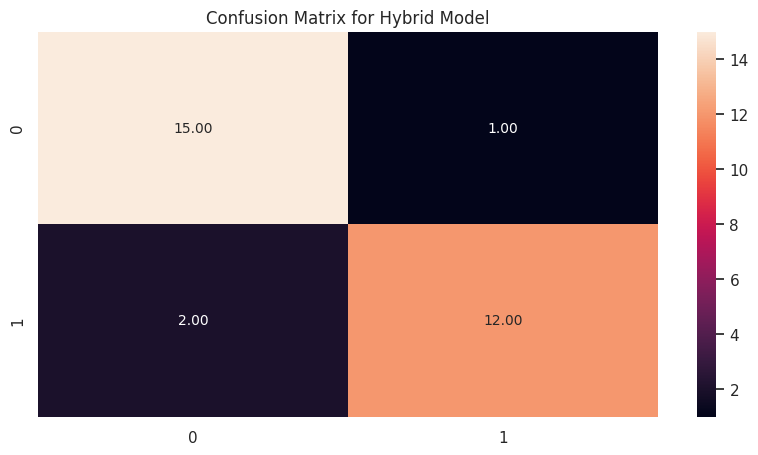

_________________________________________________________
Here is the Confusion Matrix for Best Hybrid Model: 

[[15  1]
 [ 2 12]]
_________________________________________________________


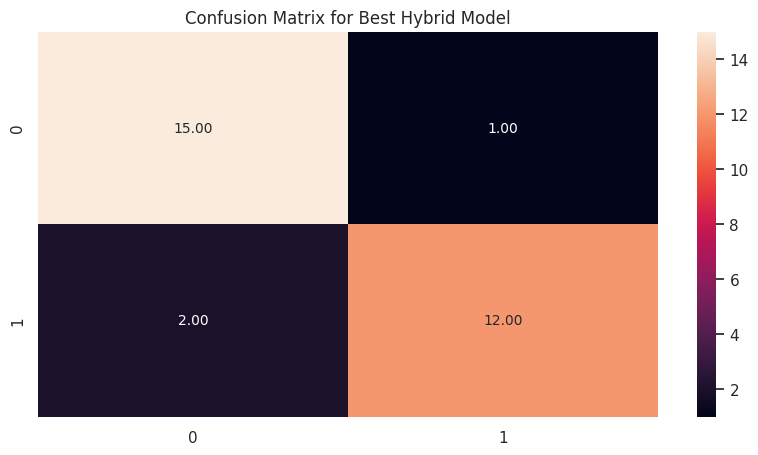

_________________________________________________________


In [263]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    """
    Print and plot confusion matrix.

    Parameters:
    - y_true: true labels
    - y_pred: predicted labels
    - title: title for the plot
    """
    matrix = confusion_matrix(y_true, y_pred)
    print(f'Here is the {title}: \n\n{matrix}')
    print('_________________________________________________________')

    plt.figure(figsize=(10,5))
    sns.heatmap(matrix, annot=True, fmt='0.2f', annot_kws={'size':10})
    plt.title(title)
    plt.show()
    print('_________________________________________________________')

# For the regular LDA model
plot_confusion_matrix(y_test, y_pred_hybrid, 'Confusion Matrix for Hybrid Model')

# For the best LDA model from grid search
plot_confusion_matrix(y_test, y_pred_hybrid_best, 'Confusion Matrix for Best Hybrid Model')

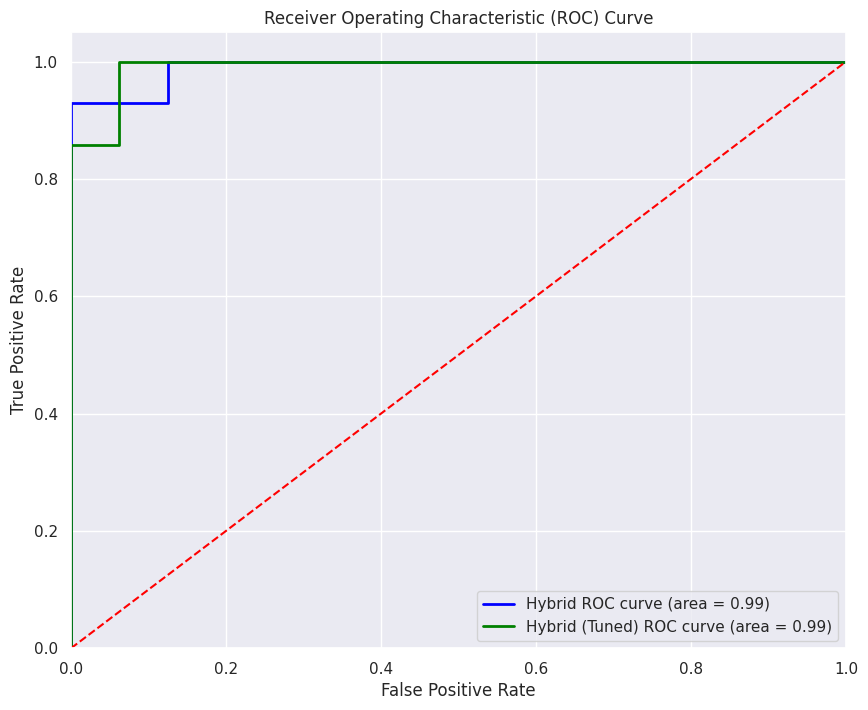

In [264]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ... [Your previous code for model definitions, training, and evaluation]

# First, ensure the initial hybrid model is fitted
hybrid.fit(x_train, y_train)

# Calculate the ROC curve for the original model
fpr_hybrid, tpr_hybrid, _ = roc_curve(y_test, hybrid.predict_proba(x_test)[:, 1])
roc_auc_hybrid = auc(fpr_hybrid, tpr_hybrid)

# The hybrid_best model should already be fitted from the grid search.
# If you haven't altered it after the grid search, you don't need to fit it again.

# Calculate the ROC curve for the tuned model
fpr_hybrid_best, tpr_hybrid_best, _ = roc_curve(y_test, hybrid_best.predict_proba(x_test)[:, 1])
roc_auc_hybrid_best = auc(fpr_hybrid_best, tpr_hybrid_best)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_hybrid, tpr_hybrid, color='blue', lw=2, label=f'Hybrid ROC curve (area = {roc_auc_hybrid:.2f})')
plt.plot(fpr_hybrid_best, tpr_hybrid_best, color='green', lw=2, label=f'Hybrid (Tuned) ROC curve (area = {roc_auc_hybrid_best:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# *LSTM*

In [265]:
# building LSTM model with accuracy and classification report with model summary
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
# # reshape the data
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# initialize the model
model = Sequential()
# add the first LSTM layer
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# add the dropout layer
model.add(Dropout(0.2))
# add the second LSTM layer
model.add(LSTM(units = 50, return_sequences = True))
# add the dropout layer
model.add(Dropout(0.2))
# add the third LSTM layer
model.add(LSTM(units = 50, return_sequences = True))
# add the dropout layer
model.add(Dropout(0.2))
# add the fourth LSTM layer
model.add(LSTM(units = 50))
# add the dropout layer
model.add(Dropout(0.2))
# add the output layer
model.add(Dense(units = 1))
# compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])
# summarize the model
model.summary()
# fit the model
model.fit(x_train, y_train, epochs = 10, batch_size = 32)

from sklearn.metrics import recall_score, roc_auc_score, accuracy_score, f1_score, precision_score
from tabulate import tabulate

# Predictions from the LSTM model
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

# Evaluation metrics
lstm_acc = accuracy_score(y_test, y_pred) * 100
f1_lstm = f1_score(y_test, y_pred, average='weighted') * 100
pr_lstm = precision_score(y_test, y_pred, average='weighted') * 100
recall_lstm = recall_score(y_test, y_pred, average='weighted') * 100
y_pred_prob = model.predict(x_test)
roc_auc_lstm = roc_auc_score(y_test, y_pred_prob) * 100

# Store results in a dictionary
results_lstm = {
    'Accuracy': lstm_acc,
    'F1 Score': f1_lstm,
    'Precision': pr_lstm,
    'Recall': recall_lstm,
    'ROC AUC Score': roc_auc_lstm
}

# Display results in a table
print("LSTM  before tuning Evaluation Results:")
print(tabulate(results_lstm.items(), headers=["Metrics", "Value (%)"], tablefmt="grid"))

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_144 (LSTM)             (None, 15, 50)            10400     
                                                                 
 dropout_144 (Dropout)       (None, 15, 50)            0         
                                                                 
 lstm_145 (LSTM)             (None, 15, 50)            20200     
                                                                 
 dropout_145 (Dropout)       (None, 15, 50)            0         
                                                                 
 lstm_146 (LSTM)             (None, 15, 50)            20200     
                                                                 
 dropout_146 (Dropout)       (None, 15, 50)            0         
                                                                 
 lstm_147 (LSTM)             (None, 50)              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [266]:
# import plotly.graph_objs as go
# from plotly.subplots import make_subplots

# # Define classifiers and their evaluation metric values before and after tuning
# classifiers = ["LDA", "MLP", "ExtraTrees", "Hybrid", "LSTM"]
# accuracy_values_before = [acc_lda, acc_mlp, acc_etc, acc_hybrid, lstm_acc]
# accuracy_values_after = [acc_lda_best, acc_mlp_best, acc_etc_best, acc_hybrid_best, lstm_acc]

# precision_values_before = [pre_lda, pre_mlp, pre_etc, pre_hybrid, pr_lstm]
# precision_values_after = [pre_lda_best, pre_mlp_best, pre_etc_best, pre_hybrid_best, pr_lstm]

# recall_values_before = [recall_lda, recall_mlp, recall_etc, recall_hybrid, recall_lstm]
# recall_values_after = [recall_lda_best, recall_mlp_best, recall_etc_best, recall_hybrid_best, recall_lstm]

# f1_values_before = [f1_lda, f1_mlp, f1_etc, f1_hybrid, f1_lstm]
# f1_values_after = [f1_lda_best, f1_mlp_best, f1_etc_best, f1_hybrid_best, f1_lstm]

# # Create subplots
# fig = make_subplots(rows=2, cols=2, subplot_titles=("Accuracy", "Precision", "Recall", "F1 Score"))

# # Add traces for each evaluation metric before tuning
# for i in range(len(classifiers)):
#     fig.add_trace(go.Bar(x=["Before Tuning", "After Tuning"],
#                          y=[accuracy_values_before[i], accuracy_values_after[i]],
#                          name=classifiers[i]),
#                   row=1, col=1)
#     fig.add_trace(go.Bar(x=["Before Tuning", "After Tuning"],
#                          y=[precision_values_before[i], precision_values_after[i]],
#                          name=classifiers[i]),
#                   row=1, col=2)
#     fig.add_trace(go.Bar(x=["Before Tuning", "After Tuning"],
#                          y=[recall_values_before[i], recall_values_after[i]],
#                          name=classifiers[i]),
#                   row=2, col=1)
#     fig.add_trace(go.Bar(x=["Before Tuning", "After Tuning"],
#                          y=[f1_values_before[i], f1_values_after[i]],
#                          name=classifiers[i]),
#                   row=2, col=2)

# # Update layout
# fig.update_layout(title_text='Classifier Evaluation Metrics Before and After Hyperparameter Tuning',
#                   xaxis_title="Tuning Status",
#                   yaxis_title="Metric Value (%)",
#                   showlegend=True,
#                   barmode='group')

# # Show the plot
# fig.show()

# $$Applying     k-best Feature     selection$$

1 .K-best feature selection is applied to select a subset of the most relevant features from a larger set of features in a dataset. This is done in order to reduce the complexity of the model, improve its accuracy and speed up the training process, while avoiding overfitting.

2 .Overfitting refers to the situation where the machine learning model performs well on the training data, but poorly on new, unseen data. This can happen when the model is too complex and includes irrelevant features that are not generalized by the model, leading to a poor fit to the new data. K-best feature selection tries to address this problem by selecting only the most relevant features for the model, discarding the less relevant ones, and preventing the model from fitting to noise in the data.

3 .By selecting only the k best features, where k is chosen based on experimentation and domain knowledge, the model becomes simpler, easier to interpret, and less prone to overfitting due to high dimensionality. K-best feature selection can be performed using statistical techniques, such as ANOVA F-value for classification, or mutual information for regression, among others. Different feature selection techniques have their own strengths and weaknesses, depending on the specific problem.

In [267]:
df=pd.read_csv('final_data.csv')
df.head()

Unnamed: 0  volume  available_supply    id  last_updated  market_cap_usd  \
0           0     763               205   128            14             554   
1           1     763               802   455            13             554   
2           2     763               210   130            38             554   
3           3     763               381   664            31             554   
4           4     763               381  1005             1             554   

   max_supply  name  percent_change_1h  percent_change_24h  percent_change_7d  \
0          34   145                116                 903                538   
1         104   441                 16                 293                349   
2          34   147                222                 358                273   
3          20   609                105                 820                439   
4          20   976                157                 282                 79   

   price_btc  price_usd  rank  symbol  total_supply  Pred  
0        644        949     0     181           196     0  
1        644        949   438     423           821     0  
2        644        949   549     107           200     0  
3        644        949   660     714           666     1  
4        175        741   771    1257           666     1

In [268]:
df.drop(['id','name'], axis=1, inplace=True)

In [269]:
X=df.drop('Pred',axis=1)
y=df['Pred']

In [270]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [271]:
X_train

Unnamed: 0  volume  available_supply  last_updated  market_cap_usd  \
536          536      82               570            17              53   
139          139     763                23            11             554   
1233        1233     761               826            27             873   
1027        1027       3               115            31             131   
224          224     885               241            30             290   
...          ...     ...               ...           ...             ...   
1095        1095     168               826            18             873   
1130        1130     554               826            46             873   
1294        1294       5               826            21             873   
860          860     647               381             7             252   
1126        1126     583               826            42             873   

      max_supply  percent_change_1h  percent_change_24h  percent_change_7d  \
536          104                110                 820                439   
139          104                105                 820                439   
1233         104                 94                 820                998   
1027         104                 20                   1                302   
224           32                251                 317                918   
...          ...                ...                 ...                ...   
1095         104                167                 454               1001   
1130         104                  2                 728                439   
1294         104                155                 969                540   
860          104                146                 564                134   
1126           2                105                 307                389   

      price_btc  price_usd  rank  symbol  total_supply  
536         155        410   813     764             3  
139         348        833   373     507            27  
1233        623        297   262     443           666  
1027        636        932    33     410           666  
224         622        610   467    1189           249  
...         ...        ...   ...     ...           ...  
1095        332        188   108     336           666  
1130        591        284   148    1158           666  
1294        190         23   329    1262           652  
860         190         31  1173    1108           666  
1126        436        215   143     180           265  

[928 rows x 14 columns]

In [272]:
y_train

536     1
139     0
1233    0
1027    0
224     1
       ..
1095    0
1130    1
1294    1
860     1
1126    0
Name: Pred, Length: 928, dtype: int64

In [273]:
X_test

Unnamed: 0  volume  available_supply  last_updated  market_cap_usd  \
889          889     847               561            31              57   
467          467     432               266            38             309   
887          887     683               270             8              70   
175          175     494               285            17             471   
1286        1286     341               826            19             873   
...          ...     ...               ...           ...             ...   
1080        1080     515               826            17             873   
634          634     177               574             3             492   
141          141     763               230            45             554   
665          665     132               232            42             301   
847          847     201               113             7             359   

      max_supply  percent_change_1h  percent_change_24h  percent_change_7d  \
889          104                105                 310                363   
467           34                105                  55                238   
887          104                153                 969               1078   
175          104                266                 389                234   
1286         104                152                 547               1078   
...          ...                ...                 ...                ...   
1080         104                105                 310                303   
634          104                211                 478                829   
141            3                105                 570                852   
665          104                 57                 178                439   
847          104                193                 592                649   

      price_btc  price_usd  rank  symbol  total_supply  
889         166        414  1205     616           753  
467         618        606   736     240           244  
887         431        533  1202     136           251  
175          49        666   412     767           268  
1286        188        327   320    1097           846  
...         ...        ...   ...     ...           ...  
1080        389        851    92    1074           666  
634         466        226   922      10           584  
141         200        750   375     596           666  
665         651        310   956     584           217  
847         102        381  1158     175           116  

[398 rows x 14 columns]

In [274]:
y_test

889     0
467     0
887     0
175     1
1286    1
       ..
1080    1
634     0
141     0
665     1
847     0
Name: Pred, Length: 398, dtype: int64

In [275]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.02622786, 0.00410921, 0.02825164, 0.01711314, 0.00836722,
       0.        , 0.04630035, 0.00795797, 0.00383572, 0.        ,
       0.        , 0.        , 0.36540969, 0.01881318])

In [276]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

symbol                0.365410
percent_change_1h     0.046300
available_supply      0.028252
Unnamed: 0            0.026228
total_supply          0.018813
last_updated          0.017113
market_cap_usd        0.008367
percent_change_24h    0.007958
volume                0.004109
percent_change_7d     0.003836
max_supply            0.000000
price_btc             0.000000
price_usd             0.000000
rank                  0.000000
dtype: float64

In [277]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.        , 0.        , 0.01686534, 0.        , 0.00587884,
       0.01604747, 0.0073185 , 0.        , 0.        , 0.03724706,
       0.        , 0.0163191 , 0.35147242, 0.        ])

In [278]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Unnamed: 0', 'volume', 'available_supply', 'last_updated',
       'market_cap_usd', 'max_supply', 'percent_change_7d', 'price_usd',
       'symbol', 'total_supply'],
      dtype='object')

In [279]:
# Define the list of columns you want to select
columns_to_select = ['available_supply', 'last_updated', 'market_cap_usd', 'max_supply',
                     'percent_change_7d', 'price_btc', 'price_usd', 'rank', 'symbol',
                     'total_supply']

# Create a new DataFrame with the selected columns
df1 = df[columns_to_select].copy()
df1.head()

available_supply  last_updated  market_cap_usd  max_supply  \
0               205            14             554          34   
1               802            13             554         104   
2               210            38             554          34   
3               381            31             554          20   
4               381             1             554          20   

   percent_change_7d  price_btc  price_usd  rank  symbol  total_supply  
0                538        644        949     0     181           196  
1                349        644        949   438     423           821  
2                273        644        949   549     107           200  
3                439        644        949   660     714           666  
4                 79        175        741   771    1257           666

In [280]:
from sklearn.cluster import KMeans
dist_df = []
sse = []
for num_clust in range(1, 10):
  km  = KMeans(n_clusters=num_clust)
  km.fit(df1)
  dist_df.append([num_clust, km.inertia_])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

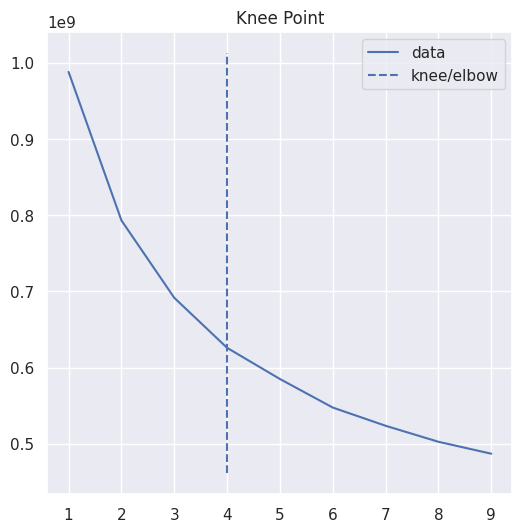

In [281]:
dist_df = pd.DataFrame(dist_df, columns=['num_of_cluster', 'distance'])
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), dist_df['distance'], curve="convex", direction="decreasing")
kl.elbow

kl.plot_knee()

In [282]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df1)
y_pred = kmeans.predict(df1)
df1['Pred'] = y_pred
df1['Pred'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



1    896
0    430
Name: Pred, dtype: int64

<Axes: >

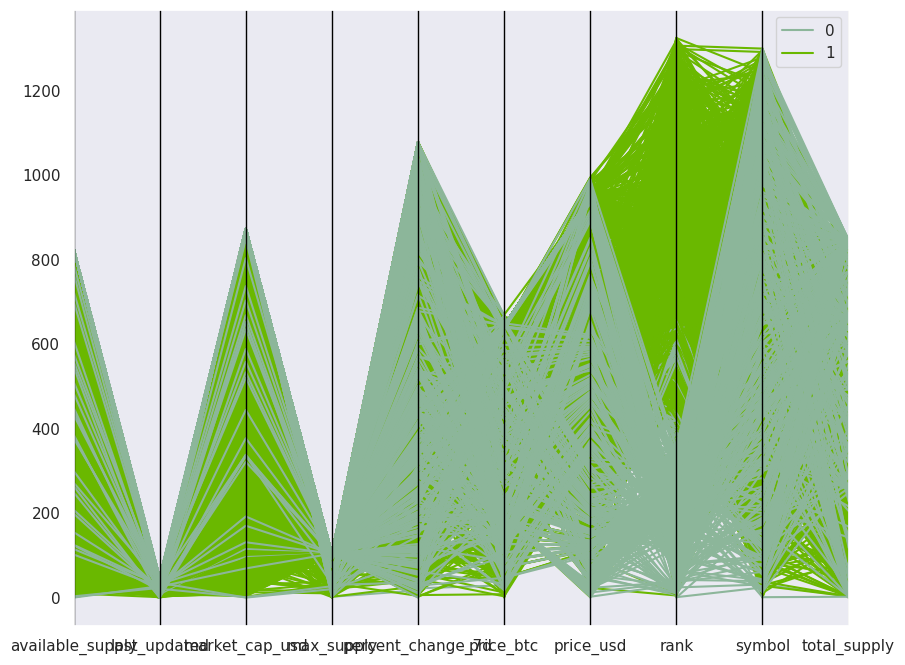

In [283]:
pd.plotting.parallel_coordinates(df1, 'Pred')

In [284]:
df1.head()

available_supply  last_updated  market_cap_usd  max_supply  \
0               205            14             554          34   
1               802            13             554         104   
2               210            38             554          34   
3               381            31             554          20   
4               381             1             554          20   

   percent_change_7d  price_btc  price_usd  rank  symbol  total_supply  Pred  
0                538        644        949     0     181           196     0  
1                349        644        949   438     423           821     0  
2                273        644        949   549     107           200     1  
3                439        644        949   660     714           666     1  
4                 79        175        741   771    1257           666     1

In [285]:
X=df1.drop('Pred',axis=1)
y=df1['Pred']

In [286]:
X

available_supply  last_updated  market_cap_usd  max_supply  \
0                  205            14             554          34   
1                  802            13             554         104   
2                  210            38             554          34   
3                  381            31             554          20   
4                  381             1             554          20   
...                ...           ...             ...         ...   
1321               826             0             873         104   
1322               826             0             873         104   
1323               826             0             873         104   
1324               826             0             873         104   
1325               826             0             873         104   

      percent_change_7d  price_btc  price_usd  rank  symbol  total_supply  
0                   538        644        949     0     181           196  
1                   349        644        949   438     423           821  
2                   273        644        949   549     107           200  
3                   439        644        949   660     714           666  
4                    79        175        741   771    1257           666  
...                 ...        ...        ...   ...     ...           ...  
1321               1007        190          7   360    1109           846  
1322                284        190         15   361     123           846  
1323                201        497        223   362     104           353  
1324                167        190         17   363     985           666  
1325                335        107        119   364     444             2  

[1326 rows x 10 columns]

In [287]:
y

0       0
1       0
2       1
3       1
4       1
       ..
1321    0
1322    0
1323    0
1324    0
1325    0
Name: Pred, Length: 1326, dtype: int32

In [288]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
a,b = sm.fit_resample(X,y)

In [289]:
a.shape

(1792, 10)

In [290]:
b.shape

(1792,)

In [291]:
X_train,X_test,y_train,y_test=train_test_split(a,b,test_size=0.3,random_state=42)

In [292]:
X_train

available_supply  last_updated  market_cap_usd  max_supply  \
513                342            19             108         104   
81                 705            32             554         104   
862                381            21             226         104   
380                440            20             639         104   
1517               826            37             873         104   
...                ...           ...             ...         ...   
1130               826            46             873         104   
1294               826            21             873         104   
860                381             7             252         104   
1459               826            41             873         104   
1126               826            42             873           2   

      percent_change_7d  price_btc  price_usd  rank  symbol  total_supply  
513                  32        407        519   788      64           339  
81                  229        644        949  1127     425           303  
862                 536        190         23  1175     555           666  
380                 672         44        663   640    1171           447  
1517                510        188        722   315     447           794  
...                 ...        ...        ...   ...     ...           ...  
1130                439        591        284   148    1158           666  
1294                540        190         23   329    1262           652  
860                 134        190         31  1173    1108           666  
1459                371        644        949    91     429           668  
1126                389        436        215   143     180           265  

[1254 rows x 10 columns]

In [293]:
y_train

513     1
81      1
862     1
380     1
1517    0
       ..
1130    0
1294    0
860     1
1459    0
1126    0
Name: Pred, Length: 1254, dtype: int32

In [294]:
X_test

available_supply  last_updated  market_cap_usd  max_supply  \
628                585            32             522         104   
220                 93            20             297         104   
1057               826            42             873         104   
438                724            36             443         104   
1472               826            44             873         104   
...                ...           ...             ...         ...   
1192               826            35             873         104   
118                779            23             554         104   
1125               826            20             873         104   
963                182            35             570         104   
522                 57            35              88         104   

      percent_change_7d  price_btc  price_usd  rank  symbol  total_supply  
628                 126        482        233   915     478           706  
220                 578         74        680   463     521            95  
1057                439        349        496    66     184           284  
438                 485        644        949   704    1159           171  
1472                 78        329        820    63     174             2  
...                 ...        ...        ...   ...     ...           ...  
1192                490        190         13   216     882           846  
118                1055        464        880   212    1193             3  
1125                804        530        572   142     828           666  
963                  91        294         44  1287     164           666  
522                 482        605        937   798     533            63  

[538 rows x 10 columns]

In [295]:
y_test

628     1
220     1
1057    0
438     1
1472    0
       ..
1192    0
118     0
1125    0
963     1
522     1
Name: Pred, Length: 538, dtype: int32

# *LinearDiscriminantAnalysis*

In [296]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
)
import time
from tabulate import tabulate

# Initialize the LDA Classifier
lda1 = LinearDiscriminantAnalysis()
start_time_lda = time.time()
lda1.fit(X_train, y_train)
y_pred_lda = lda1.predict(X_test)
end_time_lda = time.time()

# Calculate evaluation metrics
acc_lda = accuracy_score(y_test, y_pred_lda) * 100
pre_lda = precision_score(y_test, y_pred_lda) * 100
recall_lda = recall_score(y_test, y_pred_lda) * 100
f1_lda = f1_score(y_test, y_pred_lda) * 100
roc_auc_lda = roc_auc_score(y_test, lda1.predict_proba(X_test)[:, 1]) * 100
report_lda = classification_report(y_test, y_pred_lda)

# Calculate time taken for training and prediction
execution_time_lda = end_time_lda - start_time_lda

# Store results in a dictionary
results_lda = {
    'Accuracy': acc_lda,
    'Precision': pre_lda,
    'Recall': recall_lda,
    'F1_score': f1_lda,
    'ROC_AUC': roc_auc_lda,
    'Time Taken (seconds)': execution_time_lda
}

# Display results in a table
print("LDA Classifier Results:")
print(tabulate(results_lda.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification report:\n', report_lda)

# Parameters for grid search with LDA
param_grid_lda = {
    'solver': ['lsqr', 'eigen'],  # Available solvers for LDA
    # Add more hyperparameters to tune as needed
}

# Grid search with LDA
grid_search_lda = GridSearchCV(estimator=LinearDiscriminantAnalysis(), param_grid=param_grid_lda, cv=3, verbose=2, scoring='accuracy')
grid_search_lda.fit(X_train[:100], y_train[:100])

# Get the best parameters and retrain the model
best_params_lda = grid_search_lda.best_params_
lda_best1 = LinearDiscriminantAnalysis(**best_params_lda)
lda_best1.fit(X_train[:100], y_train[:100])

# Perform prediction and evaluation using the best model
y_pred_lda_best = lda_best1.predict(X_test[:100])
acc_lda_best = accuracy_score(y_test[:100], y_pred_lda_best) * 100
pre_lda_best = precision_score(y_test[:100], y_pred_lda_best) * 100
recall_lda_best = recall_score(y_test[:100], y_pred_lda_best) * 100
f1_lda_best = f1_score(y_test[:100], y_pred_lda_best) * 100
roc_auc_lda_best = roc_auc_score(y_test[:100], lda_best1.predict_proba(X_test[:100])[:, 1]) * 100
report_lda_best = classification_report(y_test[:100], y_pred_lda_best)

# Store results in a dictionary for the tuned model
results_lda_best = {
    'Accuracy': acc_lda_best,
    'Precision': pre_lda_best,
    'Recall': recall_lda_best,
    'F1_score': f1_lda_best,
    'ROC_AUC': roc_auc_lda_best
}

# Display results for the tuned model
print("\nLDA Classifier Results (After Hyperparameter Tuning):")
print(tabulate(results_lda_best.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification report for the tuned model:\n', report_lda_best)


LDA Classifier Results:
+----------------------+------------+
| Metrics              |      Value |
+======================+============+
| Accuracy             | 98.8848    |
+----------------------+------------+
| Precision            | 99.6212    |
+----------------------+------------+
| Recall               | 98.1343    |
+----------------------+------------+
| F1_score             | 98.8722    |
+----------------------+------------+
| ROC_AUC              | 99.8701    |
+----------------------+------------+
| Time Taken (seconds) |  0.0171318 |
+----------------------+------------+

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       270
           1       1.00      0.98      0.99       268

    accuracy                           0.99       538
   macro avg       0.99      0.99      0.99       538
weighted avg       0.99      0.99      0.99       538

Fitting 3 folds for each of 2 candidates, totalling 6 

Here is the Confusion Matrix for LDA: 

[[269   1]
 [  5 263]]
_________________________________________________________


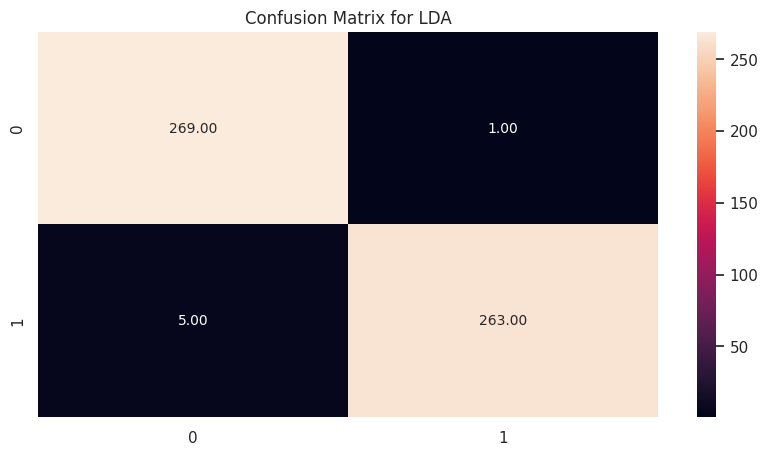

_________________________________________________________
Here is the Confusion Matrix for Best LDA: 

[[46  3]
 [ 1 50]]
_________________________________________________________


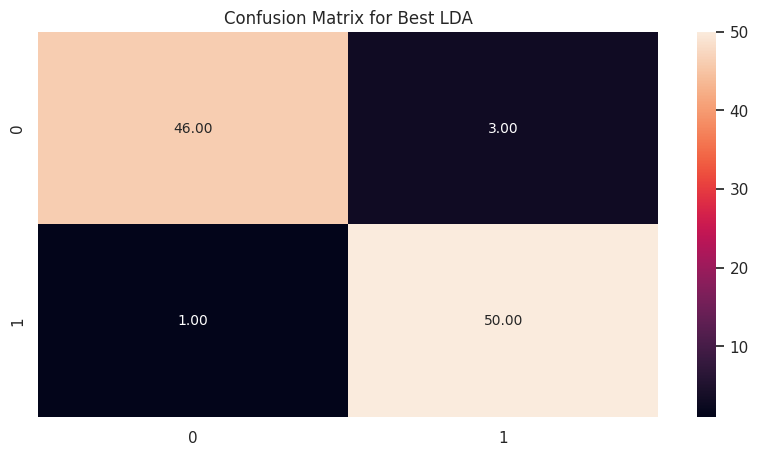

_________________________________________________________


In [297]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    """
    Print and plot confusion matrix.

    Parameters:
    - y_true: true labels
    - y_pred: predicted labels
    - title: title for the plot
    """
    matrix = confusion_matrix(y_true, y_pred)
    print(f'Here is the {title}: \n\n{matrix}')
    print('_________________________________________________________')

    plt.figure(figsize=(10,5))
    sns.heatmap(matrix, annot=True, fmt='0.2f', annot_kws={'size':10})
    plt.title(title)
    plt.show()
    print('_________________________________________________________')

# For the regular LDA model
plot_confusion_matrix(y_test, y_pred_lda, 'Confusion Matrix for LDA')

# For the best LDA model from grid search
plot_confusion_matrix(y_test[:100], y_pred_lda_best, 'Confusion Matrix for Best LDA')

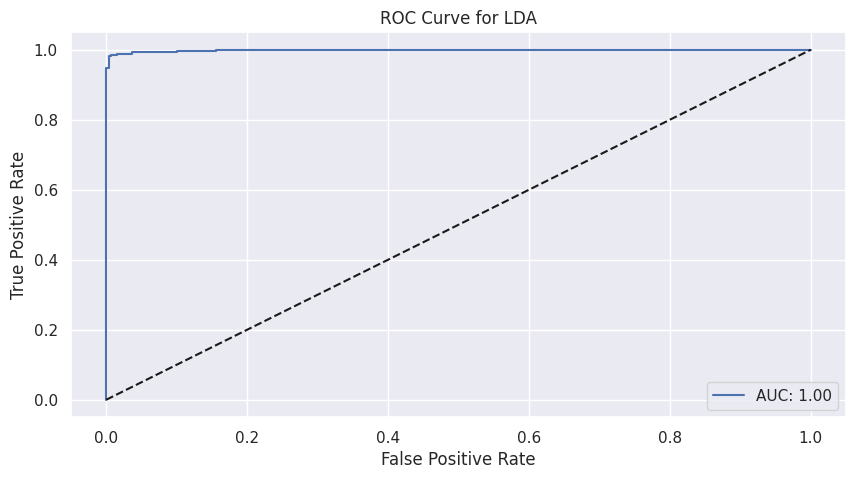

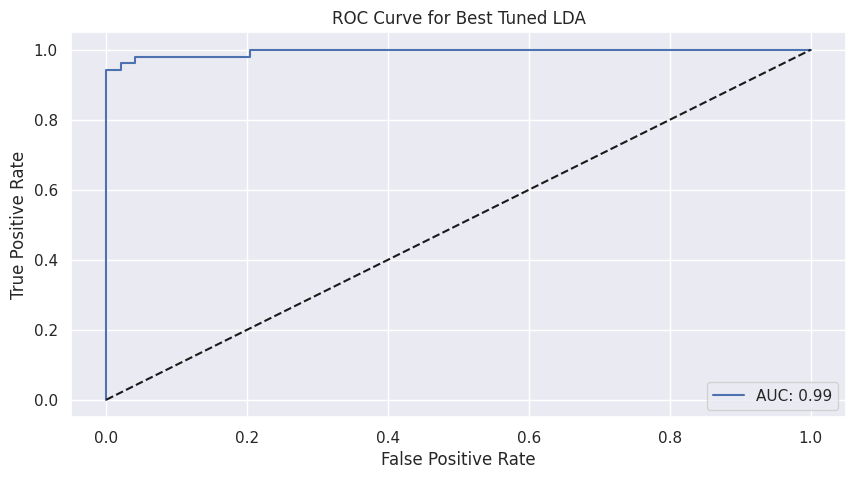

In [298]:
# Plot ROC-AUC curve for the best-tuned LDA classifier
plot_roc_curve(lda1, X_test, y_test, 'ROC Curve for LDA')
# Plot ROC-AUC curve for the best-tuned LDA classifier
plot_roc_curve(lda_best1, X_test[:100], y_test[:100], 'ROC Curve for Best Tuned LDA')


# *MLP Classifier*

In [299]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLP Classifier
mlp = MLPClassifier()
start_time_mlp = time.time()
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
end_time_mlp = time.time()

# Calculate evaluation metrics
acc_mlp = accuracy_score(y_test, y_pred_mlp) * 100
pre_mlp = precision_score(y_test, y_pred_mlp) * 100
recall_mlp = recall_score(y_test, y_pred_mlp) * 100
f1_mlp = f1_score(y_test, y_pred_mlp) * 100
roc_auc_mlp = roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1]) * 100
report_mlp = classification_report(y_test, y_pred_mlp)

# Calculate time taken for training and prediction
execution_time_mlp = end_time_mlp - start_time_mlp

# Store results in a dictionary
results_mlp = {
    'Accuracy': acc_mlp,
    'Precision': pre_mlp,
    'Recall': recall_mlp,
    'F1_score': f1_mlp,
    'ROC_AUC': roc_auc_mlp,
    'Time Taken (seconds)': execution_time_mlp
}

# Display results in a table
print("MLP Classifier Results:")
print(tabulate(results_mlp.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification report:\n', report_mlp)

# Parameters for grid search with MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)],  # Example hidden layer configurations
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Grid search with MLP
grid_search_mlp = GridSearchCV(estimator=MLPClassifier(), param_grid=param_grid_mlp, cv=3, verbose=2, scoring='accuracy')
grid_search_mlp.fit(X_train[:100], y_train[:100])

# Get the best parameters and retrain the model
best_params_mlp = grid_search_mlp.best_params_
mlp_best = MLPClassifier(**best_params_mlp)
mlp_best.fit(X_train[:100], y_train[:100])

# Perform prediction and evaluation using the best model
y_pred_mlp_best = mlp_best.predict(X_test[:100])
acc_mlp_best = accuracy_score(y_test[:100], y_pred_mlp_best) * 100
pre_mlp_best = precision_score(y_test[:100], y_pred_mlp_best) * 100
recall_mlp_best = recall_score(y_test[:100], y_pred_mlp_best) * 100
f1_mlp_best = f1_score(y_test[:100], y_pred_mlp_best) * 100
roc_auc_mlp_best = roc_auc_score(y_test[:100], mlp_best.predict_proba(X_test[:100])[:, 1]) * 100
report_mlp_best = classification_report(y_test[:100], y_pred_mlp_best)

# Store results in a dictionary for the tuned model
results_mlp_best = {
    'Accuracy': acc_mlp_best,
    'Precision': pre_mlp_best,
    'Recall': recall_mlp_best,
    'F1_score': f1_mlp_best,
    'ROC_AUC': roc_auc_mlp_best
}

# Display results for the tuned model
print("\nMLP Classifier Results (After Hyperparameter Tuning):")
print(tabulate(results_mlp_best.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification report for the tuned model:\n', report_mlp_best)

MLP Classifier Results:
+----------------------+----------+
| Metrics              |    Value |
+======================+==========+
| Accuracy             | 97.9554  |
+----------------------+----------+
| Precision            | 99.2337  |
+----------------------+----------+
| Recall               | 96.6418  |
+----------------------+----------+
| F1_score             | 97.9206  |
+----------------------+----------+
| ROC_AUC              | 99.9171  |
+----------------------+----------+
| Time Taken (seconds) |  0.85165 |
+----------------------+----------+

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       270
           1       0.99      0.97      0.98       268

    accuracy                           0.98       538
   macro avg       0.98      0.98      0.98       538
weighted avg       0.98      0.98      0.98       538

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END activation=rel

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,); total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,); total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,); total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50); total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50); total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50); total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25); total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25); total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25); total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,); total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,); total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,); total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50); total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50); total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50); total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25); total time=   0.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25); total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25); total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,); total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,); total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,); total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50); total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50); total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50); total time=   0.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50, 25); total time=   0.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50, 25); total time=   0.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50, 25); total time=   0.3s

MLP Classifier Results (After Hyperparameter Tuning):
+-----------+---------+
| Metrics   |   Value |
+===========+=========+
| Accuracy  | 97      |
+-----------+---------+
| Precision | 98      |
+-----------+---------+
| Recall    | 96.0784 |
+-----------+---------+
| F1_score  | 97.0297 |
+-----------+---------+
| ROC_AUC   | 99.5198 |
+-----------+---------+

Classification report for the tuned model:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        49
           1       0.98      0.96      0.97        51

    accuracy                           0.97       100
   macro av

Here is the Confusion Matrix for MLP: 

[[268   2]
 [  9 259]]
_________________________________________________________


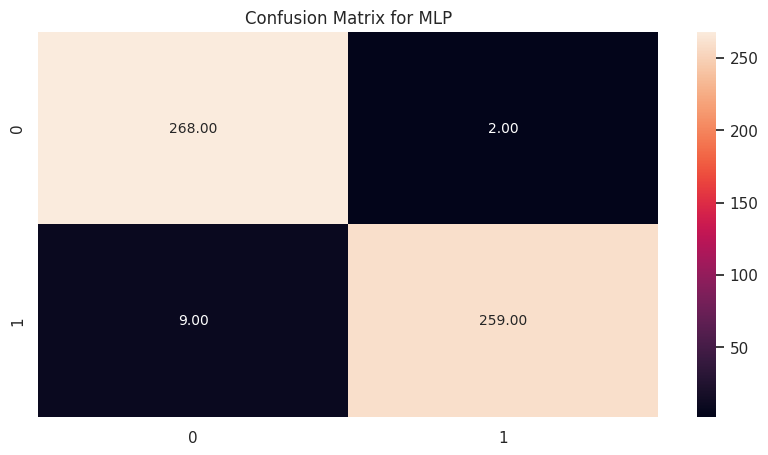

_________________________________________________________
Here is the Confusion Matrix for Best MLP: 

[[48  1]
 [ 2 49]]
_________________________________________________________


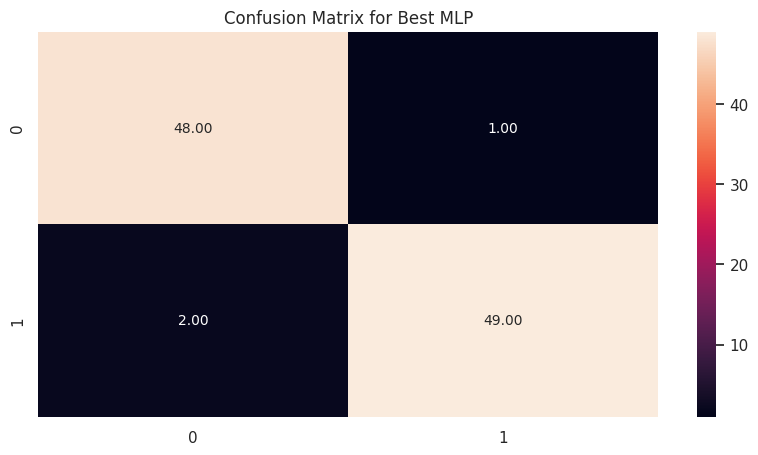

_________________________________________________________


In [300]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    """
    Print and plot confusion matrix.

    Parameters:
    - y_true: true labels
    - y_pred: predicted labels
    - title: title for the plot
    """
    matrix = confusion_matrix(y_true, y_pred)
    print(f'Here is the {title}: \n\n{matrix}')
    print('_________________________________________________________')

    plt.figure(figsize=(10,5))
    sns.heatmap(matrix, annot=True, fmt='0.2f', annot_kws={'size':10})
    plt.title(title)
    plt.show()
    print('_________________________________________________________')

# For the regular LDA model
plot_confusion_matrix(y_test, y_pred_mlp, 'Confusion Matrix for MLP')

# For the best LDA model from grid search
plot_confusion_matrix(y_test[:100], y_pred_mlp_best, 'Confusion Matrix for Best MLP')

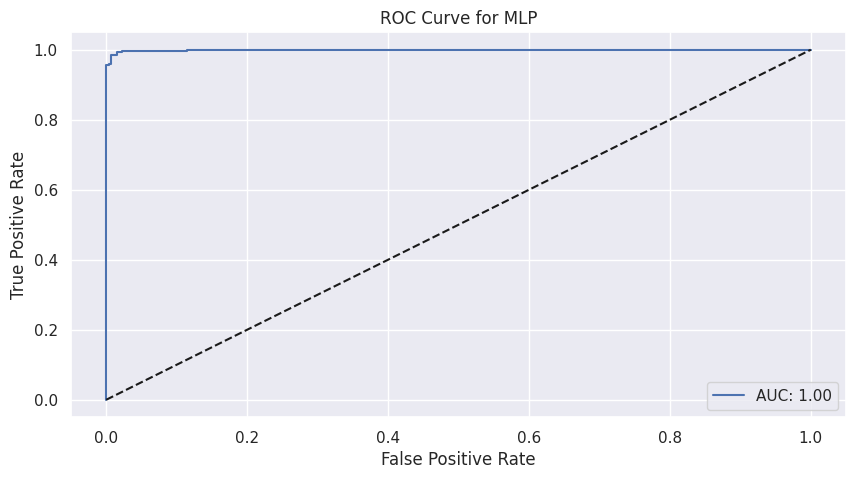

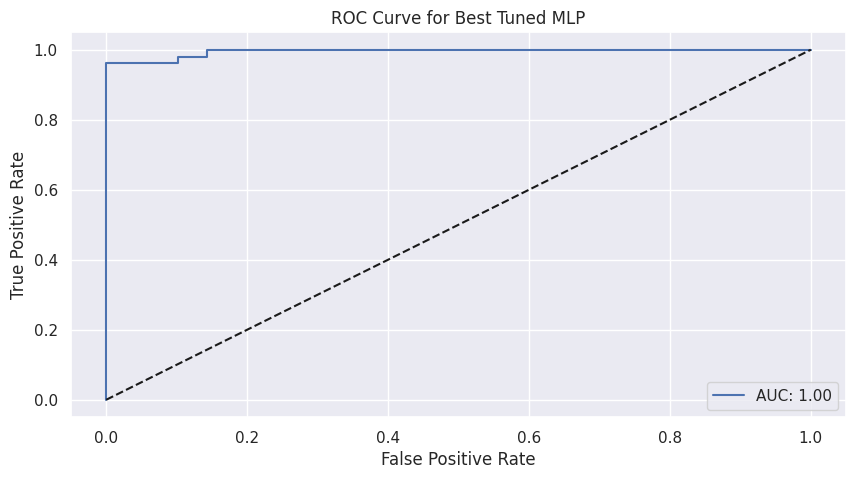

In [301]:
# Plot ROC-AUC curve for the best-tuned LDA classifier
plot_roc_curve(mlp, X_test, y_test, 'ROC Curve for MLP')
# Plot ROC-AUC curve for the best-tuned LDA classifier
plot_roc_curve(mlp_best, X_test[:100], y_test[:100], 'ROC Curve for Best Tuned MLP')


# *ExtraTreesClassifier*

In [302]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the ExtraTrees Classifier
etc = ExtraTreesClassifier()
start_time_etc = time.time()
etc.fit(X_train, y_train)
y_pred_etc = etc.predict(X_test)
end_time_etc = time.time()

# Calculate evaluation metrics
acc_etc = accuracy_score(y_test, y_pred_etc) * 100
pre_etc = precision_score(y_test, y_pred_etc) * 100
recall_etc = recall_score(y_test, y_pred_etc) * 100
f1_etc = f1_score(y_test, y_pred_etc) * 100
roc_auc_etc = roc_auc_score(y_test, etc.predict_proba(X_test)[:, 1]) * 100
report_etc = classification_report(y_test, y_pred_etc)

# Calculate time taken for training and prediction
execution_time_etc = end_time_etc - start_time_etc

# Store results in a dictionary
results_etc = {
    'Accuracy': acc_etc,
    'Precision': pre_etc,
    'Recall': recall_etc,
    'F1_score': f1_etc,
    'ROC_AUC': roc_auc_etc,
    'Time Taken (seconds)': execution_time_etc
}

# Display results in a table
print("ExtraTrees Classifier Results:")
print(tabulate(results_etc.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification report:\n', report_etc)

# Parameters for grid search with ExtraTrees
param_grid_etc = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with ExtraTrees
grid_search_etc = GridSearchCV(estimator=ExtraTreesClassifier(), param_grid=param_grid_etc, cv=3, verbose=2, scoring='accuracy')
grid_search_etc.fit(X_train[:100], y_train[:100])

# Get the best parameters and retrain the model
best_params_etc = grid_search_etc.best_params_
etc_best = ExtraTreesClassifier(**best_params_etc)
etc_best.fit(X_train[:100], y_train[:100])

# Perform prediction and evaluation using the best model
y_pred_etc_best = etc_best.predict(X_test[:100])
acc_etc_best = accuracy_score(y_test[:100], y_pred_etc_best) * 100
pre_etc_best = precision_score(y_test[:100], y_pred_etc_best) * 100
recall_etc_best = recall_score(y_test[:100], y_pred_etc_best) * 100
f1_etc_best = f1_score(y_test[:100], y_pred_etc_best) * 100
roc_auc_etc_best = roc_auc_score(y_test[:100], etc_best.predict_proba(X_test[:100])[:, 1]) * 100
report_etc_best = classification_report(y_test[:100], y_pred_etc_best)

# Store results in a dictionary for the tuned model
results_etc_best = {
    'Accuracy': acc_etc_best,
    'Precision': pre_etc_best,
    'Recall': recall_etc_best,
    'F1_score': f1_etc_best,
    'ROC_AUC': roc_auc_etc_best
}

# Display results for the tuned model
print("\nExtraTrees Classifier Results (After Hyperparameter Tuning):")
print(tabulate(results_etc_best.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification report for the tuned model:\n', report_etc_best)

ExtraTrees Classifier Results:
+----------------------+-----------+
| Metrics              |     Value |
+======================+===========+
| Accuracy             | 98.8848   |
+----------------------+-----------+
| Precision            | 98.8806   |
+----------------------+-----------+
| Recall               | 98.8806   |
+----------------------+-----------+
| F1_score             | 98.8806   |
+----------------------+-----------+
| ROC_AUC              | 99.9813   |
+----------------------+-----------+
| Time Taken (seconds) |  0.200199 |
+----------------------+-----------+

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       270
           1       0.99      0.99      0.99       268

    accuracy                           0.99       538
   macro avg       0.99      0.99      0.99       538
weighted avg       0.99      0.99      0.99       538

Fitting 3 folds for each of 108 candidates, totalling 324 fits

Here is the Confusion Matrix for ETC: 

[[267   3]
 [  3 265]]
_________________________________________________________


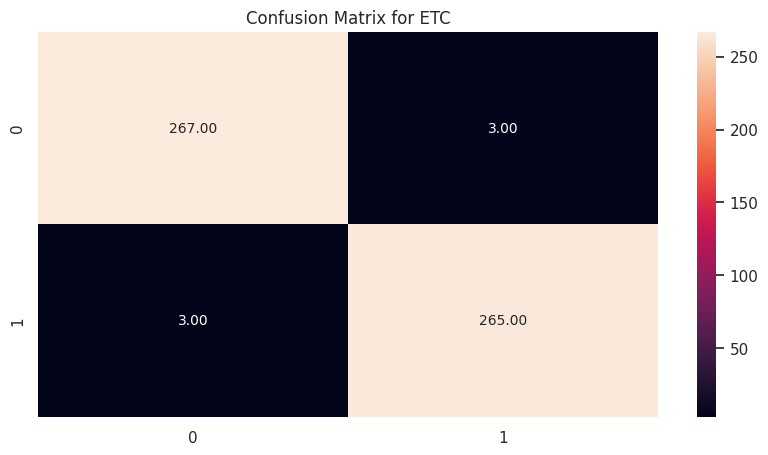

_________________________________________________________
Here is the Confusion Matrix for Best ETC: 

[[48  1]
 [ 0 51]]
_________________________________________________________


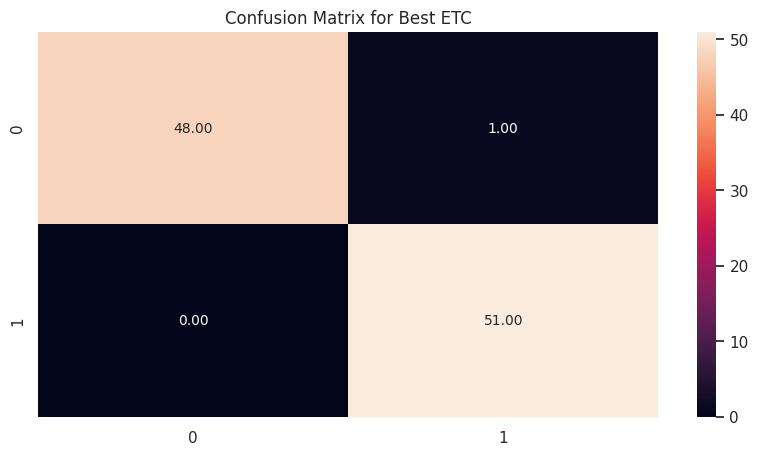

_________________________________________________________


In [303]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    """
    Print and plot confusion matrix.

    Parameters:
    - y_true: true labels
    - y_pred: predicted labels
    - title: title for the plot
    """
    matrix = confusion_matrix(y_true, y_pred)
    print(f'Here is the {title}: \n\n{matrix}')
    print('_________________________________________________________')

    plt.figure(figsize=(10,5))
    sns.heatmap(matrix, annot=True, fmt='0.2f', annot_kws={'size':10})
    plt.title(title)
    plt.show()
    print('_________________________________________________________')

# For the regular LDA model
plot_confusion_matrix(y_test, y_pred_etc, 'Confusion Matrix for ETC')

# For the best LDA model from grid search
plot_confusion_matrix(y_test[:100], y_pred_etc_best, 'Confusion Matrix for Best ETC')

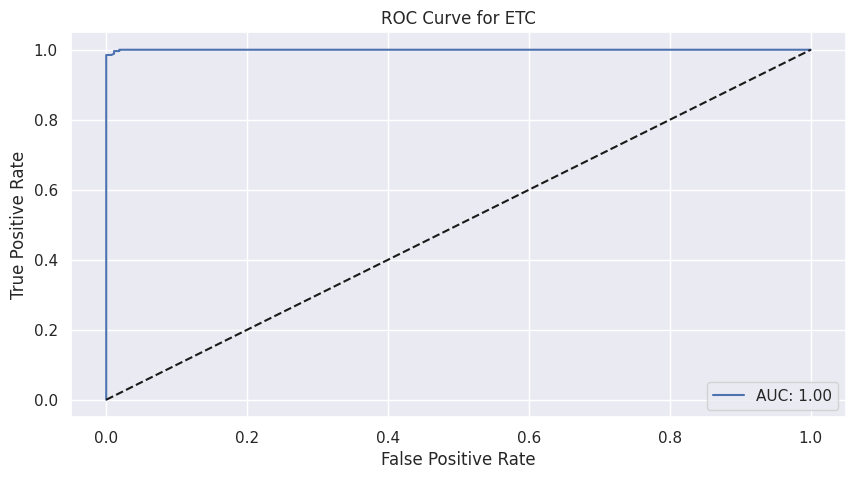

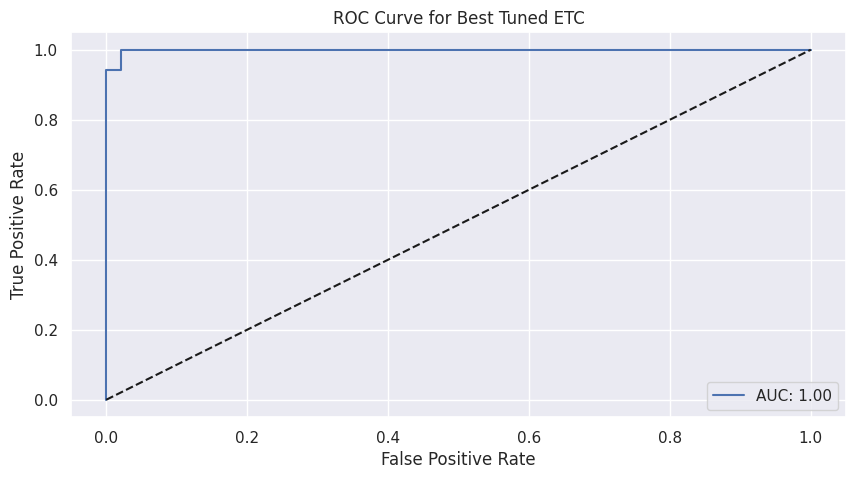

In [304]:
# Plot ROC-AUC curve for the best-tuned LDA classifier
plot_roc_curve(etc, X_test, y_test, 'ROC Curve for ETC')
# Plot ROC-AUC curve for the best-tuned LDA classifier
plot_roc_curve(etc_best, X_test[:100], y_test[:100], 'ROC Curve for Best Tuned ETC')


# *Hybrid Model*

In [305]:
from sklearn.ensemble import VotingClassifier

# Initialize the classifiers
mlp = MLPClassifier()
lda = LinearDiscriminantAnalysis()

# Create the ensemble model
hybrid = VotingClassifier(estimators=[('mlp', mlp), ('lda', lda)], voting='soft')
start_time_hybrid = time.time()
hybrid.fit(X_train, y_train)
y_pred_hybrid = hybrid.predict(X_test)
end_time_hybrid = time.time()

# Calculate evaluation metrics
acc_hybrid = accuracy_score(y_test, y_pred_hybrid) * 100
pre_hybrid = precision_score(y_test, y_pred_hybrid) * 100
recall_hybrid = recall_score(y_test, y_pred_hybrid) * 100
f1_hybrid = f1_score(y_test, y_pred_hybrid) * 100
roc_auc_hybrid = roc_auc_score(y_test, hybrid.predict_proba(X_test)[:, 1]) * 100
report_hybrid = classification_report(y_test, y_pred_hybrid)

# Calculate time taken for training and prediction
execution_time_hybrid = end_time_hybrid - start_time_hybrid

# Store results in a dictionary
results_hybrid = {
    'Accuracy': acc_hybrid,
    'Precision': pre_hybrid,
    'Recall': recall_hybrid,
    'F1_score': f1_hybrid,
    'ROC_AUC': roc_auc_hybrid,
    'Time Taken (seconds)': execution_time_hybrid
}

# Display results in a table
print("Hybrid Model Results:")
print(tabulate(results_hybrid.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification report:\n', report_hybrid)

# Define base models
mlp = MLPClassifier()
lda = LinearDiscriminantAnalysis()
hybrid = VotingClassifier(estimators=[('mlp', mlp), ('lda', lda)], voting='soft')

# Define hyperparameters for the grid search
param_grid_hybrid = {
    'mlp__hidden_layer_sizes': [(50,), (100,)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.0001, 0.001],
    'lda__solver': ['svd', 'lsqr'],
    'lda__shrinkage': [None, 'auto']
}

# Grid search with the hybrid model
grid_search_hybrid = GridSearchCV(estimator=hybrid, param_grid=param_grid_hybrid, cv=3, verbose=2, scoring='accuracy')
grid_search_hybrid.fit(X_train, y_train)

# Extract the best hyperparameters
best_params_hybrid = grid_search_hybrid.best_params_

# Now, you can retrain your hybrid model using these hyperparameters.
# Note: You don't need to reinitialize the VotingClassifier with the best parameters.
# Instead, use the best estimator from the grid search.

hybrid_best = grid_search_hybrid.best_estimator_

# Perform prediction and evaluation using the best model
y_pred_hybrid_best = hybrid_best.predict(X_test)
acc_hybrid_best = accuracy_score(y_test, y_pred_hybrid_best) * 100
pre_hybrid_best = precision_score(y_test, y_pred_hybrid_best) * 100
recall_hybrid_best = recall_score(y_test, y_pred_hybrid_best) * 100
f1_hybrid_best = f1_score(y_test, y_pred_hybrid_best) * 100
roc_auc_hybrid_best = roc_auc_score(y_test, hybrid_best.predict_proba(X_test)[:, 1]) * 100
report_hybrid_best = classification_report(y_test, y_pred_hybrid_best)

# Store results in a dictionary for the tuned model
results_hybrid_best = {
    'Accuracy': acc_hybrid_best,
    'Precision': pre_hybrid_best,
    'Recall': recall_hybrid_best,
    'F1_score': f1_hybrid_best,
    'ROC_AUC': roc_auc_hybrid_best
}

# Display results for the tuned model
print("\nHybrid Model Results (After Hyperparameter Tuning):")
print(tabulate(results_hybrid_best.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification report for the tuned model:\n', report_hybrid_best)

Hybrid Model Results:
+----------------------+----------+
| Metrics              |    Value |
+======================+==========+
| Accuracy             | 98.513   |
+----------------------+----------+
| Precision            | 99.2424  |
+----------------------+----------+
| Recall               | 97.7612  |
+----------------------+----------+
| F1_score             | 98.4962  |
+----------------------+----------+
| ROC_AUC              | 99.8881  |
+----------------------+----------+
| Time Taken (seconds) |  1.85057 |
+----------------------+----------+

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       270
           1       0.99      0.98      0.98       268

    accuracy                           0.99       538
   macro avg       0.99      0.99      0.99       538
weighted avg       0.99      0.99      0.99       538

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] END lda__shrinkage=

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   2.8s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   2.5s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   2.2s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   1.4s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   2.2s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   2.0s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   2.9s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.6s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.8s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   1.1s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   1.6s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   1.2s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   1.1s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.9s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   2.4s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.2s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.2s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.2s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.9s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.6s
[CV] END lda__shrinkage=None, lda__solver=svd, mlp__activation=relu

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   1.6s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   2.0s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   2.7s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   2.4s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   2.4s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   1.6s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   2.3s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   3.0s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   1.4s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   1.9s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   1.5s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   1.5s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   1.0s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.4s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   0.9s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.1s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.1s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.2s
[CV] END lda__shrinkage=None, lda__solver=lsqr, mlp__activation=

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   3.5s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   0.9s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   1.9s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   1.7s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   1.5s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   1.4s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activatio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   1.6s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   2.2s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   1.4s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   1.2s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   3.0s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   2.0s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   1.7s
[CV] END lda__shrinkage=auto, lda__solver=svd, mlp__activation=relu

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   1.5s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.9s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam; total time=   2.0s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   3.0s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   2.2s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   1.8s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   1.5s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   2.3s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   2.1s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   1.3s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activa

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd; total time=   2.3s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   1.2s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   2.7s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam; total time=   2.3s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.2s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd; total time=   0.2s
[CV] END lda__shrinkage=auto, lda__solver=lsqr, mlp__activati

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


48 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py", line 346, in fit
    return super().fit(X, transformed_y, sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py", line 81, in fit
    self.estimators_ = Parallel(n_jobs=self.n_jobs)(
  File "/usr/loc


Hybrid Model Results (After Hyperparameter Tuning):
+-----------+---------+
| Metrics   |   Value |
+===========+=========+
| Accuracy  | 98.8848 |
+-----------+---------+
| Precision | 99.2481 |
+-----------+---------+
| Recall    | 98.5075 |
+-----------+---------+
| F1_score  | 98.8764 |
+-----------+---------+
| ROC_AUC   | 99.953  |
+-----------+---------+

Classification report for the tuned model:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       270
           1       0.99      0.99      0.99       268

    accuracy                           0.99       538
   macro avg       0.99      0.99      0.99       538
weighted avg       0.99      0.99      0.99       538



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Here is the Confusion Matrix for Hybrid: 

[[268   2]
 [  6 262]]
_________________________________________________________


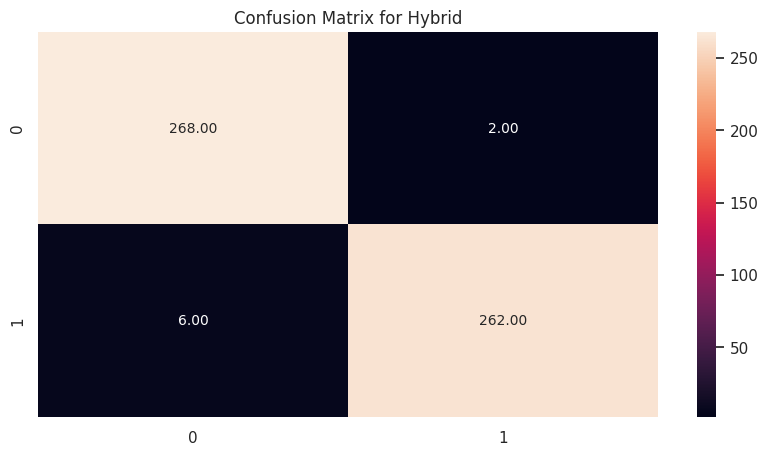

_________________________________________________________
Here is the Confusion Matrix for Best Hybrid: 

[[268   2]
 [  4 264]]
_________________________________________________________


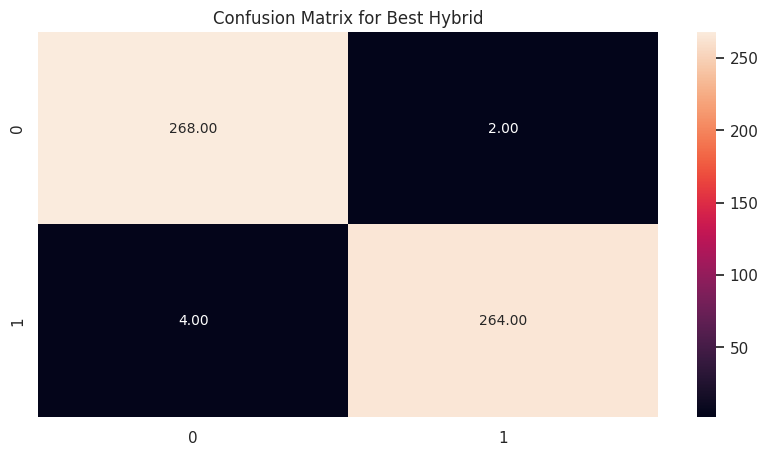

_________________________________________________________


In [306]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    """
    Print and plot confusion matrix.

    Parameters:
    - y_true: true labels
    - y_pred: predicted labels
    - title: title for the plot
    """
    matrix = confusion_matrix(y_true, y_pred)
    print(f'Here is the {title}: \n\n{matrix}')
    print('_________________________________________________________')

    plt.figure(figsize=(10,5))
    sns.heatmap(matrix, annot=True, fmt='0.2f', annot_kws={'size':10})
    plt.title(title)
    plt.show()
    print('_________________________________________________________')

# For the regular LDA model
plot_confusion_matrix(y_test, y_pred_hybrid, 'Confusion Matrix for Hybrid')

# For the best LDA model from grid search
plot_confusion_matrix(y_test, y_pred_hybrid_best, 'Confusion Matrix for Best Hybrid')

# *LSTM*

In [307]:
# building LSTM model with accuracy and classification report with model summary
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
# # reshape the data
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# initialize the model
model = Sequential()
# add the first LSTM layer
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# add the dropout layer
model.add(Dropout(0.2))
# add the second LSTM layer
model.add(LSTM(units = 50, return_sequences = True))
# add the dropout layer
model.add(Dropout(0.2))
# add the third LSTM layer
model.add(LSTM(units = 50, return_sequences = True))
# add the dropout layer
model.add(Dropout(0.2))
# add the fourth LSTM layer
model.add(LSTM(units = 50))
# add the dropout layer
model.add(Dropout(0.2))
# add the output layer
model.add(Dense(units = 1))
# compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])
# summarize the model
model.summary()
# fit the model
model.fit(X_train, y_train, epochs = 10, batch_size = 32)

from sklearn.metrics import recall_score, roc_auc_score, accuracy_score, f1_score, precision_score
from tabulate import tabulate

# Predictions from the LSTM model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Evaluation metrics
lstm_acc = accuracy_score(y_test, y_pred) * 100
f1_lstm = f1_score(y_test, y_pred, average='weighted') * 100
pr_lstm = precision_score(y_test, y_pred, average='weighted') * 100
recall_lstm = recall_score(y_test, y_pred, average='weighted') * 100
y_pred_prob = model.predict(X_test)
roc_auc_lstm = roc_auc_score(y_test, y_pred_prob) * 100

# Store results in a dictionary
results_lstm = {
    'Accuracy': lstm_acc,
    'F1 Score': f1_lstm,
    'Precision': pr_lstm,
    'Recall': recall_lstm,
    'ROC AUC Score': roc_auc_lstm
}

# Display results in a table
print("LSTM Evaluation Results:")
print(tabulate(results_lstm.items(), headers=["Metrics", "Value (%)"], tablefmt="grid"))

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_148 (LSTM)             (None, 10, 50)            10400     
                                                                 
 dropout_148 (Dropout)       (None, 10, 50)            0         
                                                                 
 lstm_149 (LSTM)             (None, 10, 50)            20200     
                                                                 
 dropout_149 (Dropout)       (None, 10, 50)            0         
                                                                 
 lstm_150 (LSTM)             (None, 10, 50)            20200     
                                                                 
 dropout_150 (Dropout)       (None, 10, 50)            0         
                                                                 
 lstm_151 (LSTM)             (None, 50)              

In [308]:
# import plotly.graph_objs as go
# from plotly.subplots import make_subplots

# # Define classifiers
# classifiers = ["LDA", "MLP", "ExtraTrees", "Hybrid", "LSTM"]

# # Define evaluation metric values before tuning
# accuracy_values_before = [acc_lda, acc_mlp, acc_etc, acc_hybrid, lstm_acc]
# precision_values_before = [pre_lda, pre_mlp, pre_etc, pre_hybrid, pr_lstm]
# recall_values_before = [recall_lda, recall_mlp, recall_etc, recall_hybrid, recall_lstm]
# f1_values_before = [f1_lda, f1_mlp, f1_etc, f1_hybrid, f1_lstm]
# roc_auc_values_before = [roc_auc_lda, roc_auc_mlp, roc_auc_etc, roc_auc_hybrid, roc_auc_lstm]

# # Define evaluation metric values after tuning
# accuracy_values_after = [acc_lda_best, acc_mlp_best, acc_etc_best, acc_hybrid_best, lstm_acc]
# precision_values_after = [pre_lda_best, pre_mlp_best, pre_etc_best, pre_hybrid_best, pr_lstm]
# recall_values_after = [recall_lda_best, recall_mlp_best, recall_etc_best, recall_hybrid_best, recall_lstm]
# f1_values_after = [f1_lda_best, f1_mlp_best, f1_etc_best, f1_hybrid_best, f1_lstm]
# roc_auc_values_after = [roc_auc_lda_best, roc_auc_mlp_best, roc_auc_etc_best, roc_auc_hybrid_best, roc_auc_lstm]

# # Create subplots for evaluation metrics before tuning
# fig_before = make_subplots(rows=2, cols=2, subplot_titles=("Accuracy", "Precision", "Recall", "F1 Score"))

# # Add traces for each evaluation metric before tuning
# fig_before.add_trace(go.Bar(x=classifiers, y=accuracy_values_before, name='Accuracy', marker_color='blue'), row=1, col=1)
# fig_before.add_trace(go.Bar(x=classifiers, y=precision_values_before, name='Precision', marker_color='green'), row=1, col=2)
# fig_before.add_trace(go.Bar(x=classifiers, y=recall_values_before, name='Recall', marker_color='orange'), row=2, col=1)
# fig_before.add_trace(go.Bar(x=classifiers, y=f1_values_before, name='F1 Score', marker_color='red'), row=2, col=2)

# # Update layout for evaluation metrics before tuning
# fig_before.update_layout(title_text='Classifier Evaluation Metrics Before Hyperparameter Tuning',
#                          xaxis_title="Classifier",
#                          yaxis_title="Metric Value (%)",
#                          showlegend=True)

# # Create subplots for evaluation metrics after tuning
# fig_after = make_subplots(rows=2, cols=2, subplot_titles=("Accuracy", "Precision", "Recall", "F1 Score"))

# # Add traces for each evaluation metric after tuning
# fig_after.add_trace(go.Bar(x=classifiers, y=accuracy_values_after, name='Accuracy', marker_color='blue'), row=1, col=1)
# fig_after.add_trace(go.Bar(x=classifiers, y=precision_values_after, name='Precision', marker_color='green'), row=1, col=2)
# fig_after.add_trace(go.Bar(x=classifiers, y=recall_values_after, name='Recall', marker_color='orange'), row=2, col=1)
# fig_after.add_trace(go.Bar(x=classifiers, y=f1_values_after, name='F1 Score', marker_color='red'), row=2, col=2)

# # Update layout for evaluation metrics after tuning
# fig_after.update_layout(title_text='Classifier Evaluation Metrics After Hyperparameter Tuning',
#                         xaxis_title="Classifier",
#                         yaxis_title="Metric Value (%)",
#                         showlegend=True)

# # Show both plots side by side
# fig_before.show()
# fig_after.show()

#  $$                   ********************THEEND*****************$$